#### 1. Data Used
- TimeFrame: L12 aggreagte 
- Chanel : Food

#### 2. Data Cleaning & Engerring
- drop columns with only one values/NA or with missing value> 40%
- Convert all numerical columns into buckets using percentiles 
- Size bucket is arbitrary 

#### 3. Model Comparison
- 
#### 4. Feature Selection
- ANOVA 
- Graph Check
#### 5. Model Testing 
- Cross Validation
#### 6. Proposal 

# 1) Import Data

The data imported needs to be 
1. Have all the measurement attributes needed (ACV, unit, dollar etc.)

In [1262]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
darkblue = '#1F497D'
lightblue = '#2E75B6'
grey= '#A5A5A5'

In [3]:
filepath= "231209 - Account L12 08-10-23.csv"
og_data = pd.read_csv(filepath)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\3444342530.py:2: DtypeWarning: Columns (293,314,326,333,344,350) have mixed types. Specify dtype option on import or set low_memory=False.
  og_data = pd.read_csv(filepath)


In [4]:
#import csv
test_filepath= "20231011__Intern_project_ Data.csv"
test_og_data = pd.read_csv(test_filepath)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1444585865.py:3: DtypeWarning: Columns (268,289,301,308,319,325) have mixed types. Specify dtype option on import or set low_memory=False.
  test_og_data = pd.read_csv(test_filepath)


In [5]:
og_data.shape 

(116616, 377)

In [6]:
og_data['Time Period End Date'].unique()[0]

'10-08-2023'

In [7]:
test_og_data['Time Period End Date'].unique()

array(['09-10-2023'], dtype=object)

In [8]:
test_og_data.shape

(108330, 367)

# Exploratory 

In [613]:
def graph_vel(df,groupby,sws,size=(10,4)):
#     df is dataframe,
#     groupby is what to group by 
#     velocity is ACV SWS or SWS
    date = df['Time Period End Date'].unique()[0]
    d = df.groupby(groupby)['Dollars'].sum().reset_index(name='Sum Dollars')
    s = df.groupby(groupby)[sws].sum().reset_index(name=sws)
    vel = pd.DataFrame({groupby: d[groupby],
                        'Dollar Velocity': d['Sum Dollars']/s[sws].values})
    vel = vel.sort_values(by="Dollar Velocity", ascending=False)
    
    
    plt.figure(figsize=size)
    plt.barh(vel[groupby],vel['Dollar Velocity'],color=darkblue)
    plt.xlabel('Dollars Velocity')
    plt.ylabel(groupby)
    title = "Dollar Velocity by "+groupby+" L12 Ended "+date
    plt.title(title,fontweight=600,fontsize = 12)
    plt.tight_layout()
    plt.show()
    
def graph_vel_top(df,groupby,sws,top=20,size=(10,4)):
#     df is dataframe,
#     groupby is what to group by 
#     velocity is ACV SWS or SWS
    date = df['Time Period End Date'].unique()[0]
    d = df.groupby(groupby)['Dollars'].sum().reset_index(name='Sum Dollars')
    s = df.groupby(groupby)[sws].sum().reset_index(name=sws)
    vel = pd.DataFrame({groupby: d[groupby],
                        'Dollar Velocity': d['Sum Dollars']/s[sws].values})
    vel = vel.sort_values(by="Dollar Velocity", ascending=False)
    
    
    plt.figure(figsize=size)
    plt.barh(vel[groupby][:top],vel['Dollar Velocity'][:top],color=darkblue)
    plt.xlabel('Dollars Velocity')
    plt.ylabel(groupby)
    title = "Top "+str(top)+" "+groupby+" by Dollar Velocity L12 Ended "+date
    plt.title(title,fontweight=600,fontsize = 12)
    plt.tight_layout()
    plt.show()

def graph_vel_scatter(df,groupby,sws,size=(10,4)):
#     df is dataframe,
#     groupby is what to group by 
#     velocity is ACV SWS or SWS
    date = df['Time Period End Date'].unique()[0]
    d = df.groupby(groupby)['Dollars'].sum().reset_index(name='Sum Dollars')
    s = df.groupby(groupby)[sws].sum().reset_index(name=sws)
    vel = pd.DataFrame({groupby: d[groupby],
                        'Dollar Velocity': d['Sum Dollars']/s[sws].values})
    vel = vel.sort_values(by="Dollar Velocity", ascending=False)
    

    plt.figure(figsize=size)
    
    plt.scatter(range(0,len(vel[groupby])),vel['Dollar Velocity'], color = darkblue)
    plt.xlabel(groupby)
    plt.ylabel('Dollars Velocity')
    title = "Dollar Velocity by "+groupby+" L12 Ended "+date
    plt.title(title,fontweight=600,fontsize = 12)
    plt.tight_layout()
    plt.show()
    
def graph_dollar(df,groupby,size=(10,4)):
#     df is dataframe,
#     groupby is what to group by 
#     velocity is ACV SWS or SWS
    date = df['Time Period End Date'].unique()[0]
    d = df.groupby(groupby)['Dollars'].sum().reset_index(name='Sum Dollars')
    d = d.sort_values(by="Sum Dollars", ascending=False)
    
    plt.figure(figsize=size)
    plt.barh(d[groupby],d['Sum Dollars'],color=grey)
    plt.xlabel('Dollars')
    plt.ylabel(groupby)
    title = "Dollar Sales by "+groupby+" L12 Ended "+date
    plt.title(title,fontweight=600,fontsize = 12)
    plt.tight_layout()
    plt.show()

def graph_dollar_top(df,groupby,top=20, size=(10,4)):
#     df is dataframe,
#     groupby is what to group by 
#     velocity is ACV SWS or SWS
    date = df['Time Period End Date'].unique()[0]
    d = df.groupby(groupby)['Dollars'].sum().reset_index(name='Sum Dollars')
    d = d.sort_values(by="Sum Dollars", ascending=False)
    
    plt.figure(figsize=size)
    plt.barh(d[groupby][:top],d['Sum Dollars'][:top],color=grey)
    plt.xlabel('Dollars')
    plt.ylabel(groupby)
    title = "Top "+str(top)+" "+groupby+" by Dollar Sales L12 Ended "+date
    plt.title(title,fontweight=600,fontsize = 12)
    plt.tight_layout()
    plt.show()
    

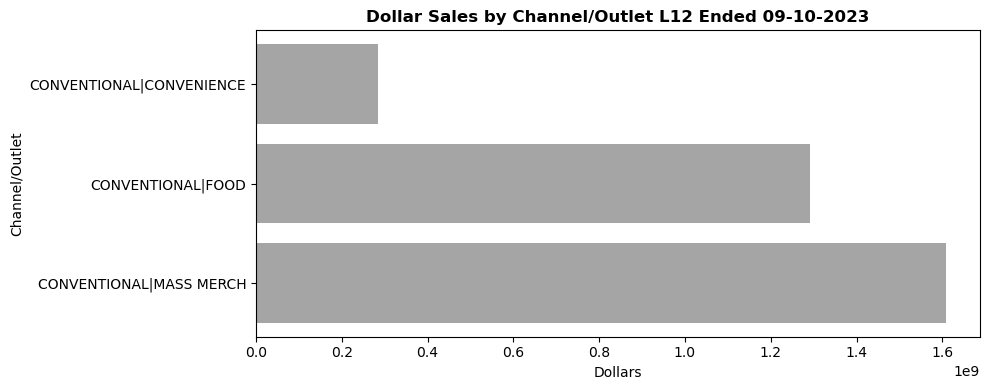

In [13]:
graph_dollar(test_og_data,'Channel/Outlet')

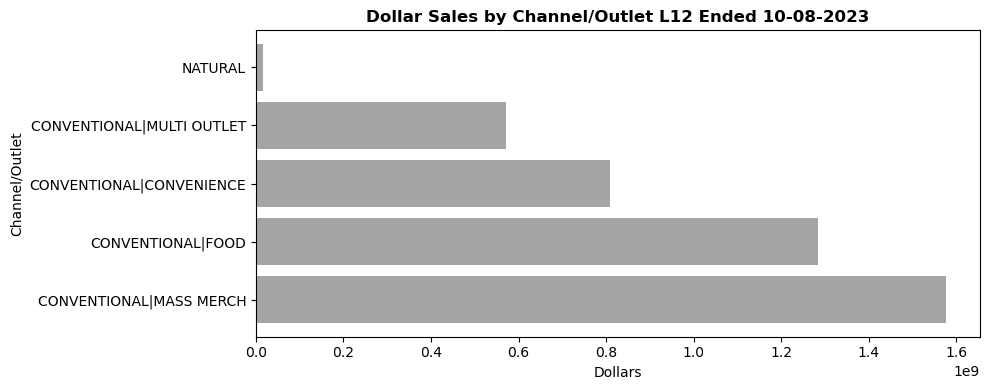

In [14]:
graph_dollar(og_data,'Channel/Outlet')

In [15]:
US_food =  og_data[(og_data["Channel/Outlet"]=="CONVENTIONAL|FOOD")&
                  (og_data["Geography Level"]=="RMA")]

US_food_test =  test_og_data[(test_og_data["Channel/Outlet"]=="CONVENTIONAL|FOOD")&
                  (test_og_data["Geography Level"]=="RMA")]

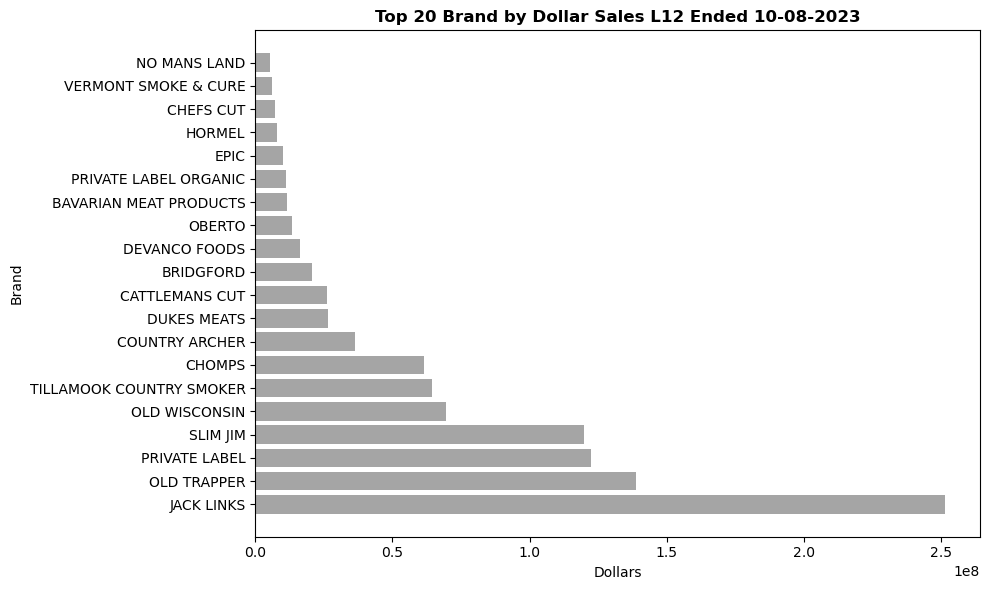

In [16]:
graph_dollar_top(US_food,"Brand",size=((10, 6)))

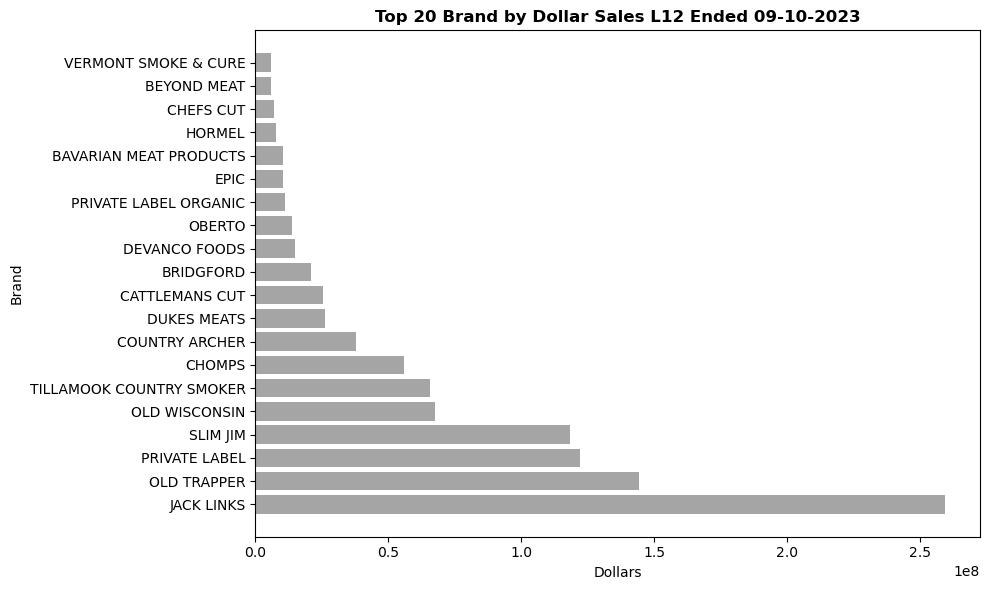

In [17]:
graph_dollar_top(US_food_test,"Brand",size=((10, 6)))

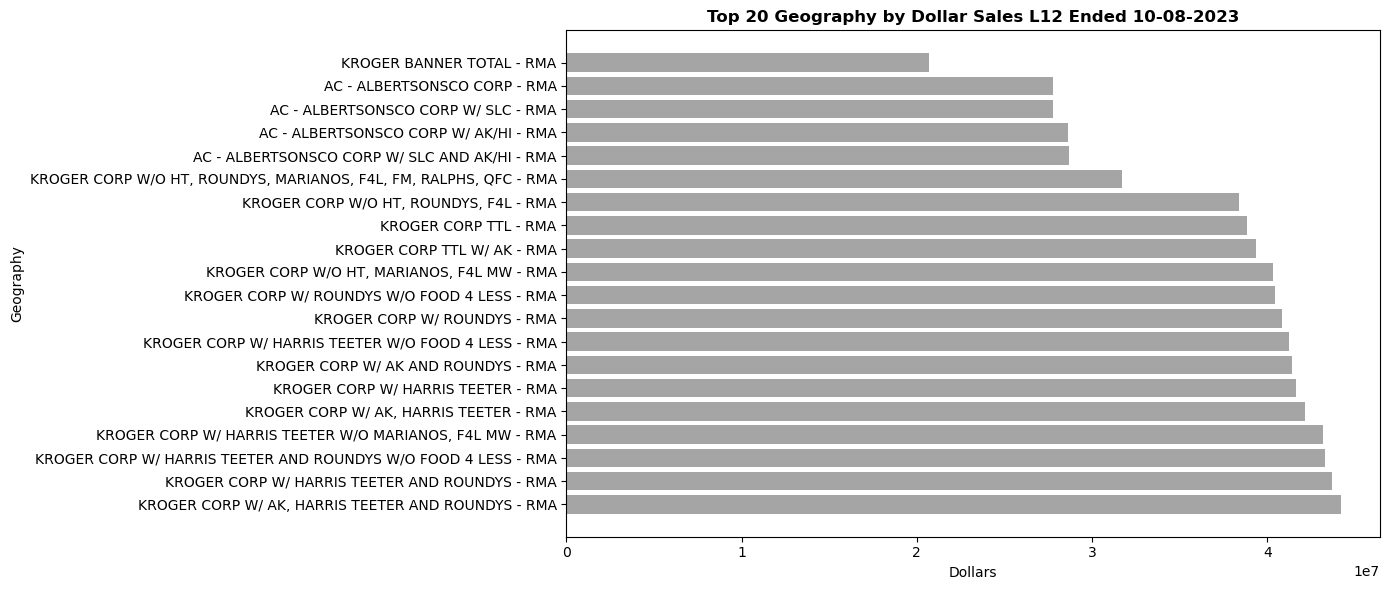

In [18]:
graph_dollar_top(US_food,"Geography",size=((14, 6)))

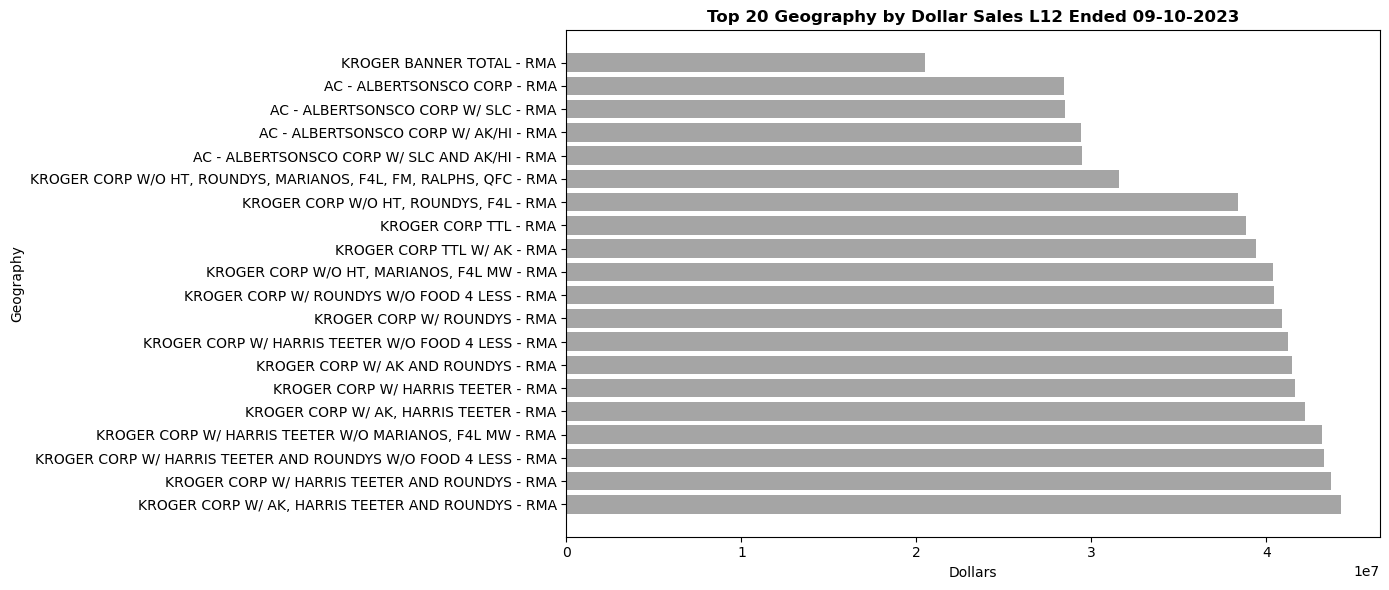

In [19]:
graph_dollar_top(US_food_test,"Geography",size=((14, 6)))

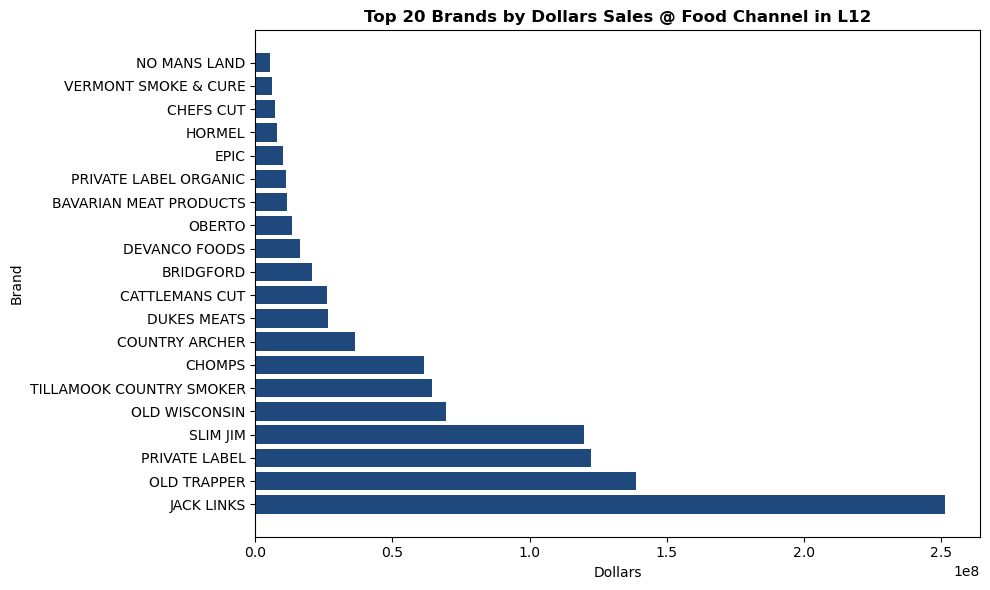

In [20]:
#
brand_rank = US_food.groupby("Brand")['Dollars'].sum().reset_index(name='Sum Dollars')
brand_rank = brand_rank.sort_values(by="Sum Dollars", ascending=False)

brand_rank[:20]


top20 = brand_rank['Sum Dollars'][:20]
plt.figure(figsize=(10, 6))
plt.barh(brand_rank["Brand"][:20], brand_rank['Sum Dollars'][:20], color=darkblue)

plt.xlabel('Dollars')
plt.ylabel('Brand')
plt.title('Top 20 Brands by Dollars Sales @ Food Channel in L12',fontweight=600, fontsize = 12)
plt.tight_layout()
plt.show()

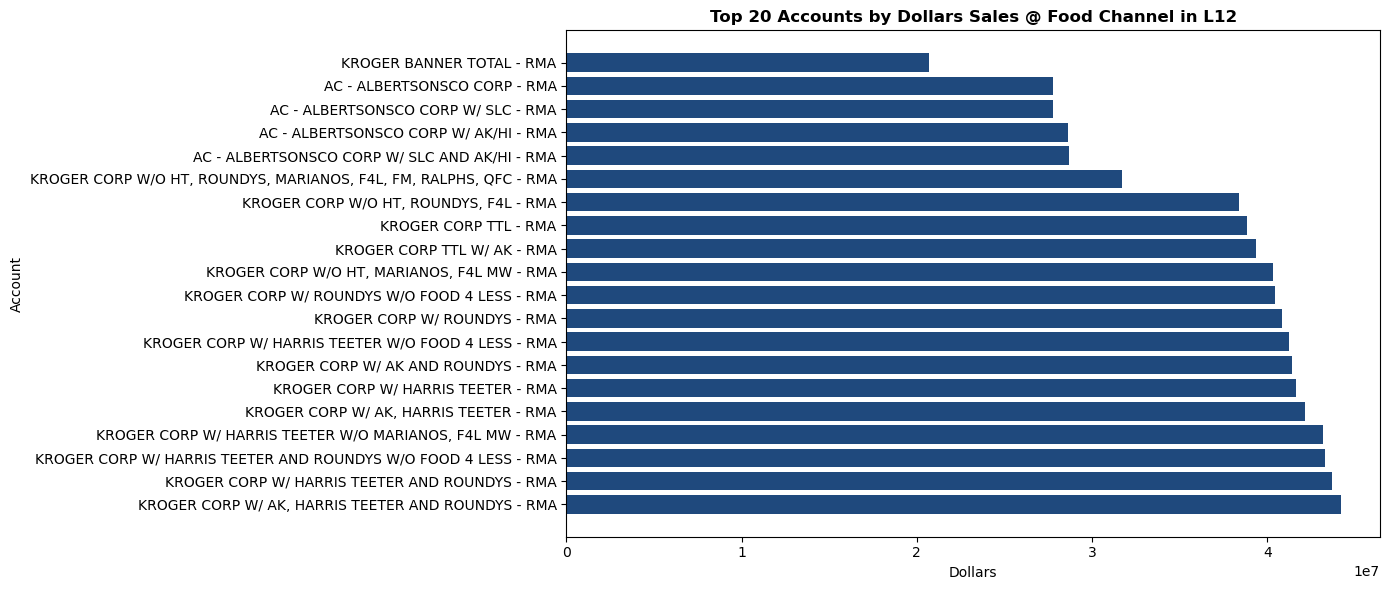

In [21]:
geo_rank = US_food.groupby("Geography")['Dollars'].sum().reset_index(name='Sum Dollars')
geo_rank = geo_rank.sort_values(by="Sum Dollars", ascending=False)

geo_rank[:20]


top20 = geo_rank['Sum Dollars'][:20]
plt.figure(figsize=(14, 6))
plt.barh(geo_rank["Geography"][:20], geo_rank['Sum Dollars'][:20], color=darkblue)

plt.xlabel('Dollars')
plt.ylabel('Account')
plt.title('Top 20 Accounts by Dollars Sales @ Food Channel in L12',fontweight=600,fontsize = 12)
plt.tight_layout()
plt.show()

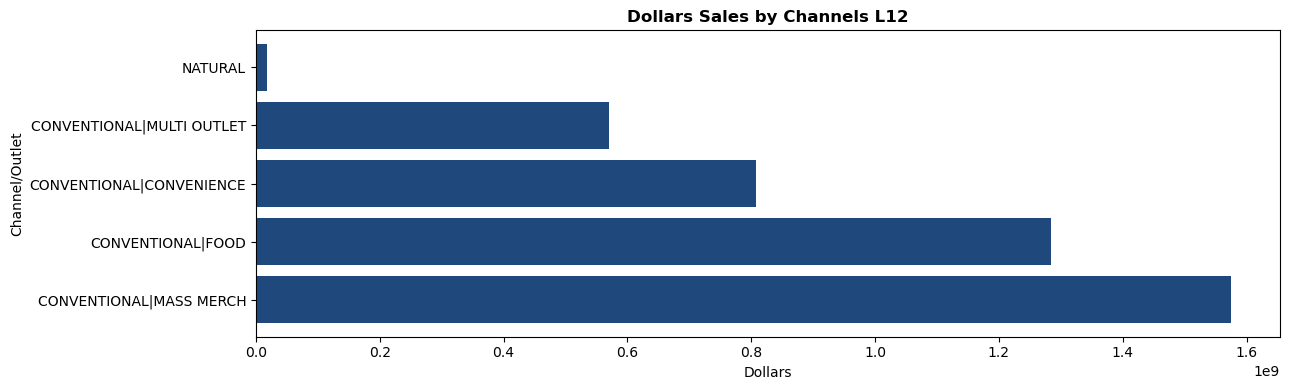

In [22]:

channel_rank = og_data.groupby("Channel/Outlet")['Dollars'].sum().reset_index(name='Sum Dollars')
channel_rank = channel_rank.sort_values(by="Sum Dollars", ascending=False)




plt.figure(figsize=(13, 4))
plt.barh(channel_rank["Channel/Outlet"], channel_rank['Sum Dollars'][:20], color=darkblue)

plt.xlabel('Dollars')
plt.ylabel('Channel/Outlet')
plt.title('Dollars Sales by Channels L12',fontweight=600,fontsize = 12)
plt.tight_layout()
plt.show()

In [23]:
check=['LABELED GLUTEN FREE','LABELED GRASS FED','LABELED NON-GMO','NFP - PROTEIN','LABELED ALLERGEN FRIENDLY']
for i in check:
    print(og_data[og_data['Description']=='Chomps Jalapeno Beef Sticks 9.2 Oz'][i].unique())

['LABELED GLUTEN FREE']
['LABELED GRASS FED']
['LABELED NON-GMO PRODUCT CLAIM']
['10 g']
['NOT LABELED ALLERGEN FRIENDLY']


In [24]:
check=['LABELED GLUTEN FREE','LABELED GRASS FED','LABELED NON-GMO','NFP - PROTEIN','LABELED ALLERGEN FRIENDLY']
for i in check:
    print(test_og_data[test_og_data['Description']=='Chomps Jalapeno Beef Sticks 9.2 Oz'][i].unique())

['LABELED GLUTEN FREE']
['LABELED GRASS FED']
['LABELED NON-GMO PRODUCT CLAIM']
['10 g']
['NOT LABELED ALLERGEN FRIENDLY']


In [25]:
check=['LABELED GLUTEN FREE','LABELED GRASS FED','LABELED NON-GMO','NFP - PROTEIN','LABELED ALLERGEN FRIENDLY']
for i in check:
    print(og_data[og_data['Description']=='Jack Links Doritos Spcy Swt Chil Jrky 2.65 Oz'][i].unique())

['UNKNOWN']
['NOT LABELED GRASS FED']
['NOT LABELED NON-GMO']
[nan]
['NOT LABELED ALLERGEN FRIENDLY']


In [26]:
#Make a copy of the original data
data= og_data.copy()

In [27]:
test_data= test_og_data.copy()

In [28]:
data.head()

Channel/Outlet Geography Level                       Geography  \
0  CONVENTIONAL|CONVENIENCE             RMA  GPM INVEST NORTHEAST DIV - RMA   
1         CONVENTIONAL|FOOD             RMA    KROGER QFC SEATTLE, WA - RMA   
2  CONVENTIONAL|CONVENIENCE             RMA              BP SOUTHWEST - RMA   
3  CONVENTIONAL|CONVENIENCE             RMA          CASEYS NORTHEAST - RMA   
4         CONVENTIONAL|FOOD             RMA       KROGER BANNER TOTAL - RMA   

  Time Period Time Period End Date Product Universe Product Level Subcategory  \
0    12 Weeks           10-08-2023              TPL           UPC    SS JERKY   
1    12 Weeks           10-08-2023              TPL           UPC    SS JERKY   
2    12 Weeks           10-08-2023              TPL           UPC    SS JERKY   
3    12 Weeks           10-08-2023              TPL           UPC    SS JERKY   
4    12 Weeks           10-08-2023              TPL           UPC    SS JERKY   

          Brand             UPC  ...  SIZE       STORAGE UNIT OF MEASURE  \
0    JACK LINKS  00-17082-87745  ...   1.5  SHELF STABLE           OUNCE   
1        OBERTO  00-70411-60372  ...   2.5  SHELF STABLE           OUNCE   
2  CACTUS JACKS  06-72156-53480  ...  10.0  SHELF STABLE           OUNCE   
3  NO MANS LAND  08-38154-00005  ...   1.0  SHELF STABLE           COUNT   
4      DEARBORN  07-08165-08108  ...   3.0  SHELF STABLE           OUNCE   

      UPC EAN13   Dollars   Units Max % ACV Number of Weeks Selling  \
0  1.708288e+10     93.61    18.3       1.3                       7   
1  7.041160e+10     93.86    14.0       7.7                      10   
2  6.721570e+11     42.05     2.0       0.1                       2   
3  8.381540e+11  22852.79  1049.7      41.4                      12   
4  7.081650e+11    291.25    83.0       0.8                      11   

  # of Stores # of Stores Selling  
0         359                   6  
1          54                   5  
2         589                   1  
3         536                 202  
4        1278                   8  

[5 rows x 377 columns]

# 2) Stage 1: Data Cleaning 

1) Categorize Columns
2) Handling missing values
3) Filter control
4) Adding 'goodness' metrics

## 1. Categorize Colomns 

Categorizing columns into 
1. Measurement Attributes: used define our goodness metrics 
2. Filters: ones that we can used to filters on certain data (eg. ccount, category etc)
3. Product Attributes: what define a product (flavor, size, ingredient) 

In [29]:
# Attrbutes used as metrics to dertermine the goodness of the product 
Attr = ['Dollars', 'Units', 'EQ Units',
       'Dollars, Non-Promo', 'Dollars, Promo', 'Units, Promo',
       'Units, Non-Promo', 'Max % ACV', 'Max % ACV, Any Promo',
       'Number of Weeks Selling', '# of Stores', '# of Stores Selling',
       'Base Dollars', 'Base Units', 'Incr Dollars', 'Incr Units',
       'Base Dollars, Promo', 'Base Units, Promo', 'Market ACV',  'UPC EAN13']

In [42]:
# Used as filters 
filters1= ['Channel/Outlet', 'Geography Level', 'Retail Account Level',
       'Geography', 'Time Period', 'Time Period End Date',
       'Product Universe', 'Product Level', 'Department', 'Category', 'UPC']

filters= ['Channel/Outlet', 'Geography Level',
       'Geography', 'Time Period', 'Time Period End Date',
       'Product Universe', 'Product Level', 'UPC']

In [31]:
# function that output list of columns names that belong to product attributes
def prodcut_Att(col,product_char=[]):
    """
    Output list of columns names that are product attributes 9not filter/measurement attributes)

    Parameters:
    - col (Pandas Index data type): All the columns names in the dataframe
    - product_char: Default is empty list

    Returns:
    - list: list of columns names that are product attributes

    Example:
    >>> prodcut_Att(['Channel/Outlet', 'Geography Level','FLAVOUR'])
    ['FLAVOUR']
    """
    product_char = [item for item in col if (item not in Attr) and (item not in filters)]
    return product_char

In [32]:
#The rest of the cols that belong to product charateristics
col= data.columns
product_char= prodcut_Att(col)
len(product_char)

362

In [33]:
product_char

['Subcategory',
 'Brand',
 'Description',
 'ANIMAL TYPE',
 'BRAND POSITION',
 'CERTIFIED - AMERICAN HEART ASSOCIATION HEART - CHECK',
 'CERTIFIED B CORPORATION',
 'CERTIFIED DETOX PROJECT - GLYPHOSATE RESIDUE FREE',
 'CERTIFIED FAIR TRADE USA',
 'CERTIFIED FAIRTRADE AMERICA',
 'CERTIFIED GREENER WORLD - ANIMAL WELFARE',
 'CERTIFIED GREENER WORLD - GRASSFED',
 'CERTIFIED GREENER WORLD - NON GMO',
 'CERTIFIED MARINE STEWARDSHIP COUNCIL',
 'CERTIFIED NON-GMO PROJECT VERIFIED',
 'CERTIFIED PALEO FOUNDATION - GRAIN FREE',
 'CERTIFIED PALEO FOUNDATION - KETO',
 'CERTIFIED PALEO FOUNDATION - PALEO',
 'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
 'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
 'CERTIFIED PLANT BASED FOODS ASSOCIATION',
 'CERTIFIED REGENERATIVE ORGANIC',
 'CERTIFIED UPCYCLED',
 'CERTIFIED WHOLE GRAINS COUNCIL',
 'COMPANY',
 'DIET - FODMAP DIET',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'DIET - PALEO DIET',
 'DIET - PESCATARIAN DIET',
 'DIET - PLANT BASED DIET',
 'DIET - VE

In [34]:
# #Categorize product characteristics

def categorize(lst):
    product_char_cat =dict()
    for i in range(0,len(lst)):
        item = lst[i]
        a = item.split(" ")
        key = a[0] 
        if key in product_char_cat:
            product_char_cat[key].append(item)
       
        else: 
            product_char_cat[key]= [item]
    return product_char_cat

In [35]:
categorize(product_char)

{'Subcategory': ['Subcategory'],
 'Brand': ['Brand'],
 'Description': ['Description'],
 'ANIMAL': ['ANIMAL TYPE'],
 'BRAND': ['BRAND POSITION'],
 'CERTIFIED': ['CERTIFIED - AMERICAN HEART ASSOCIATION HEART - CHECK',
  'CERTIFIED B CORPORATION',
  'CERTIFIED DETOX PROJECT - GLYPHOSATE RESIDUE FREE',
  'CERTIFIED FAIR TRADE USA',
  'CERTIFIED FAIRTRADE AMERICA',
  'CERTIFIED GREENER WORLD - ANIMAL WELFARE',
  'CERTIFIED GREENER WORLD - GRASSFED',
  'CERTIFIED GREENER WORLD - NON GMO',
  'CERTIFIED MARINE STEWARDSHIP COUNCIL',
  'CERTIFIED NON-GMO PROJECT VERIFIED',
  'CERTIFIED PALEO FOUNDATION - GRAIN FREE',
  'CERTIFIED PALEO FOUNDATION - KETO',
  'CERTIFIED PALEO FOUNDATION - PALEO',
  'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
  'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
  'CERTIFIED PLANT BASED FOODS ASSOCIATION',
  'CERTIFIED REGENERATIVE ORGANIC',
  'CERTIFIED UPCYCLED',
  'CERTIFIED WHOLE GRAINS COUNCIL'],
 'COMPANY': ['COMPANY'],
 'DIET': ['DIET - FODMAP DIET',
  'DIET - KE

## 2. Handling missing values

### The following follows the below steps:

#### Filters Columns
1. Drop rows with missing UPC 
2. Check other measurement attributes 
#### Product Attributes Columns 
3. Drop Columns with only NaN values 
4. Drop Columns with only one value 
5. Drop columns with missing/unknown value percentage > 40%
6. Fill in NaN with "UNKNOWN" in the remaining columns 
#### Private Label Rows
1. Drop rows with private labels
#### Measurement Attributes
1. Check missing values


### Filters Columns


1. Drop rows with missing UPC 

In [36]:
#Data with UPC missing 
missing = data["UPC"].isna()
missing_data = data[missing]
np.array(missing_data[product_char].isna().sum().unique())

array([0.])

In [37]:
#Description with 'SS JERKY', 'SS MEAT SNACKS OTHER', 'SS PLANT BASED MEAT SNACKS' are aggregate 
agg = list(missing_data["Description"].unique())
agg

[]

In [38]:
#Drop aggreagete rows (alternatively, do not pull aggreaget data)
agg_data = data[data['Description'].isin(agg)]
df =  data[~data['Description'].isin(agg)]

In [39]:
# NA values in he product char columns 
df["UPC"].isna().sum()

0

2. Check in the filters columns, what are missing

In [43]:
#No data is missing now 
sum(df[filters].isna().sum())

0

### Product Attributes Columns 


3. Drop product attributes columns with all NA or just one value
- df1 is df after dropping columns with all NA or just have one unique value in the column

In [44]:
# NA values in the product char columns 
print(data[product_char].isna().sum().unique())

[     0  40391  42024  40392  40367 116616 115796 102207  50018  40871
  47928  40966 116264 116482 115662  47313 114985 101546  45033 115788
 116205 116269 115447 116231 115992 106948 107199  41139 115449  43791
 115616  87234  40865  42493 116403 115574  41535  48389 110035  60447
 115576 110211  60677 110741 107921 116554]


In [45]:
#define a function that compute the missing value percentage for each columns 
def missing_per(df, product_ch):
    """
    compute the missing value percentage for each columns in the dataframe

    Parameters:
    - df (Pandas dataframe): A dataset
    - product_ch(list): A list of all product attribute columns 

    Returns:
    - dataframe: a dataframe with column names and its corresponding missing value percentage

    Example:
    >>> prodcut_Att(['Channel/Outlet', 'Geography Level','FLAVOUR'])
    ['FLAVOUR']
    """
    unknown = (df[product_ch]=="UNKNOWN").sum()
    na = df[product_ch].isna().sum()
    missing_percentage = (unknown+na)/len(df)*100
    missing_percentage_df = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
    missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)
    return missing_percentage_df



In [46]:
missing_percentage_df=missing_per(df,product_char)
missing_percentage_df

Column Name  Missing Percentage
289                    NFP - FOLATE               100.0
283                  NFP - CHROMIUM               100.0
292                    NFP - IODINE               100.0
291                NFP - FOLIC ACID               100.0
298                 NFP - MANGANESE               100.0
..                              ...                 ...
23   CERTIFIED WHOLE GRAINS COUNCIL                 0.0
24                          COMPANY                 0.0
34                  EATING OCCASION                 0.0
35                     EQ UNIT SIZE                 0.0
361                 UNIT OF MEASURE                 0.0

[362 rows x 2 columns]

In [47]:
# drop columns with all nulls 
df1=df.copy()
df1=df1.dropna(axis=1,how="all")
product_char_dropNa= prodcut_Att(df1.columns)

4. Drop Columns with only one value 

In [48]:
#define a function that test if the column only have one unique data or null 
def drop(df):
    for att in product_char_dropNa:
        c = df[att].value_counts()
        if len(c.index)==1:
            del df[att]
        else:
            continue
    return df

In [49]:
#The rest of the cols that belong to product charateristics
df1 = drop(df1)
col1= df1.columns
product_char1= prodcut_Att(col1)
#product_char1

In [50]:
print(f"Before cleaning, there are {len(product_char)} product attributes")
print(f"After cleaning, there are {len(product_char1)} product attributes")

Before cleaning, there are 362 product attributes
After cleaning, there are 242 product attributes


In [51]:
# check missing values as a percentage
missing_percentage_df1=missing_per(df1,product_char1)
missing_percentage_df1

Column Name  Missing Percentage
194          NFP - PANTOTHENIC ACID           99.885093
204                  NFP - SELENIUM           99.885093
184                    NFP - COPPER           99.885093
222               NFP - VITAMIN B12           99.817349
211      NFP - THIAMIN (VITAMIN B1)           99.817349
..                              ...                 ...
23   CERTIFIED WHOLE GRAINS COUNCIL            0.000000
24                          COMPANY            0.000000
34                  EATING OCCASION            0.000000
35                     EQ UNIT SIZE            0.000000
241                 UNIT OF MEASURE            0.000000

[242 rows x 2 columns]

In [52]:
list(missing_percentage_df1[missing_percentage_df1['Missing Percentage']>40]['Column Name'])

['NFP - PANTOTHENIC ACID',
 'NFP - SELENIUM',
 'NFP - COPPER',
 'NFP - VITAMIN B12',
 'NFP - THIAMIN (VITAMIN B1)',
 'NFP - VITAMIN B6',
 'NFP - NIACIN',
 'NFP - RIBOFLAVIN (VITAMIN B2)',
 'NFP - MONOUNSATURATED FAT',
 'NFP - POLYUNSATURATED FAT',
 'NFP - MAGNESIUM PCT DV',
 'NFP - PANTOTHENIC ACID PCT DV',
 'NFP - COPPER PCT DV',
 'NFP - SELENIUM PCT DV',
 'NFP - VITAMIN B12 PCT DV',
 'NFP - THIAMIN PCT DV',
 'NFP - VITAMIN B6 PCT DV',
 'NFP - RIBOFLAVIN PCT DV',
 'NFP - NIACIN PCT DV',
 'NFP - VITAMIN D',
 'NFP - VITAMIN C',
 'NFP - VITAMIN A',
 'NFP - VITAMIN D PCT DV',
 'NFP - POTASSIUM PCT DV',
 'NFP - POTASSIUM',
 'NFP - CALCIUM',
 'NFP - IRON',
 'NFP - SERVING SIZE METRIC',
 'NFP - VITAMIN C PCT DV',
 'NFP - VITAMIN A PCT DV',
 'NFP - CALCIUM PCT DV',
 'LABELED NON-GMO',
 'LABELED PASTURE RAISED',
 'NFP - TRANS FAT',
 'NFP - CALORIES FROM FAT',
 'LABELED GLUTEN FREE',
 'NFP - DIETARY FIBER',
 'NFP RANGES - FIBER VALUE',
 'NFP - DIETARY FIBER PCT DV',
 'LABELED ANTIBIOTIC FREE',


5. Drop columns with missing/unknown value percentage > 40%
- df2 is df1 adter dropping columns with missing values>40%

In [53]:
#Further cleaning, droppin columns with missing avlues >50%
threshold = 40
col_to_drop = missing_percentage_df1[missing_percentage_df1["Missing Percentage"]>threshold]["Column Name"]
df2=df1.drop(col_to_drop, axis=1)

In [54]:
cols2=df2.columns
product_char2 = prodcut_Att(cols2)
#product_char2
list(product_char2)

['Subcategory',
 'Brand',
 'Description',
 'ANIMAL TYPE',
 'BRAND POSITION',
 'CERTIFIED - AMERICAN HEART ASSOCIATION HEART - CHECK',
 'CERTIFIED B CORPORATION',
 'CERTIFIED DETOX PROJECT - GLYPHOSATE RESIDUE FREE',
 'CERTIFIED FAIR TRADE USA',
 'CERTIFIED FAIRTRADE AMERICA',
 'CERTIFIED GREENER WORLD - ANIMAL WELFARE',
 'CERTIFIED GREENER WORLD - GRASSFED',
 'CERTIFIED GREENER WORLD - NON GMO',
 'CERTIFIED MARINE STEWARDSHIP COUNCIL',
 'CERTIFIED NON-GMO PROJECT VERIFIED',
 'CERTIFIED PALEO FOUNDATION - GRAIN FREE',
 'CERTIFIED PALEO FOUNDATION - KETO',
 'CERTIFIED PALEO FOUNDATION - PALEO',
 'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
 'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
 'CERTIFIED PLANT BASED FOODS ASSOCIATION',
 'CERTIFIED REGENERATIVE ORGANIC',
 'CERTIFIED UPCYCLED',
 'CERTIFIED WHOLE GRAINS COUNCIL',
 'COMPANY',
 'DIET - FODMAP DIET',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'DIET - PALEO DIET',
 'DIET - PESCATARIAN DIET',
 'DIET - PLANT BASED DIET',
 'DIET - VE

In [55]:
print(f"Before cleaning, there are {len(product_char)} product attributes")
print(f"After first cleaning, there are {len(product_char1)} product attributes")
print(f"After second cleaning, there are {len(product_char2)} product attributes")

Before cleaning, there are 362 product attributes
After first cleaning, there are 242 product attributes
After second cleaning, there are 200 product attributes


In [56]:
df2.shape

(116616, 215)

In [57]:
# check missing values as a percentage
missing_percentage_df2 = missing_per(df2,product_char2)


6. Fill in NaN with "UNKNOWN" in the remaining columns 
- df3 is df2 filling NA with UNKNOWN

In [58]:
#make a copy and replacing NA values with 0
df3= df2.copy()
df3[product_char2]=df3[product_char2].fillna("UNKNOWN")

#checking missing values
sum(df3[product_char2].isna().sum())

0

In [59]:
#Double check on unknown data
(((df3[product_char2]=="UNKNOWN")[product_char2]).sum()/len(df3)*100).sort_values(ascending=False)

LABELED ANIMAL WELFARE            39.998799
LABELED NITRATE FREE              39.914763
LABELED GRASS FED                 39.818721
LABELED ALLERGEN FRIENDLY         38.918330
NFP - IRON PCT DV                 38.616485
                                    ...    
CERTIFIED WHOLE GRAINS COUNCIL     0.000000
COMPANY                            0.000000
EATING OCCASION                    0.000000
EQ UNIT SIZE                       0.000000
UNIT OF MEASURE                    0.000000
Length: 200, dtype: float64

In [60]:
# Define a custom function to count "unknown" in each row
def count_unknown(row):
    return row.tolist().count("UNKNOWN")
count = df3.apply(count_unknown, axis=1)
# Apply the custom function to each row
count.describe()

count    116616.000000
mean         57.321405
std          74.402436
min           0.000000
25%           0.000000
50%           9.000000
75%         154.000000
max         167.000000
dtype: float64

In [61]:
product_char3 = prodcut_Att(df3.columns)
len(product_char3)

200

### Drop "Private Label" Rows
- df4 is df3 after dropping private labels rows

In [62]:
#private_label="PRIVATE LABEL"
private_df = df3[df3['Brand'].str.startswith('PRIVATE LABEL')][product_char3]
#private_df = df3[df3["Brand"]==private_label][product_char2]
private_df.apply(count_unknown, axis=1)

52        154
79        154
105       154
113       154
138       154
         ... 
115059    154
115090    154
115123    154
115127    154
115139    154
Length: 4436, dtype: int64

In [63]:
private_df.index

Index([    52,     79,    105,    113,    138,    175,    238,    264,    276,
          314,
       ...
       115043, 115044, 115051, 115052, 115056, 115059, 115090, 115123, 115127,
       115139],
      dtype='int64', length=4436)

In [64]:
private_full = df3.loc[private_df.index]

In [65]:
private_brands = list(private_df['Brand'].unique())

In [66]:
private_brands

['PRIVATE LABEL', 'PRIVATE LABEL ORGANIC']

In [67]:
df4 = df3[~df3['Brand'].isin(private_brands)]

In [68]:
print(f'Before dropping private labels rows, there are {df3.shape[0]} rows, now there are {df4.shape[0]} rows')

Before dropping private labels rows, there are 116616 rows, now there are 112180 rows


In [69]:
product_char4 = product_char3.copy()

In [70]:
missing_percentage_df4=missing_per(df4,product_char4)

In [71]:
missing_percentage_df4[missing_percentage_df4['Missing Percentage']>=30]

Column Name  Missing Percentage
166          LABELED ANIMAL WELFARE           41.580496
169            LABELED NITRATE FREE           41.493136
168               LABELED GRASS FED           41.393296
165       LABELED ALLERGEN FRIENDLY           40.457301
192                           PALEO           39.726333
..                              ...                 ...
76            INGREDIENT - COLLAGEN           32.029774
77     INGREDIENT - COLOR BLUE NO 1           32.029774
78      INGREDIENT - COLOR RED NO 3           32.029774
79     INGREDIENT - COLOR RED NO 40           32.029774
80   INGREDIENT - COLOR YELLOW NO 5           32.029774

[163 rows x 2 columns]

In [72]:
count = df4.apply(count_unknown, axis=1)
# Apply the custom function to each row
count.describe()

count    112180.000000
mean         53.498387
std          73.283039
min           0.000000
25%           0.000000
50%           8.000000
75%         154.000000
max         167.000000
dtype: float64

### Measurement Attributes Columns

In [73]:
#No data is missing now 
sum(df4[filters].isna().sum())

0

### Clean data copy

In [74]:
#Final data for promo coding 
clean_data = df4.copy()

In [75]:
product_atrribute = prodcut_Att(clean_data.columns)

In [76]:
len(product_atrribute)

200

In [77]:
clean_data[product_atrribute].dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [78]:
# Checking what is there in the filter columns 
var ="Time Period"
clean_data[var].unique()

array(['12 Weeks'], dtype=object)

In [79]:
filters

['Channel/Outlet',
 'Geography Level',
 'Geography',
 'Time Period',
 'Time Period End Date',
 'Product Universe',
 'Product Level',
 'UPC']

In [80]:
clean_data['Time Period End Date'].unique()

array(['10-08-2023'], dtype=object)

In [81]:
clean_data.shape

(112180, 215)

## 3) Adding "Goodness" metrics 

In [82]:
# For Velocity
clean_data['Week Store Selling']=clean_data['# of Stores Selling']*clean_data['Number of Weeks Selling']

In [85]:
# Weighted Unit Velocity 
clean_data["Unit Velocity"] = clean_data["Units"]/(clean_data['Week Store Selling'])

# Dollars Velocity 
clean_data["Dollars Velocity"] = clean_data["Dollars"]/(clean_data['Week Store Selling'])

In [86]:
clean_data['ACV Week Store Selling']=clean_data['# of Stores']*clean_data['Max % ACV']*clean_data['Number of Weeks Selling']/100

In [87]:
clean_data["ACV Dollars Velocity"] = clean_data["Dollars"]/(clean_data['ACV Week Store Selling'])

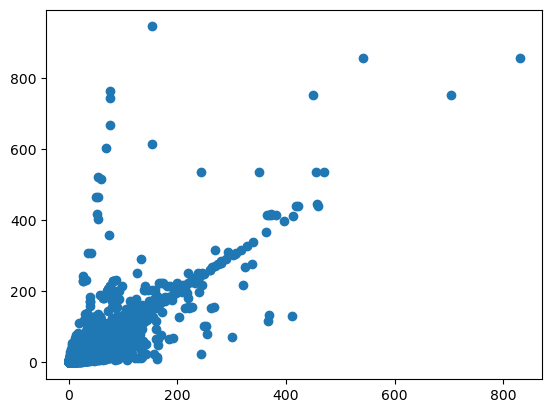

In [88]:
plt.scatter(clean_data["ACV Dollars Velocity"],clean_data["Dollars Velocity"])

# Exploratory 

## By Channel

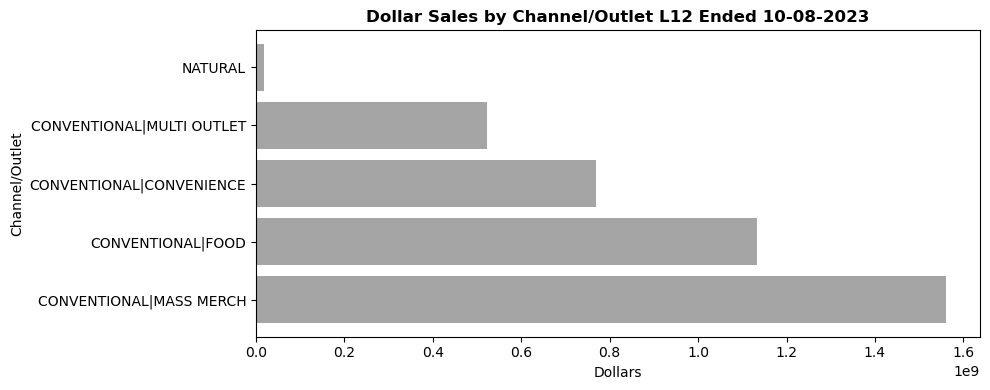

In [89]:
graph_dollar(clean_data,'Channel/Outlet')

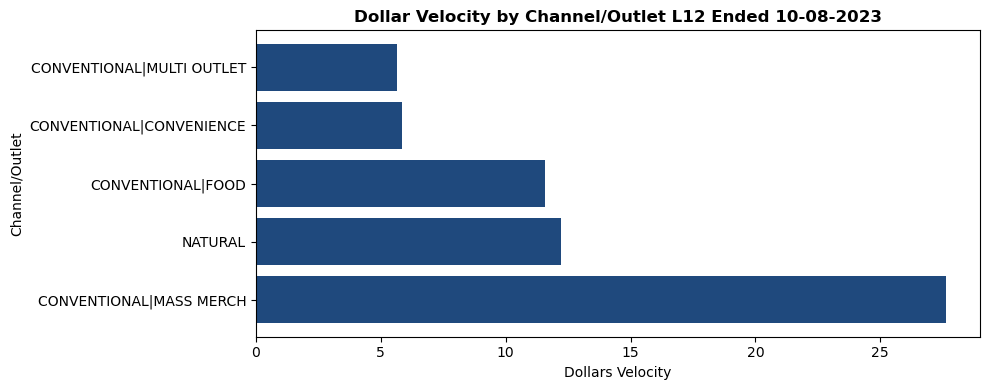

In [90]:
graph_vel(clean_data,'Channel/Outlet','ACV Week Store Selling')

In [91]:
# Channel_d = clean_data.groupby("Channel/Outlet")['Dollars'].sum().reset_index(name='Sum Dollars')
# Channel_s = clean_data.groupby("Channel/Outlet")['Week Store Selling'].sum().reset_index(name='Sum SWS')
# Channel_vel = pd.DataFrame({'Channel/Outlet': Channel_d['Channel/Outlet'],
#                         'Dollar Vel': Channel_d['Sum Dollars']/Channel_s['Sum SWS'].values})
# Channel_vel = Channel_vel.sort_values(by="Dollar Vel", ascending=False)

# Channel_rank = Channel_d.sort_values(by="Sum Dollars", ascending=False)
# plt.figure(figsize=(10, 4))
# plt.barh(Channel_rank['Channel/Outlet'],Channel_rank['Sum Dollars'],color=grey)
# plt.xlabel('Dollars')
# plt.ylabel('Channel')
# plt.title('Dollars Sales by Channel L12',fontweight=600,fontsize = 12)
# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 4))
# plt.barh(Channel_vel['Channel/Outlet'],Channel_vel['Dollar Vel'],color=darkblue)
# plt.xlabel('Dollars Velocity')
# plt.ylabel('Channel')
# plt.title('Dollars Velocity by Channel L12',fontweight=600,fontsize = 12)
# plt.tight_layout()
# plt.show()

## By Geography

In [92]:
Food_chanl = clean_data[(clean_data["Channel/Outlet"]=="CONVENTIONAL|FOOD")&
                  (clean_data["Geography Level"]=="RMA")]

In [93]:
total_us = clean_data[(clean_data["Channel/Outlet"]=="CONVENTIONAL|FOOD")&
                  (clean_data["Geography Level"]=="TOTAL US")]

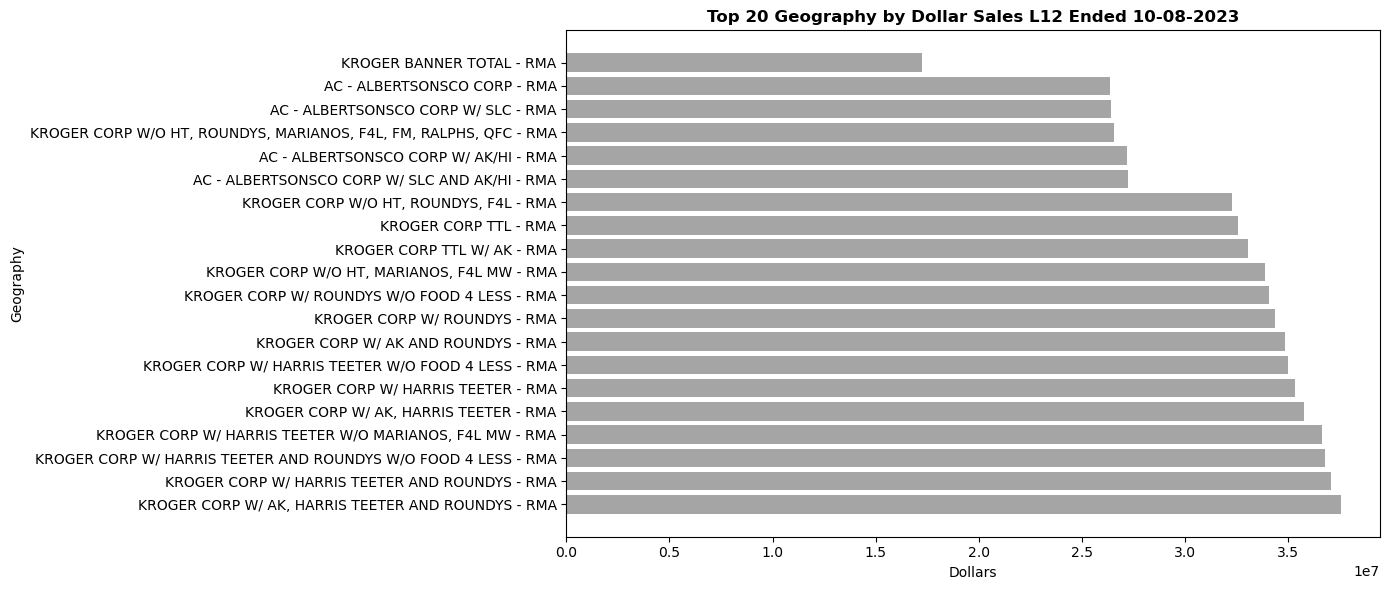

In [98]:
graph_dollar_top(Food_chanl,'Geography',top=20,size=(14,6))

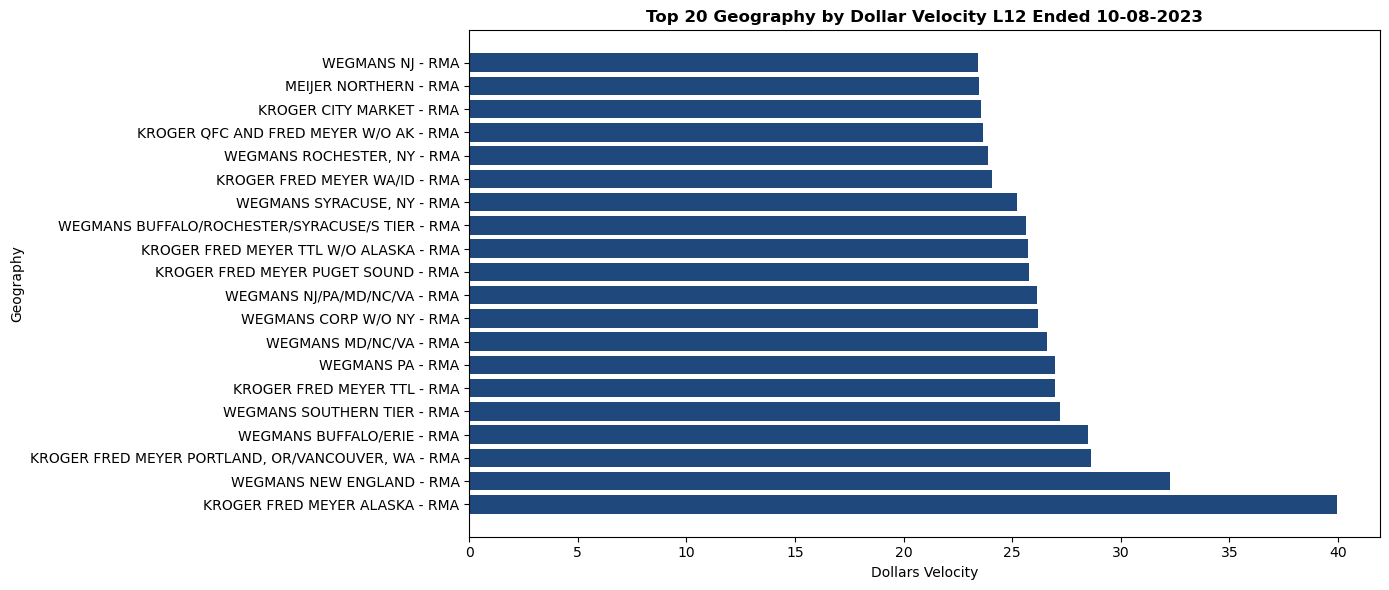

In [102]:
graph_vel_top(Food_chanl,'Geography','Week Store Selling',top=20,size=(14,6))

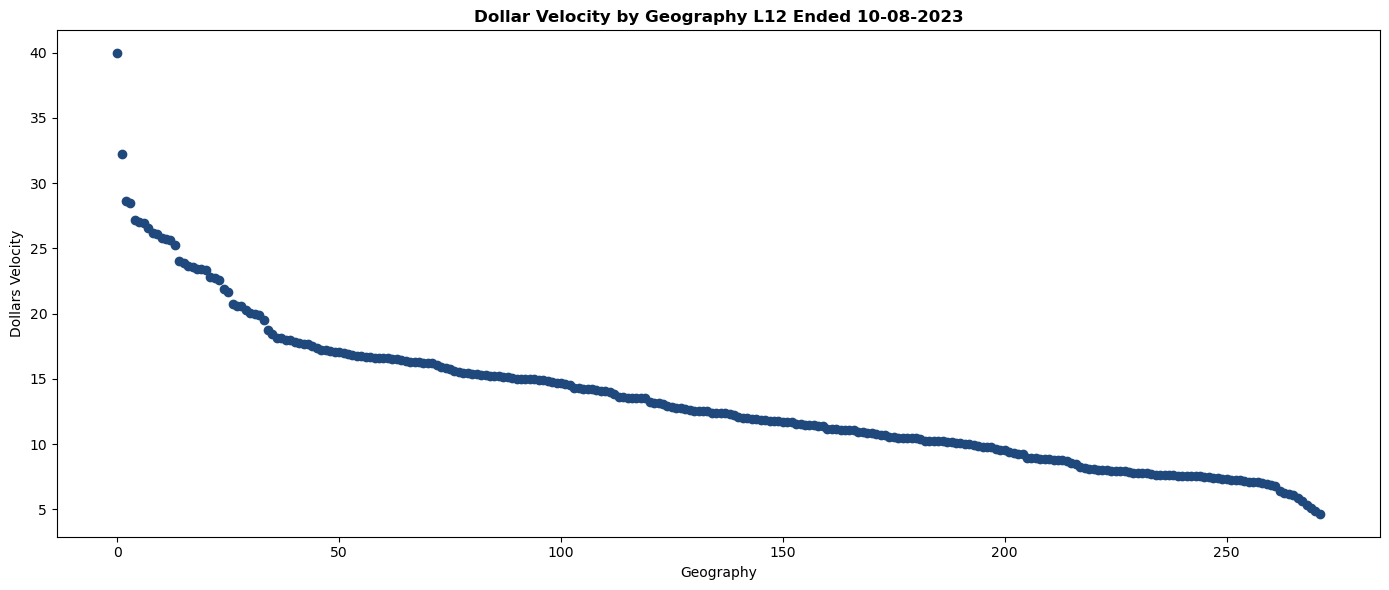

In [614]:
graph_vel_scatter(Food_chanl,'Geography','Week Store Selling',size=(14,6))

## By Brand

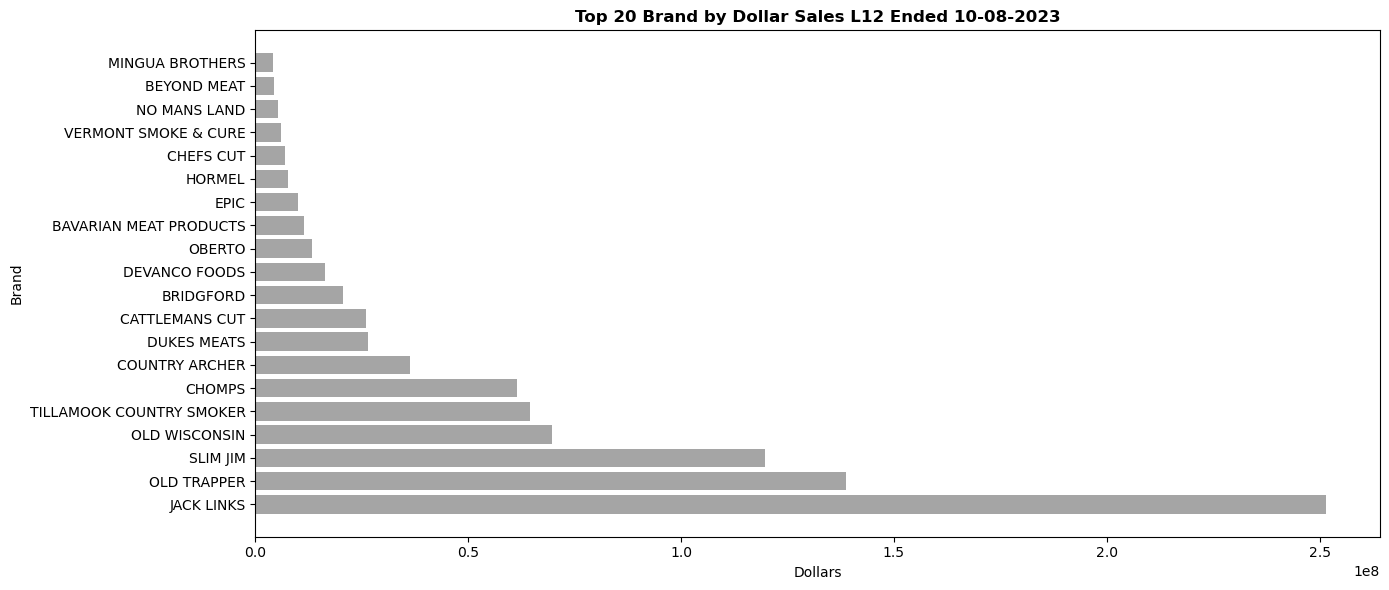

In [106]:
graph_dollar_top(Food_chanl,'Brand',top=20,size=(14,6))

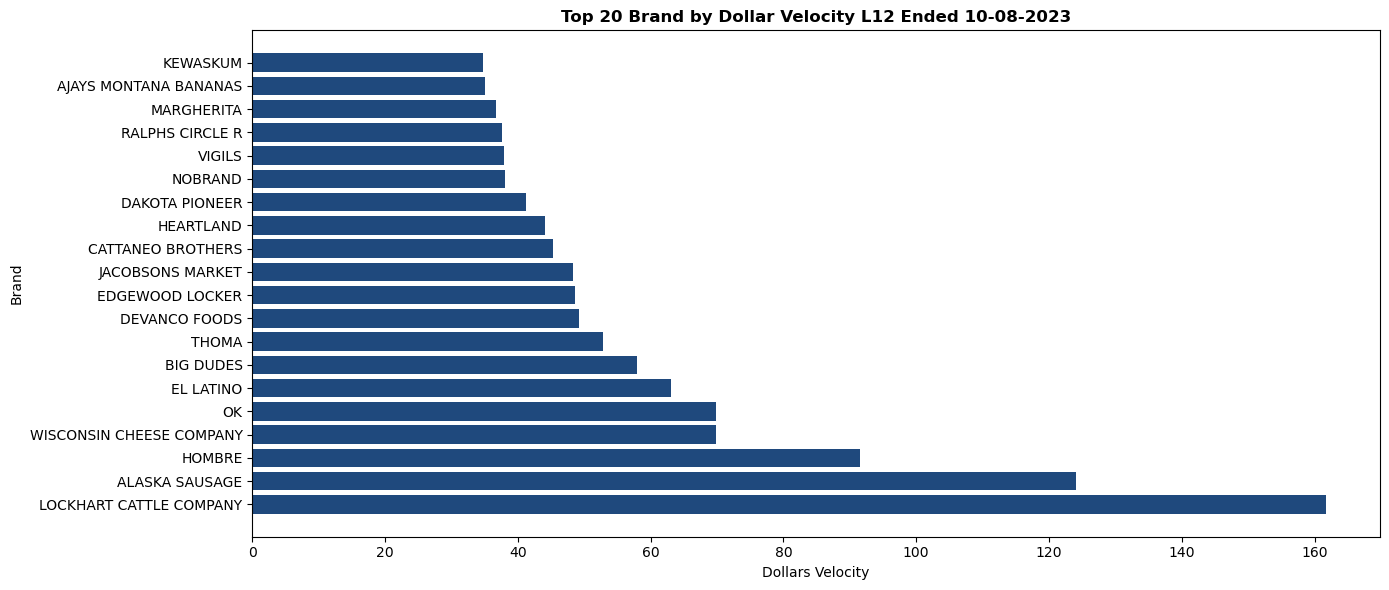

In [108]:
graph_vel_top(Food_chanl,'Brand','Week Store Selling',top=20,size=(14,6))

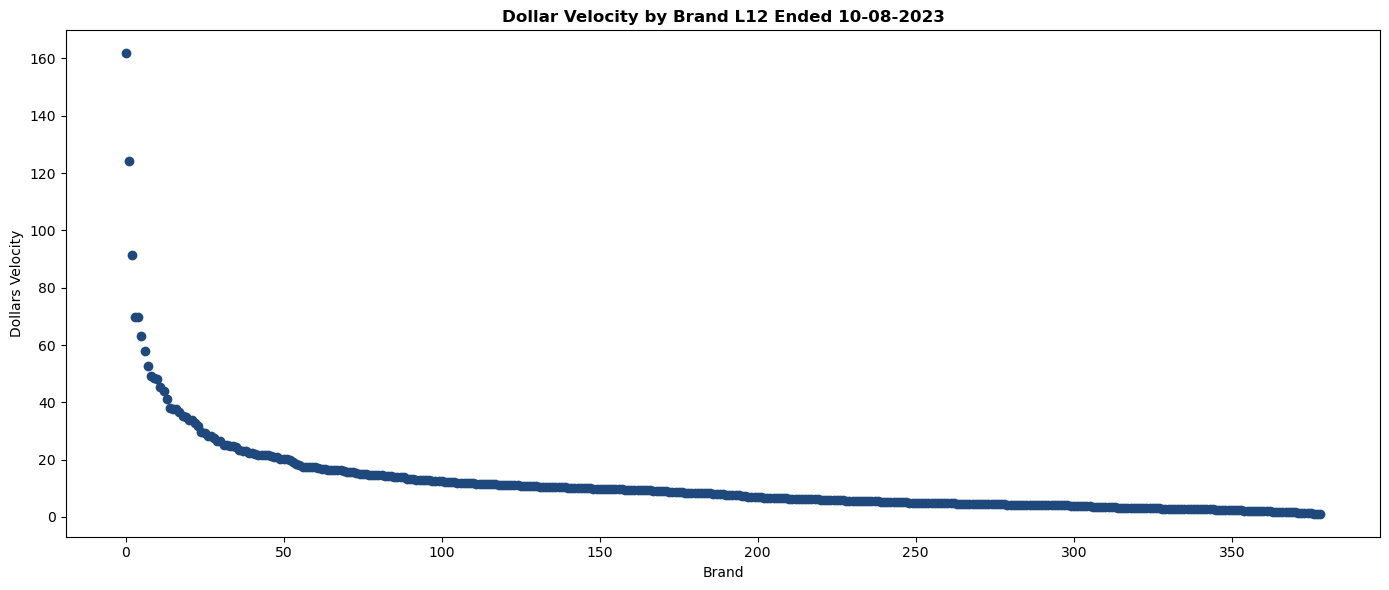

In [615]:
graph_vel_scatter(Food_chanl,'Brand','Week Store Selling',size=(14,6))

Text(0.5, 1.0, 'Dollars Velocity vs ACV Dollars Velocity @ Food Channel')

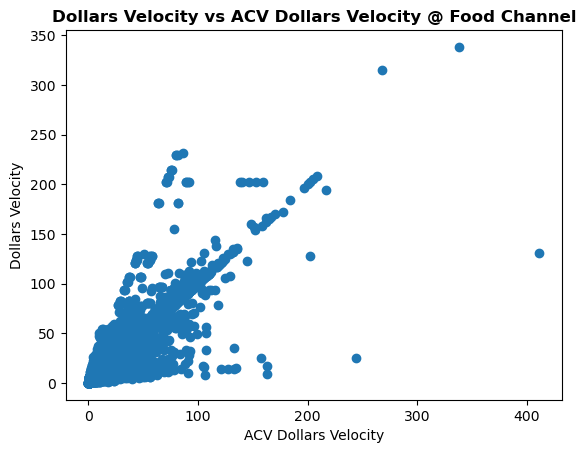

In [103]:
plt.scatter(Food_chanl["ACV Dollars Velocity"],Food_chanl["Dollars Velocity"])
plt.xlabel('ACV Dollars Velocity')
plt.ylabel('Dollars Velocity')
plt.title('Dollars Velocity vs ACV Dollars Velocity @ Food Channel',fontweight=600,fontsize = 12)

Text(0.5, 1.0, 'Dollars Velocity vs ACV Dollars Velocity @ Total US Food')

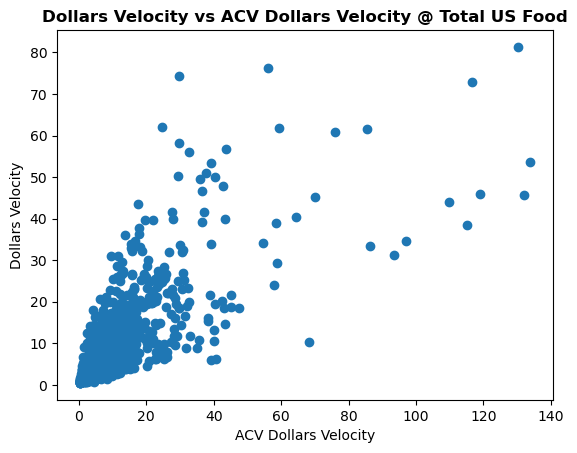

In [110]:
plt.scatter(total_us["ACV Dollars Velocity"],total_us["Dollars Velocity"])
plt.xlabel('ACV Dollars Velocity')
plt.ylabel('Dollars Velocity')
plt.title('Dollars Velocity vs ACV Dollars Velocity @ Total US Food',fontweight=600,fontsize = 12)

## 4) Data Filter Control 

In [111]:
clean_data['Max % ACV'].describe()

count    112180.000000
mean         31.831346
std          35.856845
min           0.000000
25%           1.200000
50%          12.200000
75%          64.000000
max         100.000000
Name: Max % ACV, dtype: float64

In [112]:
clean_data['Geography Level']

0              RMA
1              RMA
2              RMA
3              RMA
4              RMA
            ...   
116611    TOTAL US
116612    TOTAL US
116613    TOTAL US
116614    TOTAL US
116615    TOTAL US
Name: Geography Level, Length: 112180, dtype: object

In [113]:
#filters on the following 
Channel= 'CONVENTIONAL|FOOD' #'Channel/Outlet'
Geography= 'RMA' # 'Geography Level'
ACV_Threshold = 0.5 # 'Max % ACV'

In [114]:
# Filter on 
clean_data = clean_data[(clean_data['Channel/Outlet']==Channel)
                        &(clean_data['Geography Level']==Geography)
                        &(clean_data['Max % ACV']>ACV_Threshold)]


In [115]:
private_full_clean = private_full[(private_full['Channel/Outlet']==Channel)
                        &(private_full['Geography Level']==Geography)
                        &(private_full['Max % ACV']>ACV_Threshold)]

In [116]:
private_full_clean.shape

(2725, 215)

In [117]:
df4['Geography'].value_counts()

Geography
TOTAL US - MULO                             3351
TOTAL US - CONVENIENCE                      3090
TOTAL US - FOOD                             3064
TOTAL US - NATURAL CHANNEL                  1447
UNFI (SUPERVALU) TOTAL ENTERPRISE - SRMA    1367
                                            ... 
BASHA FOOD CITY - RMA                         14
KROGER RULER - RMA                            13
WALMART CORP PUERTO RICO - RMA                12
KMART - RMA                                    7
WALMART SC PUERTO RICO - RMA                   5
Name: count, Length: 511, dtype: int64

In [118]:
df4['Geography Level'].value_counts()

Geography Level
RMA         101228
TOTAL US     10952
Name: count, dtype: int64

In [119]:
clean_data.shape

(51288, 220)

# 3) Feature Engeering and Selection

## Useful Function

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
import math 
import seaborn as sns
%matplotlib inline

In [121]:
# Generate velocity dist across all attributes - no smoothing 
def create_chart(X,y):
    X_col_selected = X.columns
    col_num = 5
    row_num = math.ceil(len(X_col_selected)/col_num)

    fig, axes = plt.subplots(row_num, col_num, figsize=(20, 40))
    plt.subplots_adjust(bottom=0.15, top=2)
    axes = axes.flatten()



    for i, x in enumerate(X_col_selected):
            # x='ANIMAL TYPE'
            velocity = y
            # smoother plot
            #sns.kdeplot(velocity,ax=axes[i])
            axes[i].scatter(X[x],velocity, edgecolor='k')

            # Customize subplot labels and title
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            axes[i].set_title(f'{x}')
            axes[i].set_ylim([0, 20])
    # Set a single x-label and y-label for the entire plot
    fig.text(0, 0.5, "Density", va="center", rotation="vertical")
    fig.text(0.5, 0, "Velocity", ha="center")

    # Add a major title for the entire plot
    #fig.suptitle("Distribution of Velocity for Different Product Attributes", fontsize=16)
    fig.text(0.5, 1, "Distribution of Velocity for Different Product Attributes", ha="center", fontsize=16)

    # Hide any remaining empty subplots
    for j in range(len(X_col_selected), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()
    
# create_chart(X_train_encoded,y_train)

In [122]:
#Generate velocity dist across all attributes - no smoothing 
def create_hist(X):
    X_col_selected = X.columns
    col_num = 5
    row_num = math.ceil(len(X_col_selected)/col_num)

    fig, axes = plt.subplots(row_num, col_num, figsize=(30, 30))
    plt.subplots_adjust(bottom=0.15, top=2)
    axes = axes.flatten()



    for i, x in enumerate(X_col_selected):
            # x='ANIMAL TYPE'
           
            # smoother plot
            #sns.kdeplot(velocity,ax=axes[i])
            axes[i].hist(X[x], edgecolor='k')

            # Customize subplot labels and title
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            axes[i].set_title(f'{x}')
            #axes[i].set_ylim([0, 20])
    # Set a single x-label and y-label for the entire plot
    fig.text(0, 0.5, "Density", va="center", rotation="vertical")
    fig.text(0.5, 0, "NFP", ha="center")

    # Add a major title for the entire plot
    #fig.suptitle("Distribution of Velocity for Different Product Attributes", fontsize=16)
    fig.text(0.5, 1, "Distribution", ha="center", fontsize=16)

    # Hide any remaining empty subplots
    for j in range(len(X_col_selected), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()
    
# create_chart(X_train_encoded,y_train)

In [123]:

def create_box(X):
    X_col_selected = X.columns
    col_num = 5
    row_num = math.ceil(len(X_col_selected)/col_num)

    fig, axes = plt.subplots(row_num, col_num, figsize=(30, 30))
    plt.subplots_adjust(bottom=0.15, top=2)
    axes = axes.flatten()

    #boxprops = dict(facecolor='lightblue', color='blue')

    for i, x in enumerate(X_col_selected):
            # x='ANIMAL TYPE'
           
            # smoother plot
            #sns.kdeplot(velocity,ax=axes[i])
            axes[i].boxplot(X[x],patch_artist=True, boxprops=dict(facecolor='orange', color='red'))

            # Customize subplot labels and title
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            axes[i].set_title(f'{x}')
            #axes[i].set_ylim([0, 20])
    # Set a single x-label and y-label for the entire plot
    fig.text(0, 0.5, "Density", va="center", rotation="vertical")
    fig.text(0.5, 0, "NFP", ha="center")

    # Add a major title for the entire plot
    #fig.suptitle("Distribution of Velocity for Different Product Attributes", fontsize=16)
    fig.text(0.5, 1, "Distribution", ha="center", fontsize=16)

    # Hide any remaining empty subplots
    for j in range(len(X_col_selected), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()
    
# create_chart(X_train_encoded,y_train)

In [124]:
# define a function to determine the information gains between categorical vriables using mutual infomation

#pip install associations

from scipy.stats.contingency import association
from sklearn.metrics.cluster import normalized_mutual_info_score

def mutual_info_matrix(col,df):
    association_matrix = pd.DataFrame(index=col, columns=col)
    for col1 in col:
        for col2 in col:
            association_matrix.loc[col1, col2] = normalized_mutual_info_score(df[col1], df[col2])
    return association_matrix

def create_unique_correlated_pairs(association_matrix):
    highly_correlated = (association_matrix > 0.9) & (association_matrix < 1.0)
    correlated_pairs = []

    # Get the pairs of correlated columns
    for col in highly_correlated.columns:
        correlated_columns = highly_correlated[col][highly_correlated[col]].index.tolist()
        for correlated_col in correlated_columns:
            if correlated_col != col:
                correlated_pairs.append((col, correlated_col))


    # Create a set of frozensets to store unique pairs
    unique_pairs = set()

    # Iterate through the list and add unique pairs to the set
    for tup in correlated_pairs:
        unique_pairs.add(frozenset(tup))
    unique_correlated_pairs = [tuple(pair) for pair in unique_pairs]
    return unique_correlated_pairs

In [125]:
#define a function that compute the missing value percentage for each columns 
def Unknown_N_per(df, product_ch):
    """
    compute the missing value percentage for each columns in the dataframe

    Parameters:
    - df (Pandas dataframe): A dataset
    - product_ch(list): A list of all product attribute columns 

    Returns:
    - dataframe: a dataframe with column names and its corresponding missing value percentage

    Example:
    >>> prodcut_Att(['Channel/Outlet', 'Geography Level','FLAVOUR'])
    ['FLAVOUR']
    """
    unknown = (df[product_ch]=="UNKNOWN").sum()
    N = (df[product_ch]=="N").sum()
    missing_percentage = (unknown+N)/len(df)*100
    missing_percentage_df = pd.DataFrame({'Column Name': missing_percentage.index, 'N/Unknown Percentage': missing_percentage.values})
    missing_percentage_df = missing_percentage_df.sort_values(by='N/Unknown Percentage', ascending=False)
    return missing_percentage_df


In [126]:
def Heatmap_crosstab(X,x,y,size=(10, 20),color='Blues'):
    crosstab = pd.crosstab(X[x], y)
    plt.figure(figsize=size)
    #viridis
    sns.heatmap(crosstab, annot=True, cmap=color, fmt='d')
    plt.title(f'Relationship between {x} and $Velocity', fontsize=12,fontweight=550)
    plt.show()

In [127]:
select_atrribute = product_atrribute.copy()

In [128]:
Var =select_atrribute +['Dollars Velocity']
lm_data = clean_data[Var]
X = lm_data[select_atrribute]
y = lm_data['Dollars Velocity']

['Subcategory',
 'Brand',
 'Description',
 'ANIMAL TYPE',
 'BRAND POSITION',
 'CERTIFIED - AMERICAN HEART ASSOCIATION HEART - CHECK',
 'CERTIFIED B CORPORATION',
 'CERTIFIED DETOX PROJECT - GLYPHOSATE RESIDUE FREE',
 'CERTIFIED FAIR TRADE USA',
 'CERTIFIED FAIRTRADE AMERICA',
 'CERTIFIED GREENER WORLD - ANIMAL WELFARE',
 'CERTIFIED GREENER WORLD - GRASSFED',
 'CERTIFIED GREENER WORLD - NON GMO',
 'CERTIFIED MARINE STEWARDSHIP COUNCIL',
 'CERTIFIED NON-GMO PROJECT VERIFIED',
 'CERTIFIED PALEO FOUNDATION - GRAIN FREE',
 'CERTIFIED PALEO FOUNDATION - KETO',
 'CERTIFIED PALEO FOUNDATION - PALEO',
 'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
 'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
 'CERTIFIED PLANT BASED FOODS ASSOCIATION',
 'CERTIFIED REGENERATIVE ORGANIC',
 'CERTIFIED UPCYCLED',
 'CERTIFIED WHOLE GRAINS COUNCIL',
 'COMPANY',
 'DIET - FODMAP DIET',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'DIET - PALEO DIET',
 'DIET - PESCATARIAN DIET',
 'DIET - PLANT BASED DIET',
 'DIET - VE

## 1) Remove unwanted columns

X is lm_data[select_atrribute] after removing 
1) EQ UNIT SIZE
2) Description
3) Brand 
4) COMPANY
5) Columns with only one value or columns 

X2 is X after
1) Renaming values to bve 'Y' or 'N' for columns that are binary 
2) removing that contains values that are not significant

In [131]:
# only sizes is numerical values 
X[select_atrribute].select_dtypes(include=['number'])

EQ UNIT SIZE  SIZE
1                2.5   2.5
4                3.0   3.0
6                5.0   5.0
7               20.0  20.0
9                1.0   1.0
...              ...   ...
105149           1.0   1.0
105150           1.0   1.0
105151          15.0  15.0
105155           3.0   3.0
105156           2.5   2.5

[51288 rows x 2 columns]

In [132]:
((X['EQ UNIT SIZE']==X['SIZE'])==False).sum()

0

In [133]:
# EQ unuit size and size are the same, drop EQ size
X.drop('EQ UNIT SIZE',axis=1,inplace=True)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\3645800353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('EQ UNIT SIZE',axis=1,inplace=True)


In [134]:
# description can be dropped
X.drop('Description',axis=1,inplace=True)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1046218705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Description',axis=1,inplace=True)


In [135]:
# Brand and company can be drop 
# X.drop(['Brand','COMPANY'],axis=1,inplace=True)

X.drop(['COMPANY'],axis=1,inplace=True)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1827219887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['COMPANY'],axis=1,inplace=True)


In [136]:
select_atrribute1 = X.columns

In [137]:
print(f'Before dropping there are {len(select_atrribute)} x variables')
print(f'After dropping there are {len(select_atrribute1)} x variables')

Before dropping there are 200 x variables
After dropping there are 197 x variables


In [138]:
#col that contain categorical values
obj_col = X[select_atrribute1].select_dtypes(include=['object']).columns
#col that contain numerical values
num_col = X[select_atrribute1].select_dtypes(include=['number']).columns

In [271]:
num_col

Index(['SIZE'], dtype='object')

In [139]:
# Convert all columns to strings
for column in obj_col:
    X[column] = X[column].astype(str)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\4251900320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51288 entries, 1 to 105156
Columns: 197 entries, Subcategory to UNIT OF MEASURE
dtypes: float64(1), object(196)
memory usage: 77.5+ MB


In [141]:
def value_in_col(df,cat):
    lst = dict()
    for j in cat:
        val = cat.get(j)
        for i in val:
            v = df[i].unique()
            key = i
            if key in lst:
                lst[key].append(v)

            else: 
                lst[key]= [v]
    return lst

In [142]:
X_att = X.columns
cat = categorize(X_att)
cat.keys()

dict_keys(['Subcategory', 'Brand', 'ANIMAL', 'BRAND', 'CERTIFIED', 'DIET', 'EATING', 'FAIR', 'FLAVOR', 'FUNCTIONAL', 'INGREDIENT', 'INTERNATIONAL', 'LABELED', 'NFP', 'PALEO', 'PLANT', 'POSITIONING', 'PRODUCT', 'RAW', 'SIZE', 'STORAGE', 'UNIT'])

In [143]:
value_in_col(X,cat)

{'Subcategory': [array(['SS JERKY', 'SS MEAT SNACKS OTHER', 'SS PLANT BASED MEAT SNACKS'],
        dtype=object)],
 'Brand': [array(['OBERTO', 'DEARBORN', 'DIETZ & WATSON', 'IOWA SMOKEHOUSE',
         'PEARSON RANCH', 'TILLAMOOK COUNTRY SMOKER', 'BRIDGFORD',
         '1ST PHORM', 'TROYER', 'VERMONT SMOKE & CURE', 'EPIC',
         'OLD WISCONSIN', 'JACK LINKS', 'COUNTRY ARCHER', 'ELLYS',
         'AUFSCHNITT', 'DAKOTA PURE BISON', 'OLD TRAPPER',
         'TAYLORS SAUSAGE', 'CATTLEMANS CUT', 'MIGHTY SPARK FOOD CO',
         'THE NEW PRIMAL', 'R-C RANCH TEXAS CRAFT MEATS', 'THINK JERKY',
         'WYOMING GOURMET BEEF', 'DARTAGNAN', 'BEYOND MEAT', 'CHEFS CUT',
         'STAFFORDS', 'DUKES MEATS', 'UP NORTH SPECIALTY MEATS',
         'STOLTZFUS', 'GOLDEN FLAKE', 'MATADOR BY JACK LINKS',
         'BAVARIAN MEAT PRODUCTS', 'RIGHTEOUS FELON', 'MINGUA BROTHERS',
         'HERO JERKY', 'SWEETWOOD SMOKEHOUSE', 'EAT THE CHANGE',
         'KALAHARI BILTONG', 'OSTRIM', 'SLIM JIM', 'PRIMAL',
       

In [144]:
# unique # of category in each vriables
num_val=dict()
for col in X_att:
    num_val[col]= len(X[col].unique())
    print(f'{col}: {len(X[col].unique())}')

Subcategory: 3
Brand: 372
ANIMAL TYPE: 21
BRAND POSITION: 7
CERTIFIED - AMERICAN HEART ASSOCIATION HEART - CHECK: 1
CERTIFIED B CORPORATION: 1
CERTIFIED DETOX PROJECT - GLYPHOSATE RESIDUE FREE: 1
CERTIFIED FAIR TRADE USA: 1
CERTIFIED FAIRTRADE AMERICA: 1
CERTIFIED GREENER WORLD - ANIMAL WELFARE: 1
CERTIFIED GREENER WORLD - GRASSFED: 1
CERTIFIED GREENER WORLD - NON GMO: 1
CERTIFIED MARINE STEWARDSHIP COUNCIL: 1
CERTIFIED NON-GMO PROJECT VERIFIED: 2
CERTIFIED PALEO FOUNDATION - GRAIN FREE: 1
CERTIFIED PALEO FOUNDATION - KETO: 2
CERTIFIED PALEO FOUNDATION - PALEO: 2
CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY: 2
CERTIFIED PALEO FOUNDATION - PALEO VEGAN: 2
CERTIFIED PLANT BASED FOODS ASSOCIATION: 2
CERTIFIED REGENERATIVE ORGANIC: 1
CERTIFIED UPCYCLED: 1
CERTIFIED WHOLE GRAINS COUNCIL: 1
DIET - FODMAP DIET: 3
DIET - KETO DIET: 3
DIET - KETO HIGH FAT: 3
DIET - PALEO DIET: 3
DIET - PESCATARIAN DIET: 3
DIET - PLANT BASED DIET: 3
DIET - VEGAN DIET: 3
DIET - VEGETARIAN DIET: 3
DIET - WHOLE 30 FR

Dropping columns with only one value

In [145]:
one_value_col=[]
for key in num_val:
    if num_val[key] ==1:
        one_value_col.append(key)
one_value_col

['CERTIFIED - AMERICAN HEART ASSOCIATION HEART - CHECK',
 'CERTIFIED B CORPORATION',
 'CERTIFIED DETOX PROJECT - GLYPHOSATE RESIDUE FREE',
 'CERTIFIED FAIR TRADE USA',
 'CERTIFIED FAIRTRADE AMERICA',
 'CERTIFIED GREENER WORLD - ANIMAL WELFARE',
 'CERTIFIED GREENER WORLD - GRASSFED',
 'CERTIFIED GREENER WORLD - NON GMO',
 'CERTIFIED MARINE STEWARDSHIP COUNCIL',
 'CERTIFIED PALEO FOUNDATION - GRAIN FREE',
 'CERTIFIED REGENERATIVE ORGANIC',
 'CERTIFIED UPCYCLED',
 'CERTIFIED WHOLE GRAINS COUNCIL']

In [146]:
X.drop(one_value_col,axis=1,inplace=True)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1286149767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(one_value_col,axis=1,inplace=True)


In [147]:
X_att = X.columns
cat = categorize(X_att)
value_in_col(X,cat)

{'Subcategory': [array(['SS JERKY', 'SS MEAT SNACKS OTHER', 'SS PLANT BASED MEAT SNACKS'],
        dtype=object)],
 'Brand': [array(['OBERTO', 'DEARBORN', 'DIETZ & WATSON', 'IOWA SMOKEHOUSE',
         'PEARSON RANCH', 'TILLAMOOK COUNTRY SMOKER', 'BRIDGFORD',
         '1ST PHORM', 'TROYER', 'VERMONT SMOKE & CURE', 'EPIC',
         'OLD WISCONSIN', 'JACK LINKS', 'COUNTRY ARCHER', 'ELLYS',
         'AUFSCHNITT', 'DAKOTA PURE BISON', 'OLD TRAPPER',
         'TAYLORS SAUSAGE', 'CATTLEMANS CUT', 'MIGHTY SPARK FOOD CO',
         'THE NEW PRIMAL', 'R-C RANCH TEXAS CRAFT MEATS', 'THINK JERKY',
         'WYOMING GOURMET BEEF', 'DARTAGNAN', 'BEYOND MEAT', 'CHEFS CUT',
         'STAFFORDS', 'DUKES MEATS', 'UP NORTH SPECIALTY MEATS',
         'STOLTZFUS', 'GOLDEN FLAKE', 'MATADOR BY JACK LINKS',
         'BAVARIAN MEAT PRODUCTS', 'RIGHTEOUS FELON', 'MINGUA BROTHERS',
         'HERO JERKY', 'SWEETWOOD SMOKEHOUSE', 'EAT THE CHANGE',
         'KALAHARI BILTONG', 'OSTRIM', 'SLIM JIM', 'PRIMAL',
       

 Re- naming values in the Label and certifies columns 

In [163]:
X1=X.copy()

In [164]:
certified = list(cat.get('CERTIFIED'))
labeled = list(cat.get('LABELED'))

In [165]:
# Certified columns
X1[certified] = X1[certified].applymap(lambda x: 'Y' if str(x).startswith('CERTIFIED') else 
                     ('N' if str(x).startswith('NOT CERTIFIED')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))))

In [166]:
X1[labeled] = X1[labeled].applymap(lambda x: 'Y' if str(x).startswith('LABELED') else 
                     ('N' if str(x).startswith('NOT LABELED')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))))

In [167]:
X1['PALEO']=X1['PALEO'].map(lambda x: 'Y' if str(x).startswith('PALEO') else 
                     ('N' if str(x).startswith('NOT PALEO')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))))

In [168]:
X1=X1.applymap(
    lambda x: "UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))

In [170]:
X1['FAIR TRADE']=X1['FAIR TRADE'].map(lambda x: 'Y' if str(x).startswith('FAIR-TRADE CLAIM') else 
                     ('N' if str(x).startswith('NOT')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).endswith('UNKNOWN'))
                           else str(x))))

In [172]:
X1['RAW']=X1['RAW'].map(lambda x: 'Y' if str(x).startswith('RAW POSITIONED') else 
                     ('N' if str(x).startswith('NOT')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).endswith('UNKNOWN'))
                           else str(x))))

In [173]:
X_att1 = X1.columns
cat1 = categorize(X_att1)
value_in_col(X1,cat1)

{'Subcategory': [array(['SS JERKY', 'SS MEAT SNACKS OTHER', 'SS PLANT BASED MEAT SNACKS'],
        dtype=object)],
 'Brand': [array(['OBERTO', 'DEARBORN', 'DIETZ & WATSON', 'IOWA SMOKEHOUSE',
         'PEARSON RANCH', 'TILLAMOOK COUNTRY SMOKER', 'BRIDGFORD',
         '1ST PHORM', 'TROYER', 'VERMONT SMOKE & CURE', 'EPIC',
         'OLD WISCONSIN', 'JACK LINKS', 'COUNTRY ARCHER', 'ELLYS',
         'AUFSCHNITT', 'DAKOTA PURE BISON', 'OLD TRAPPER',
         'TAYLORS SAUSAGE', 'CATTLEMANS CUT', 'MIGHTY SPARK FOOD CO',
         'THE NEW PRIMAL', 'R-C RANCH TEXAS CRAFT MEATS', 'THINK JERKY',
         'WYOMING GOURMET BEEF', 'DARTAGNAN', 'BEYOND MEAT', 'CHEFS CUT',
         'STAFFORDS', 'DUKES MEATS', 'UP NORTH SPECIALTY MEATS',
         'STOLTZFUS', 'GOLDEN FLAKE', 'MATADOR BY JACK LINKS',
         'BAVARIAN MEAT PRODUCTS', 'RIGHTEOUS FELON', 'MINGUA BROTHERS',
         'HERO JERKY', 'SWEETWOOD SMOKEHOUSE', 'EAT THE CHANGE',
         'KALAHARI BILTONG', 'OSTRIM', 'SLIM JIM', 'PRIMAL',
       

Dropping insignificant columns

In [174]:
# Drop columns that are not important 
columns_to_drop = [col for col in X.columns if X1[col].isin(['NOT CERTIFIED', 'PRIVATE LABEL NOT CODED']).all()]
columns_to_drop

[]

In [175]:
columns_to_drop2 = [col for col in X.columns if X1[col].isin(['N', 'UNKNOWN']).all()]
columns_to_drop2

['INGREDIENT - ACAI',
 'INGREDIENT - ACEROLA CHERRY',
 'INGREDIENT - GUARANA',
 'INGREDIENT - PECAN',
 'INGREDIENT - PECTIN',
 'INGREDIENT - PROPYL GALLATE',
 'INGREDIENT - QUINOA',
 'INGREDIENT - SORGHUM',
 'INGREDIENT - SUPER FRUITS',
 'INGREDIENT - WALNUT',
 'INGREDIENT - WHOLE KALE',
 'INGREDIENT - WHOLE SPINACH',
 'INGREDIENT - WHOLE STRAWBERRY']

In [176]:
# Drop abobe columns and others insignificant ones
X1.drop(columns_to_drop,inplace=True,axis=1)
X1.drop(columns_to_drop2,inplace=True,axis=1)
# X1.drop('FAIR TRADE',inplace=True,axis=1) #'NOT FAIR-TRADE', 'FAIR-TRADE UNKNOWN'
# X1.drop('RAW',inplace=True,axis=1) #'NOT RAW POSITIONED', 'UNKNOWN
X1.drop('PLANT BASED',inplace=True,axis=1) #'SUBCATEGORY NOT CODED', 'PLANT BASED POSITIONED'
# X1.drop('EATING OCCASION',inplace=True,axis=1) # 'EATING OCCASION - SNACK', 'SUBCATEGORY NOT CODED'

In [177]:
product_atrribute2=X1.columns
print(f'Before dropping there are {len(select_atrribute)} x variables')
print(f'After 1st dropping there are {len(select_atrribute1)} x variables')
print(f"After 2nd cleaning, there are {len(product_atrribute2)} product attributes")


Before dropping there are 200 x variables
After 1st dropping there are 197 x variables
After 2nd cleaning, there are 170 product attributes


In [178]:
X1.shape

(51288, 170)

In [ ]:
#create_chart(X1,y)

## 2) Data cleaning and engeering on Targte Variable
- new_x is X after dropping rows with dollar velocity identified as outliers
- new_y is y after dropping rows with dollar velocity identified as outliers 
- y_cat is new_y after categorizing dollars velocity into brackets (low, med, high)
- y_num remain the numerical values
1) Identify outliers 
2) Categorize Dollar Velocity into Low, Med, and high

In [180]:
#save a copy continue with X
X2=X1.copy()

In [181]:
y.describe()

count    51288.000000
mean        10.463744
std         13.326109
min          0.182857
25%          3.587100
50%          6.323895
75%         12.024430
max        338.403030
Name: Dollars Velocity, dtype: float64

(array([4.8894e+04, 1.9490e+03, 3.1500e+02, 8.7000e+01, 1.1000e+01,
        1.8000e+01, 1.2000e+01, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.82857143e-01, 3.40048745e+01, 6.78268918e+01, 1.01648909e+02,
        1.35470926e+02, 1.69292944e+02, 2.03114961e+02, 2.36936978e+02,
        2.70758996e+02, 3.04581013e+02, 3.38403030e+02]),
 <BarContainer object of 10 artists>)

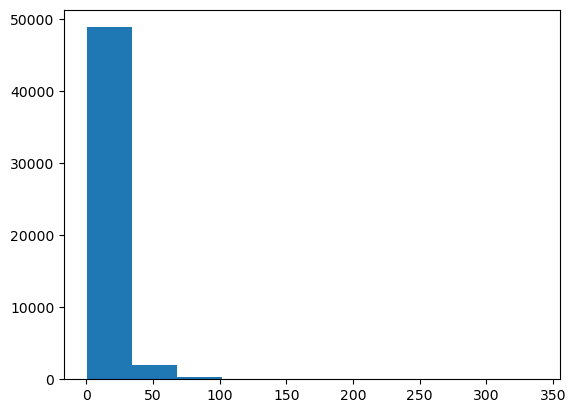

In [182]:
# cluster mainly between 0-10 velocity
plt.hist(y)

<Axes: xlabel='Dollars Velocity'>

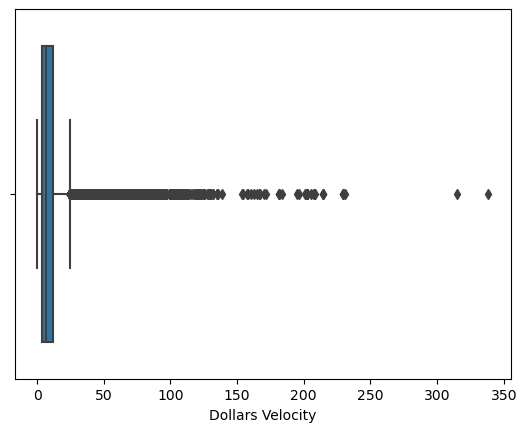

In [183]:
import seaborn as sns
sns.boxplot(x=y)

In [184]:
t = 90
threshold = np.percentile(y, t)
(y[y<=threshold]).shape

(46159,)

In [185]:
# Only keep y where below 90% percentile threshold

# new_y = y.copy()
new_y = y[y<=threshold]
X2 = X2.loc[new_y.index]
threshold

22.58305673758866

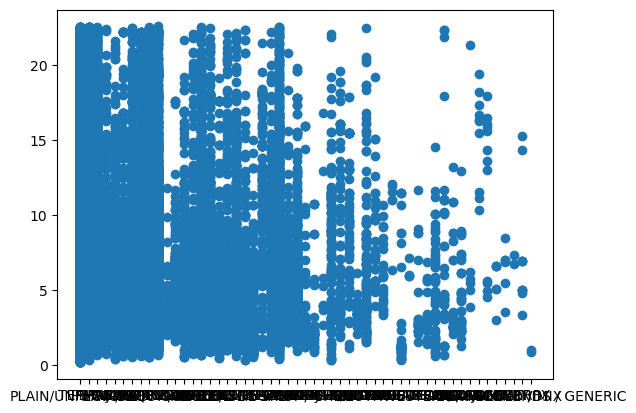

In [186]:
plt.scatter(X2['FLAVOR'],new_y.loc[X2['FLAVOR'].index])

In [187]:
# Categorize Dollar velocity into three brackets 
Q1 = np.percentile(new_y, 20)
Q2 = np.percentile(new_y, 40)
Q3 = np.percentile(new_y, 60)
Q4 = np.percentile(new_y, 80)
print(f'Q1:{Q1},Q2:{Q2},Q3:{Q3},Q4:{Q4}')

Q1:2.985,Q2:4.665292658730158,Q3:6.955632304369918,Q4:10.99693754856255


In [188]:
new_y = pd.DataFrame(new_y)
bins_y= [float('-inf'), Q1,Q2,Q3,Q4, float('inf')]
lables_y = [0,1,2,3,4]
new_y['$Velocity'] = pd.cut(new_y['Dollars Velocity'], bins=bins_y, labels=lables_y)

In [189]:
max(new_y['Dollars Velocity'])

22.5825

In [190]:
Q1 = round(Q1,2)
Q2 = round(Q2,2)
Q3 = round(Q3,2)
Q4 = round(Q4,2)

Text(0.5, 1.0, 'Frequency by Dollar Velocity Category')

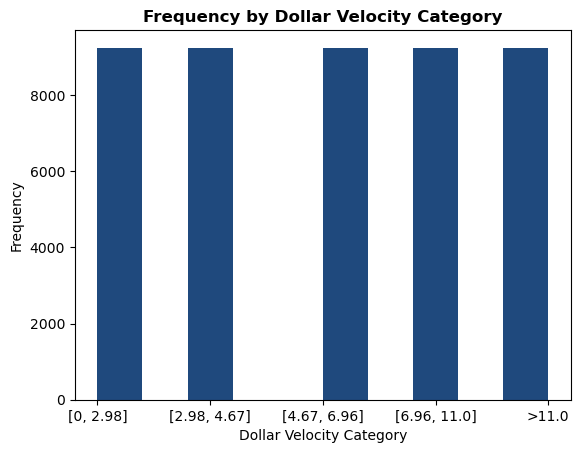

In [191]:
plt.hist(new_y['$Velocity'],color=darkblue)

plt.xticks(np.arange(0, 5, 1),[str([0,Q1]), str([Q1,Q2]),str([Q2,Q3]), str([Q3,Q4]), '>'+str(Q4)])
plt.xlabel("Dollar Velocity Category")
plt.ylabel("Frequency")
plt.title("Frequency by Dollar Velocity Category",fontweight=600,fontsize = 12)

In [192]:
X2.shape

(46159, 170)

In [193]:
new_y.shape

(46159, 2)

In [194]:
#checking x and y having same index num 
sum(X2.index!=new_y.index)

0

In [195]:
y_cat=new_y['$Velocity']
y_num=new_y['Dollars Velocity']

In [196]:
data_all_cat = pd.concat([X2,y_cat],axis=1)
data_all_num = pd.concat([X2,y_num],axis=1)
data_all_cat.shape

(46159, 171)

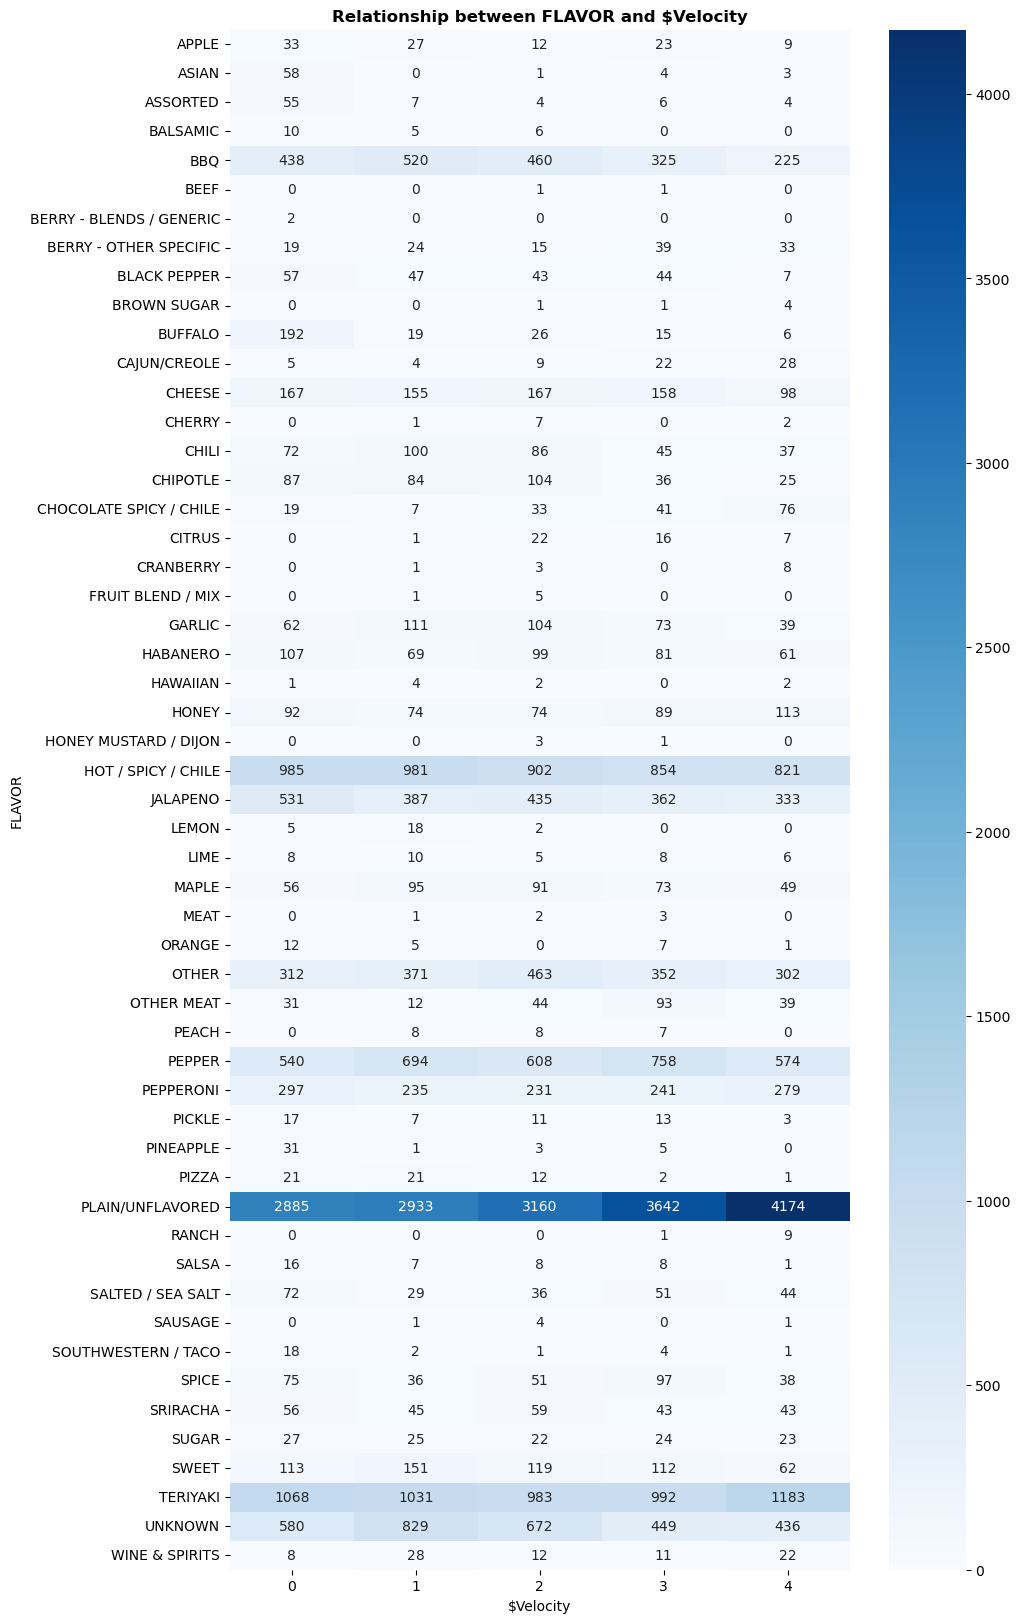

In [198]:
Heatmap_crosstab(X2,'FLAVOR',y_cat)

## 3) Data Engeerning and Selection 

In [199]:
X_att2 = X2.columns
cat2 = categorize(X_att2)
cat2.keys()

dict_keys(['Subcategory', 'Brand', 'ANIMAL', 'BRAND', 'CERTIFIED', 'DIET', 'EATING', 'FAIR', 'FLAVOR', 'FUNCTIONAL', 'INGREDIENT', 'INTERNATIONAL', 'LABELED', 'NFP', 'PALEO', 'POSITIONING', 'PRODUCT', 'RAW', 'SIZE', 'STORAGE', 'UNIT'])

In [200]:
col_to_drop=[]

In [201]:
cat2.keys()

dict_keys(['Subcategory', 'Brand', 'ANIMAL', 'BRAND', 'CERTIFIED', 'DIET', 'EATING', 'FAIR', 'FLAVOR', 'FUNCTIONAL', 'INGREDIENT', 'INTERNATIONAL', 'LABELED', 'NFP', 'PALEO', 'POSITIONING', 'PRODUCT', 'RAW', 'SIZE', 'STORAGE', 'UNIT'])

#### Certified Columns
- no columns from certifies are selected

In [202]:
Certified = cat2.get('CERTIFIED')

In [203]:
# Drop certified columns as it is simialr to Diet columns 
X2[Certified]

CERTIFIED NON-GMO PROJECT VERIFIED CERTIFIED PALEO FOUNDATION - KETO  \
1                                       N                                 N   
4                                       N                                 N   
6                                       N                                 N   
7                                       N                                 N   
9                                       N                                 N   
...                                   ...                               ...   
105149                                  N                                 N   
105150                                  N                                 N   
105151                                  N                                 N   
105155                                  Y                                 N   
105156                                  N                                 N   

       CERTIFIED PALEO FOUNDATION - PALEO  \
1                                       N   
4                                       N   
6                                       N   
7                                       N   
9                                       N   
...                                   ...   
105149                                  N   
105150                                  N   
105151                                  N   
105155                                  N   
105156                                  N   

       CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY  \
1                                                N   
4                                                N   
6                                                N   
7                                                N   
9                                                N   
...                                            ...   
105149                                           N   
105150                                           N   
105151                                           N   
105155                                           N   
105156                                           N   

       CERTIFIED PALEO FOUNDATION - PALEO VEGAN  \
1                                             N   
4                                             N   
6                                             N   
7                                             N   
9                                             N   
...                                         ...   
105149                                        N   
105150                                        N   
105151                                        N   
105155                                        N   
105156                                        N   

       CERTIFIED PLANT BASED FOODS ASSOCIATION  
1                                            N  
4                                            N  
6                                            N  
7                                            N  
9                                            N  
...                                        ...  
105149                                       N  
105150                                       N  
105151                                       N  
105155                                       N  
105156                                       N  

[46159 rows x 6 columns]

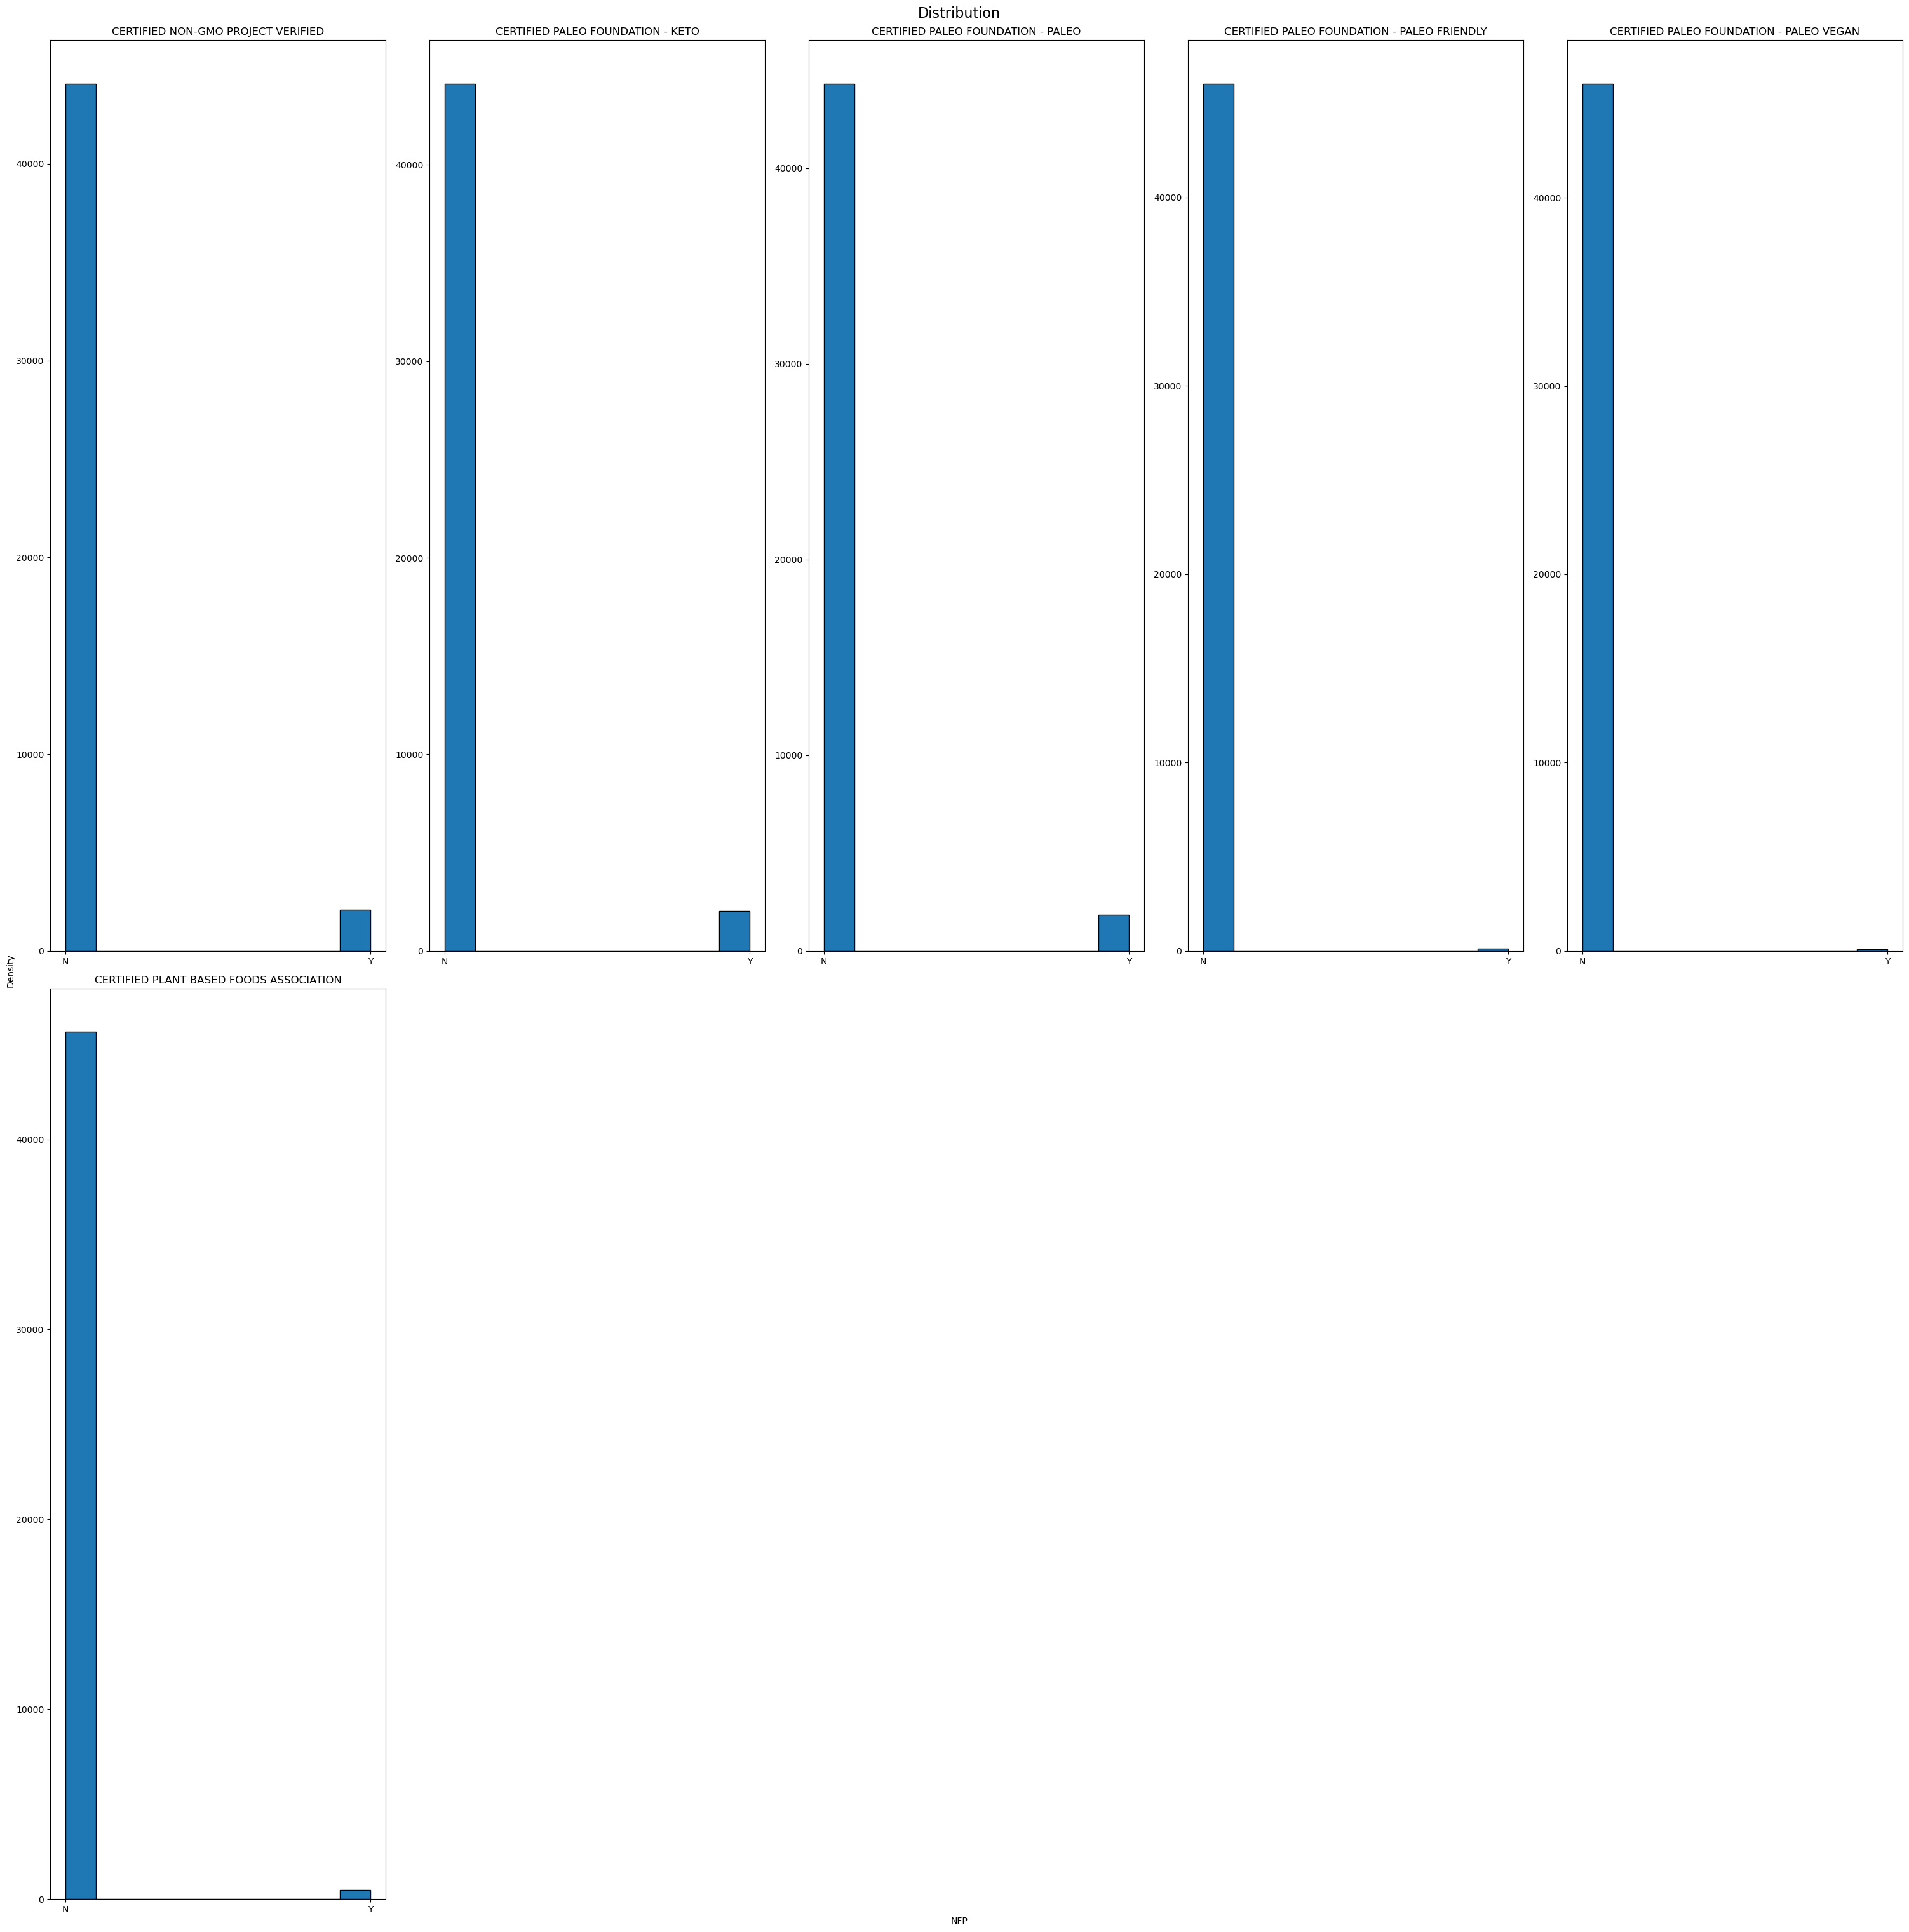

In [204]:
# Low variance 
create_hist(X2[Certified])

In [205]:
col_to_drop.append(Certified)

In [206]:
col_to_drop

[['CERTIFIED NON-GMO PROJECT VERIFIED',
  'CERTIFIED PALEO FOUNDATION - KETO',
  'CERTIFIED PALEO FOUNDATION - PALEO',
  'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
  'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
  'CERTIFIED PLANT BASED FOODS ASSOCIATION']]

#### Diet Columns
Using mutual info method to determine the dependency between the variables
- PESCATARIAN, PLANT BASED,VEGAN, VEGETARIAN  are combined
- PALEO and  WHOLE 30 FRIENDLY are combined
- 6 variables are selcted 

In [207]:
DIET= cat2.get('DIET')
X2[DIET]

DIET - FODMAP DIET DIET - KETO DIET DIET - KETO HIGH FAT  \
1                       Y                Y                    Y   
4                       N                Y                    N   
6                 UNKNOWN          UNKNOWN              UNKNOWN   
7                 UNKNOWN          UNKNOWN              UNKNOWN   
9                 UNKNOWN          UNKNOWN              UNKNOWN   
...                   ...              ...                  ...   
105149            UNKNOWN          UNKNOWN              UNKNOWN   
105150            UNKNOWN          UNKNOWN              UNKNOWN   
105151                  N                Y                    Y   
105155            UNKNOWN          UNKNOWN              UNKNOWN   
105156            UNKNOWN          UNKNOWN              UNKNOWN   

       DIET - PALEO DIET DIET - PESCATARIAN DIET DIET - PLANT BASED DIET  \
1                      N                       N                       N   
4                      N                       N                       N   
6                UNKNOWN                 UNKNOWN                 UNKNOWN   
7                UNKNOWN                 UNKNOWN                 UNKNOWN   
9                UNKNOWN                 UNKNOWN                 UNKNOWN   
...                  ...                     ...                     ...   
105149           UNKNOWN                 UNKNOWN                 UNKNOWN   
105150           UNKNOWN                 UNKNOWN                 UNKNOWN   
105151                 N                       N                       N   
105155           UNKNOWN                 UNKNOWN                 UNKNOWN   
105156           UNKNOWN                 UNKNOWN                 UNKNOWN   

       DIET - VEGAN DIET DIET - VEGETARIAN DIET DIET - WHOLE 30 FRIENDLY  
1                      N                      N                        N  
4                      N                      N                        N  
6                UNKNOWN                UNKNOWN                  UNKNOWN  
7                UNKNOWN                UNKNOWN                  UNKNOWN  
9                UNKNOWN                UNKNOWN                  UNKNOWN  
...                  ...                    ...                      ...  
105149           UNKNOWN                UNKNOWN                  UNKNOWN  
105150           UNKNOWN                UNKNOWN                  UNKNOWN  
105151                 N                      N                        N  
105155           UNKNOWN                UNKNOWN                  UNKNOWN  
105156           UNKNOWN                UNKNOWN                  UNKNOWN  

[46159 rows x 9 columns]

In [208]:
DIET2=DIET+['PALEO']
DIET2

['DIET - FODMAP DIET',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'DIET - PALEO DIET',
 'DIET - PESCATARIAN DIET',
 'DIET - PLANT BASED DIET',
 'DIET - VEGAN DIET',
 'DIET - VEGETARIAN DIET',
 'DIET - WHOLE 30 FRIENDLY',
 'PALEO']

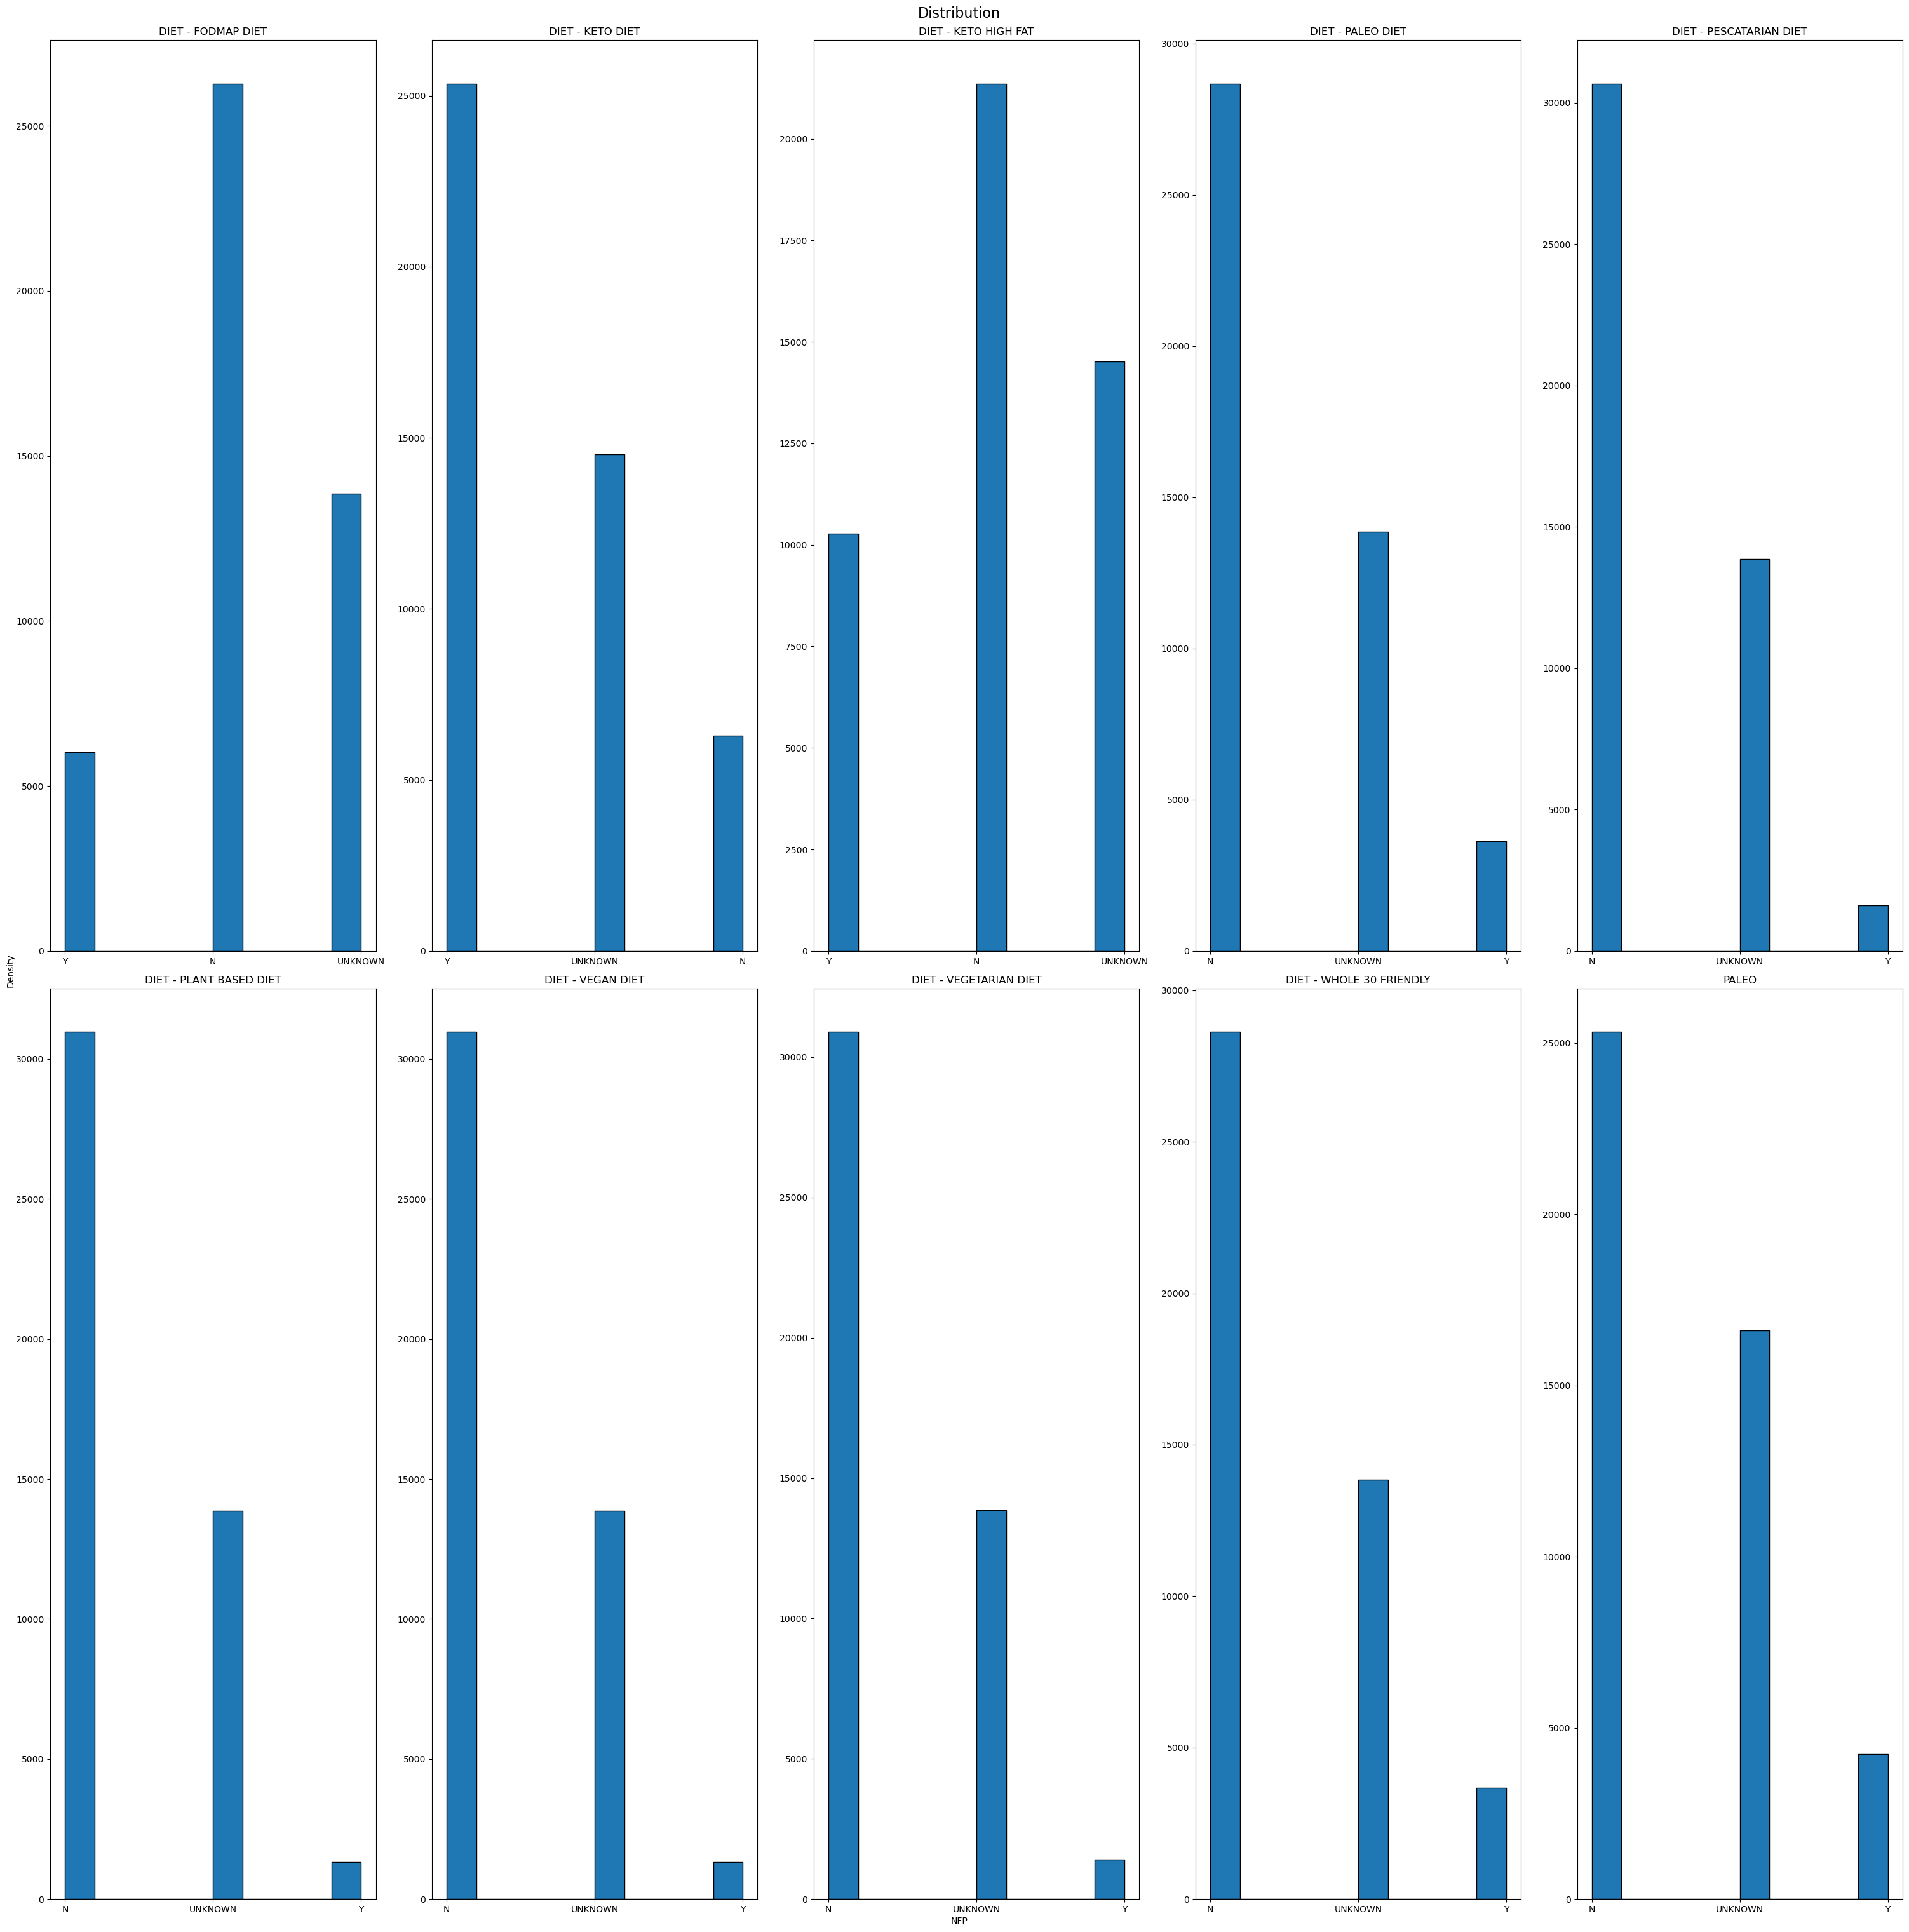

In [209]:
create_hist(X2[DIET2])

In [210]:
association_matrix = mutual_info_matrix(DIET2,X2)

In [211]:
create_unique_correlated_pairs(association_matrix)

[('DIET - PLANT BASED DIET', 'DIET - VEGETARIAN DIET'),
 ('DIET - VEGAN DIET', 'DIET - PESCATARIAN DIET'),
 ('DIET - VEGETARIAN DIET', 'DIET - PESCATARIAN DIET'),
 ('DIET - VEGAN DIET', 'DIET - VEGETARIAN DIET'),
 ('DIET - PLANT BASED DIET', 'DIET - PESCATARIAN DIET')]

In [212]:
#Create a new column that Combine: 
#   ['DIET - PLANT BASED DIET'],['DIET - VEGAN DIET'],['DIET - VEGETARIAN DIET'],['DIET - PESCATARIAN DIET']
c1 = ['DIET - PLANT BASED DIET','DIET - VEGAN DIET','DIET - VEGETARIAN DIET','DIET - PESCATARIAN DIET']
X2['DIET - VEGAN/VEGETARIAN/PESCATARIAN'] = X2[c1].apply(lambda row: 'Y' if 'Y' in row.values 
                                                         else ('N' if 'N' in row.values else 'UNKNOWN'), axis=1)
col_to_drop.append(c1)

In [ ]:
#Create a new column that Combine: 
#   ['DIET - PALEO DIET', 'DIET - WHOLE 30 FRIENDLY']
# c2 = ['DIET - PALEO DIET', 'DIET - WHOLE 30 FRIENDLY']
# X2['PALEO/WHOLE 30 FRIENDLY']=X2[c2].apply(lambda row: 'Y' if 'Y' in row.values 
#                                                          else ('N' if 'N' in row.values else 'UNKNOWN'), axis=1)
# col_to_drop.append(c2)

In [213]:
col_to_drop

[['CERTIFIED NON-GMO PROJECT VERIFIED',
  'CERTIFIED PALEO FOUNDATION - KETO',
  'CERTIFIED PALEO FOUNDATION - PALEO',
  'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
  'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
  'CERTIFIED PLANT BASED FOODS ASSOCIATION'],
 ['DIET - PLANT BASED DIET',
  'DIET - VEGAN DIET',
  'DIET - VEGETARIAN DIET',
  'DIET - PESCATARIAN DIET']]

In [214]:
len(X2.columns)

171

### Ingredient Columns

In [215]:
ING= cat2.get('INGREDIENT')
X2[ING]

INGREDIENT - ACACIA FIBER INGREDIENT - ADDED BEAN PROTEIN  \
1                              N                               N   
4                              N                               N   
6                        UNKNOWN                         UNKNOWN   
7                        UNKNOWN                         UNKNOWN   
9                        UNKNOWN                         UNKNOWN   
...                          ...                             ...   
105149                   UNKNOWN                         UNKNOWN   
105150                   UNKNOWN                         UNKNOWN   
105151                         N                               N   
105155                   UNKNOWN                         UNKNOWN   
105156                   UNKNOWN                         UNKNOWN   

       INGREDIENT - ADDED PEA PROTEIN INGREDIENT - ADDED SOY PROTEIN  \
1                                   N                              N   
4                                   N                              N   
6                             UNKNOWN                        UNKNOWN   
7                             UNKNOWN                        UNKNOWN   
9                             UNKNOWN                        UNKNOWN   
...                               ...                            ...   
105149                        UNKNOWN                        UNKNOWN   
105150                        UNKNOWN                        UNKNOWN   
105151                              N                              N   
105155                        UNKNOWN                        UNKNOWN   
105156                        UNKNOWN                        UNKNOWN   

       INGREDIENT - AGAVE NECTAR INGREDIENT - ALMOND  \
1                              N                   N   
4                              N                   N   
6                        UNKNOWN             UNKNOWN   
7                        UNKNOWN             UNKNOWN   
9                        UNKNOWN             UNKNOWN   
...                          ...                 ...   
105149                   UNKNOWN             UNKNOWN   
105150                   UNKNOWN             UNKNOWN   
105151                         N                   N   
105155                   UNKNOWN             UNKNOWN   
105156                   UNKNOWN             UNKNOWN   

       INGREDIENT - ANCIENT GRAINS INGREDIENT - ANIMAL-DERIVED  \
1                                N                           Y   
4                                N                           Y   
6                          UNKNOWN                     UNKNOWN   
7                          UNKNOWN                     UNKNOWN   
9                          UNKNOWN                     UNKNOWN   
...                            ...                         ...   
105149                     UNKNOWN                     UNKNOWN   
105150                     UNKNOWN                     UNKNOWN   
105151                           N                           Y   
105155                     UNKNOWN                     UNKNOWN   
105156                     UNKNOWN                     UNKNOWN   

       INGREDIENT - APPLE CIDER VINEGAR INGREDIENT - ARTIFICIAL COLORS  ...  \
1                                     N                              N  ...   
4                                     N                              N  ...   
6                               UNKNOWN                        UNKNOWN  ...   
7                               UNKNOWN                        UNKNOWN  ...   
9                               UNKNOWN                        UNKNOWN  ...   
...                                 ...                            ...  ...   
105149                          UNKNOWN                        UNKNOWN  ...   
105150                          UNKNOWN                        UNKNOWN  ...   
105151                                N                              N  ...   
105155                          UNKNOWN                        UNKNOW

In [216]:
unknown_per_ING =Unknown_N_per(X2[ING],ING)

In [217]:
threshold = 90
drop_N = list(unknown_per_ING[unknown_per_ING['N/Unknown Percentage']>threshold]['Column Name'])
col_to_drop.append(drop_N)

In [218]:
keep_N = list(unknown_per_ING[unknown_per_ING['N/Unknown Percentage']<=threshold]['Column Name'])

In [219]:
len(keep_N)+len(drop_N)==len(ING)

True

In [ ]:
create_hist(X2[keep_N])

In [220]:
association_matrix_ING = mutual_info_matrix(keep_N,X2)
unique_correlated_pairs_ING = create_unique_correlated_pairs(association_matrix_ING)

In [221]:
unique_correlated_pairs_ING

[('INGREDIENT - WHEAT ALLERGEN', 'INGREDIENT - GLUTEN'),
 ('INGREDIENT - NATURAL SWEETENERS', 'INGREDIENT - UNSWEETENED'),
 ('INGREDIENT - ARTIFICIAL PRESERVATIVES', 'INGREDIENT - VITAL CLEAN'),
 ('INGREDIENT - ONLY NATURALLY SWEETENED', 'INGREDIENT - UNSWEETENED'),
 ('INGREDIENT - VITAL CLEAN', 'INGREDIENT - NITRATES/NITRITES'),
 ('INGREDIENT - NATURAL SWEETENERS', 'INGREDIENT - ONLY NATURALLY SWEETENED'),
 ('INGREDIENT - NATURAL SWEETENERS', 'INGREDIENT - SUGARS'),
 ('INGREDIENT - ARTIFICIAL PRESERVATIVES', 'INGREDIENT - NITRATES/NITRITES'),
 ('INGREDIENT - UNSWEETENED', 'INGREDIENT - SUGARS'),
 ('INGREDIENT - ONLY NATURALLY SWEETENED', 'INGREDIENT - SUGARS')]

In [222]:
ING_N = Unknown_N_per(X2[keep_N],keep_N)
ING_N=ING_N.set_index('Column Name')

In [223]:
# Drop the columns with more missing values
ING_N = Unknown_N_per(X2[keep_N],keep_N)
ING_N=ING_N.set_index('Column Name')

columns_to_drop = []
for pair in unique_correlated_pairs_ING:
    first = pair[0]
    second = pair[1]
    missing1=ING_N.loc[first]['N/Unknown Percentage']
    missing2=ING_N.loc[second]['N/Unknown Percentage']
    if missing2>missing1 and second not in columns_to_drop:
        columns_to_drop.append(second)
    elif missing1>missing2 and first not in columns_to_drop:
        columns_to_drop.append(first)
    elif missing1==missing2 and (first or second) not in columns_to_drop:
        if len(first)>=len(second):
            columns_to_drop.append(first)
        else: 
            columns_to_drop.append(second)
    else:
        continue 
columns_to_drop

['INGREDIENT - WHEAT ALLERGEN',
 'INGREDIENT - UNSWEETENED',
 'INGREDIENT - ARTIFICIAL PRESERVATIVES',
 'INGREDIENT - NITRATES/NITRITES',
 'INGREDIENT - ONLY NATURALLY SWEETENED',
 'INGREDIENT - SUGARS']

In [224]:
# Use 'ARTIFICIAL PRESERVATIVES' to keep interpretation
col_to_drop.append(columns_to_drop)

### Label Columns 

In [225]:
LABEL= cat2.get('LABELED')
X2[LABEL]

LABELED ALLERGEN FRIENDLY LABELED ANIMAL WELFARE LABELED GRAIN FREE  \
1                              N                      N                  N   
4                              N                      N                  N   
6                              N                      N                  N   
7                        UNKNOWN                UNKNOWN            UNKNOWN   
9                        UNKNOWN                UNKNOWN            UNKNOWN   
...                          ...                    ...                ...   
105149                         N                      N                  N   
105150                   UNKNOWN                UNKNOWN            UNKNOWN   
105151                         N                      N                  N   
105155                         N                UNKNOWN                  N   
105156                         N                      N                  N   

       LABELED GRASS FED LABELED NITRATE FREE LABELED ORGANIC LABELED VEGAN  
1                      N                    N               N             N  
4                      N                    N               N             N  
6                      N                    N               N             N  
7                UNKNOWN              UNKNOWN         UNKNOWN             N  
9                UNKNOWN              UNKNOWN         UNKNOWN             N  
...                  ...                  ...             ...           ...  
105149                 N                    N               N             N  
105150           UNKNOWN              UNKNOWN         UNKNOWN             N  
105151                 N                    N               N             N  
105155           UNKNOWN                    N               N       UNKNOWN  
105156                 N                    N               N             N  

[46159 rows x 7 columns]

In [ ]:
create_hist(X2[LABEL])

In [226]:
unknown_per_LABEL=Unknown_N_per(X2,LABEL)

In [227]:
threshold = 95
drop_L = list(unknown_per_LABEL[unknown_per_LABEL['N/Unknown Percentage']>threshold]['Column Name'])
keep_L = list(unknown_per_LABEL[unknown_per_LABEL['N/Unknown Percentage']<=threshold]['Column Name'])
drop_L

['LABELED ALLERGEN FRIENDLY',
 'LABELED GRAIN FREE',
 'LABELED ANIMAL WELFARE',
 'LABELED VEGAN',
 'LABELED ORGANIC']

In [228]:
col_to_drop.append(drop_L)

In [229]:
keep_L

['LABELED GRASS FED', 'LABELED NITRATE FREE']

In [230]:
association_matrix_Label = mutual_info_matrix(keep_L,X2)

In [231]:
create_unique_correlated_pairs(association_matrix_Label)

[]

### NFP columns convert to numeric and Imputing for NA values


In [232]:
NFP = cat.get('NFP')

In [233]:
# Define a function to extract numeric values from strings
def extract_numeric(value_with_unit):
    import re
    pattern = r'(\d+\.\d+|\d+)'  # Regular expression pattern to extract numeric values
    match = re.search(pattern, value_with_unit)
    if match:
        return float(match.group())
    else:
        return None

# Apply the function to each column with unit values
for column in NFP:
    X2[column] = X2[column].apply(extract_numeric)


In [234]:
# X2 is before filling NA with Mean
NFP_missing = pd.DataFrame(X2[NFP].isna().sum())

new_column_names = ['Missing Counts']
NFP_missing.columns = new_column_names
NFP_missing

Missing Counts
NFP - CALORIES                               14018
NFP - CHOLESTEROL                            14066
NFP - CHOLESTEROL PCT DV                     14066
NFP - IRON PCT DV                            15572
NFP - PROTEIN                                14098
NFP - SATURATED FAT                          15040
NFP - SATURATED FAT PCT DV                   15040
NFP - SERVINGS PER CONTAINER VALUE           13839
NFP - SODIUM                                 14017
NFP - SODIUM PCT DV                          14017
NFP - SUGARS                                 14771
NFP - TOTAL CARBOHYDRATE                     14348
NFP - TOTAL CARBOHYDRATES PCT DV             14348
NFP - TOTAL FAT                              14018
NFP - TOTAL FAT PCT DV                       14018
NFP RANGES - CALORIE VALUE                   14018
NFP RANGES - PROTEIN VALUE                   14098
NFP RANGES - SATURATED FAT VALUE             15040
NFP RANGES - SODIUM VALUE                    14017
NFP RANGES - SUGAR VALUE                     14771

In [237]:
missing_per(X2[NFP],NFP)

Column Name  Missing Percentage
3                    NFP - IRON PCT DV           33.735566
5                  NFP - SATURATED FAT           32.583028
17    NFP RANGES - SATURATED FAT VALUE           32.583028
6           NFP - SATURATED FAT PCT DV           32.583028
10                        NFP - SUGARS           32.000260
19            NFP RANGES - SUGAR VALUE           32.000260
11            NFP - TOTAL CARBOHYDRATE           31.083862
12    NFP - TOTAL CARBOHYDRATES PCT DV           31.083862
4                        NFP - PROTEIN           30.542256
16          NFP RANGES - PROTEIN VALUE           30.542256
1                    NFP - CHOLESTEROL           30.472931
2             NFP - CHOLESTEROL PCT DV           30.472931
13                     NFP - TOTAL FAT           30.368942
14              NFP - TOTAL FAT PCT DV           30.368942
15          NFP RANGES - CALORIE VALUE           30.368942
0                       NFP - CALORIES           30.368942
8                         NFP - SODIUM           30.366776
9                  NFP - SODIUM PCT DV           30.366776
18           NFP RANGES - SODIUM VALUE           30.366776
7   NFP - SERVINGS PER CONTAINER VALUE           29.981152

In [238]:
X2[NFP].describe()

NFP - CALORIES  NFP - CHOLESTEROL  NFP - CHOLESTEROL PCT DV  \
count    32141.000000       32093.000000              32093.000000   
mean       101.493886          26.016063                  8.617954   
std         43.053181          12.773069                  4.308823   
min          1.000000           0.000000                  0.000000   
25%         70.000000          20.000000                  7.000000   
50%         90.000000          25.000000                  8.000000   
75%        120.000000          30.000000                 10.000000   
max        300.000000         135.000000                 45.000000   

       NFP - IRON PCT DV  NFP - PROTEIN  NFP - SATURATED FAT  \
count       30587.000000   32061.000000         31119.000000   
mean            4.862609       9.460326             1.936010   
std             4.014588       3.894105             2.276639   
min             0.000000       0.000000             0.000000   
25%             2.000000       7.000000             0.000000   
50%             4.000000       9.000000             1.000000   
75%             6.000000      11.000000             3.500000   
max            60.000000      36.000000            15.000000   

       NFP - SATURATED FAT PCT DV  NFP - SERVINGS PER CONTAINER VALUE  \
count                31119.000000                        32320.000000   
mean                     9.742440                            4.102292   
std                     11.387837                            4.712930   
min                      0.000000                            0.000000   
25%                      0.000000                            1.000000   
50%                      5.000000                            3.000000   
75%                     18.000000                            5.000000   
max                     75.000000                          240.000000   

       NFP - SODIUM  NFP - SODIUM PCT DV  NFP - SUGARS  \
count  32142.000000         32142.000000  31388.000000   
mean     466.750824            19.549779      2.935243   
std      193.198683             8.075959      3.070352   
min        5.000000             0.000000      0.000000   
25%      350.000000            15.000000      0.000000   
50%      450.000000            19.000000      1.000000   
75%      540.000000            23.000000      5.000000   
max     1540.000000            64.000000     18.000000   

       NFP - TOTAL CARBOHYDRATE  NFP - TOTAL CARBOHYDRATES PCT DV  \
count              31811.000000                      31811.000000   
mean                   4.028207                          1.340888   
std                    3.509947                          1.254572   
min                    0.000000                          0.000000   
25%                    1.000000                          0.000000   
50%                    3.000000                          1.000000   
75%                    6.000000                          2.000000   
max                   27.000000                         10.000000   

       NFP - TOTAL FAT  NFP - TOTAL FAT PCT DV  NFP RANGES - CALORIE VALUE  \
count     32141.000000            32141.000000                32141.000000   
mean          5.064796                7.681622                   66.200803   
std           5.005996                7.497639                   42.421522   
min           0.000000                0.000000                    0.000000   
25%           1.000000                2.000000                   40.000000   
50%           3.000000                4.000000                   40.000000   
75%           9.000000               14.000000                  100.000000   
max          25.000000               38.000000                  200.000000   

       NFP RANGES - PROTEIN VALUE  NFP RANGES - SATURATED FAT VALUE  \
count                32061.000000                      31119.000000   
mean                     7.763529                          1.325412   
std                      4.071761                          1.779428   
min      

In [ ]:
create_hist(X2[NFP])

In [235]:
# Drop columns with 75% values fall into 0 
quantile_NFP=dict()
zero_col = []
for i in NFP:
    T = np.nanquantile(X2[i],0.75)
    quantile_NFP[i]=T
    if T==0:
        zero_col.append(i)

In [236]:
zero_col

[]

In [239]:
non_zero_NFP = list(set(NFP)-set(zero_col))

In [240]:
quantile_NFP

{'NFP - CALORIES': 120.0,
 'NFP - CHOLESTEROL': 30.0,
 'NFP - CHOLESTEROL PCT DV': 10.0,
 'NFP - IRON PCT DV': 6.0,
 'NFP - PROTEIN': 11.0,
 'NFP - SATURATED FAT': 3.5,
 'NFP - SATURATED FAT PCT DV': 18.0,
 'NFP - SERVINGS PER CONTAINER VALUE': 5.0,
 'NFP - SODIUM': 540.0,
 'NFP - SODIUM PCT DV': 23.0,
 'NFP - SUGARS': 5.0,
 'NFP - TOTAL CARBOHYDRATE': 6.0,
 'NFP - TOTAL CARBOHYDRATES PCT DV': 2.0,
 'NFP - TOTAL FAT': 9.0,
 'NFP - TOTAL FAT PCT DV': 14.0,
 'NFP RANGES - CALORIE VALUE': 100.0,
 'NFP RANGES - PROTEIN VALUE': 10.0,
 'NFP RANGES - SATURATED FAT VALUE': 1.0,
 'NFP RANGES - SODIUM VALUE': 440.0,
 'NFP RANGES - SUGAR VALUE': 5.0}

In [243]:
col_to_drop.append(zero_col)

#### Step1: Fill NA with -1 of the NFP columns and keep NFP as values

In [244]:
# Fill NA with mean of the columns 
X3 = X2.copy()
X3[non_zero_NFP] = X3[non_zero_NFP].fillna(-1)
X_NFP = X3[non_zero_NFP]

In [245]:
X_NFP

NFP - SUGARS  NFP - CHOLESTEROL  NFP - TOTAL CARBOHYDRATE  \
1                1.0               30.0                       1.0   
4                6.0               15.0                       6.0   
6               -1.0               -1.0                      -1.0   
7               -1.0               -1.0                      -1.0   
9               -1.0               -1.0                      -1.0   
...              ...                ...                       ...   
105149          -1.0               -1.0                      -1.0   
105150          -1.0               -1.0                      -1.0   
105151           2.0               30.0                       2.0   
105155          -1.0               -1.0                      -1.0   
105156          -1.0               -1.0                      -1.0   

        NFP - SERVINGS PER CONTAINER VALUE  NFP - SODIUM  NFP - SODIUM PCT DV  \
1                                      2.0         670.0                 28.0   
4                                      3.0         115.0                  5.0   
6                                     -1.0          -1.0                 -1.0   
7                                     -1.0          -1.0                 -1.0   
9                                     -1.0          -1.0                 -1.0   
...                                    ...           ...                  ...   
105149                                -1.0          -1.0                 -1.0   
105150                                -1.0          -1.0                 -1.0   
105151                                15.0         600.0                 25.0   
105155                                -1.0          -1.0                 -1.0   
105156                                -1.0          -1.0                 -1.0   

        NFP - CALORIES  NFP - TOTAL FAT PCT DV  NFP RANGES - CALORIE VALUE  \
1                130.0                    14.0                       100.0   
4                 60.0                     1.0                        40.0   
6                 -1.0                    -1.0                        -1.0   
7                 -1.0                    -1.0                        -1.0   
9                 -1.0                    -1.0                        -1.0   
...                ...                     ...                         ...   
105149            -1.0                    -1.0                        -1.0   
105150            -1.0                    -1.0                        -1.0   
105151           150.0                    17.0                       100.0   
105155            -1.0                    -1.0                        -1.0   
105156            -1.0                    -1.0                        -1.0   

        NFP - CHOLESTEROL PCT DV  NFP RANGES - PROTEIN VALUE  NFP - PROTEIN  \
1                           10.0                        10.0           12.0   
4                            5.0                         5.0            7.0   
6                           -1.0                        -1.0           -1.0   
7                           -1.0                        -1.0           -1.0   
9                           -1.0                        -1.0           -1.0   
...                          ...                         ...            ...   
105149                      -1.0                        -1.0           -1.0   
105150                      -1.0                        -1.0           -1.0   
105151                      10.0                         5.0            9.0   
105155                      -1.0                        -1.0           -1.0   
105156                      -1.0                        -1.0           -1.0   

        NFP - SATURATED FAT  NFP - TOTAL CARBOHYDRATES PCT DV  \
1                       3.0                               0.0   
4                       0.0                               2.0   
6                      -1.0                              -1.0   
7                      -1.0                              -1.

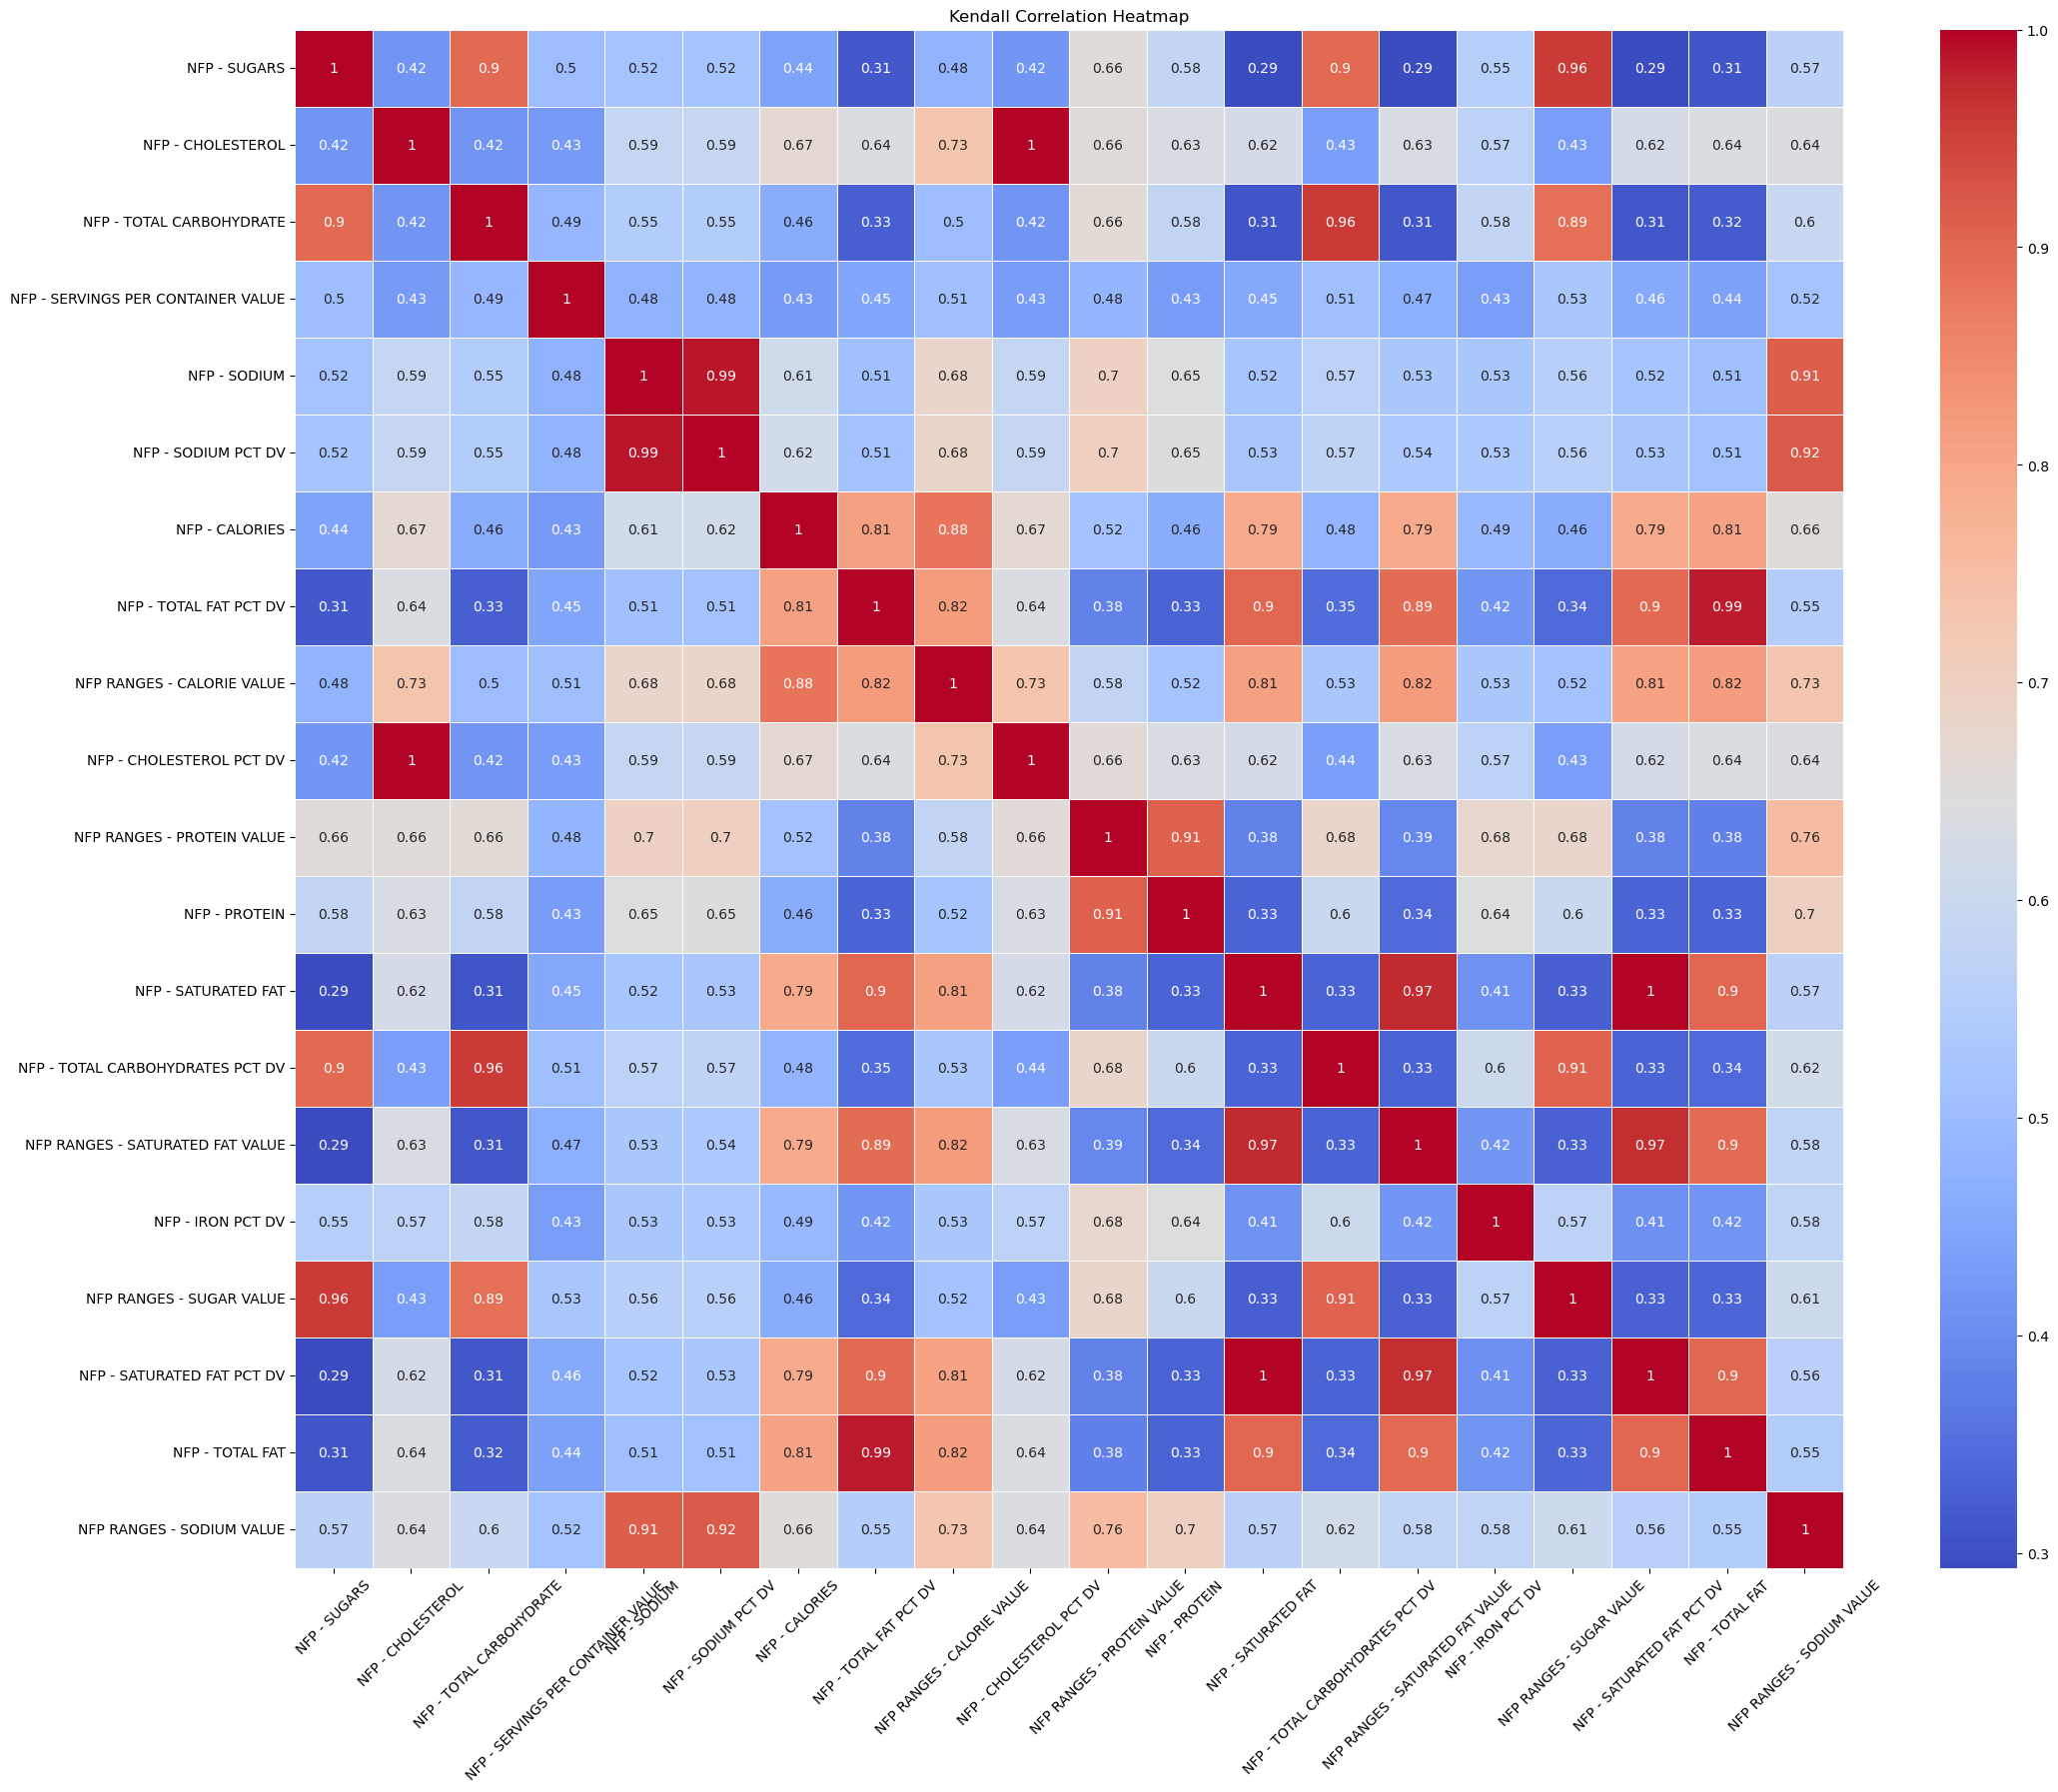

In [246]:
# Calculate the Spearman correlation between two columns
correlation_matrix_NFP = X_NFP.corr(method='kendall')

import seaborn as sns
# Create a heatmap
plt.figure(figsize=(25, 20))  # Set the size of the heatmap
sns.heatmap(correlation_matrix_NFP, annot=True, cmap='coolwarm', linewidths=.5)

# Customize the heatmap (optional)
plt.title('Kendall Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [247]:
unique_correlated_pairs_NFP = create_unique_correlated_pairs(correlation_matrix_NFP)
unique_correlated_pairs_NFP

[('NFP - TOTAL FAT PCT DV', 'NFP - SATURATED FAT'),
 ('NFP RANGES - SUGAR VALUE', 'NFP - TOTAL CARBOHYDRATES PCT DV'),
 ('NFP - TOTAL FAT PCT DV', 'NFP - TOTAL FAT'),
 ('NFP - SATURATED FAT', 'NFP - SATURATED FAT PCT DV'),
 ('NFP - SODIUM PCT DV', 'NFP - SODIUM'),
 ('NFP - TOTAL FAT PCT DV', 'NFP - SATURATED FAT PCT DV'),
 ('NFP - CHOLESTEROL', 'NFP - CHOLESTEROL PCT DV'),
 ('NFP RANGES - SATURATED FAT VALUE', 'NFP - SATURATED FAT PCT DV'),
 ('NFP - TOTAL CARBOHYDRATE', 'NFP - TOTAL CARBOHYDRATES PCT DV'),
 ('NFP - TOTAL FAT', 'NFP - SATURATED FAT PCT DV'),
 ('NFP RANGES - PROTEIN VALUE', 'NFP - PROTEIN'),
 ('NFP RANGES - SATURATED FAT VALUE', 'NFP - SATURATED FAT'),
 ('NFP - SATURATED FAT', 'NFP - TOTAL FAT'),
 ('NFP - SUGARS', 'NFP RANGES - SUGAR VALUE'),
 ('NFP RANGES - SODIUM VALUE', 'NFP - SODIUM'),
 ('NFP - SODIUM PCT DV', 'NFP RANGES - SODIUM VALUE')]

In [248]:
count_negative_ones = X_NFP.apply(lambda col: (col == -1).sum())

In [249]:
# Drop the columns with more missing values

col_to_drop_NFP = []
for pair in unique_correlated_pairs_NFP:
    first = pair[0]
    second = pair[1]
    missing1=count_negative_ones.loc[first]
    missing2=count_negative_ones.loc[second]
    if missing2>missing1 and second not in col_to_drop_NFP:
        col_to_drop_NFP.append(second)
    elif missing1>missing2 and first not in col_to_drop_NFP:
        col_to_drop_NFP.append(first)
    elif missing1==missing2 and (first or second) not in col_to_drop_NFP:
        if len(first)>=len(second):
            col_to_drop_NFP.append(first)
        else: 
            col_to_drop_NFP.append(second)
    else:
        continue 
col_to_drop_NFP

['NFP - SATURATED FAT',
 'NFP RANGES - SUGAR VALUE',
 'NFP - TOTAL FAT PCT DV',
 'NFP - SODIUM PCT DV',
 'NFP - SATURATED FAT PCT DV',
 'NFP - CHOLESTEROL PCT DV',
 'NFP RANGES - SATURATED FAT VALUE',
 'NFP - TOTAL CARBOHYDRATES PCT DV',
 'NFP RANGES - PROTEIN VALUE',
 'NFP RANGES - SUGAR VALUE',
 'NFP RANGES - SODIUM VALUE']

In [250]:
#drop columns that are correlated 
col_to_drop.append(col_to_drop_NFP)

In [251]:
col_to_keep_NFP = list(set(non_zero_NFP)-set(col_to_drop_NFP))

In [252]:
col_to_keep_NFP

['NFP - SUGARS',
 'NFP - CHOLESTEROL',
 'NFP - IRON PCT DV',
 'NFP - TOTAL CARBOHYDRATE',
 'NFP - SERVINGS PER CONTAINER VALUE',
 'NFP - SODIUM',
 'NFP - CALORIES',
 'NFP - TOTAL FAT',
 'NFP RANGES - CALORIE VALUE',
 'NFP - PROTEIN']

#### Step2: Categorize NFP values into categorical values

In [ ]:
create_hist(X3[col_to_keep_NFP])

In [253]:
X3[col_to_keep_NFP].describe()

NFP - SUGARS  NFP - CHOLESTEROL  NFP - IRON PCT DV  \
count  46159.000000       46159.000000       46159.000000   
mean       1.675955          17.783477           2.884825   
std        3.127329          16.372940           4.285228   
min       -1.000000          -1.000000          -1.000000   
25%       -1.000000          -1.000000          -1.000000   
50%        0.000000          20.000000           2.000000   
75%        4.000000          30.000000           6.000000   
max       18.000000         135.000000          60.000000   

       NFP - TOTAL CARBOHYDRATE  NFP - SERVINGS PER CONTAINER VALUE  \
count              46159.000000                        46159.000000   
mean                   2.465246                            2.572566   
std                    3.729123                            4.584474   
min                   -1.000000                           -1.000000   
25%                   -1.000000                           -1.000000   
50%                    1.000000                            1.000000   
75%                    5.000000                            3.000000   
max                   27.000000                          240.000000   

       NFP - SODIUM  NFP - CALORIES  NFP - TOTAL FAT  \
count  46159.000000    46159.000000     46159.000000   
mean     324.709981       70.367577         3.222981   
std      268.804738       59.263058         5.022698   
min       -1.000000       -1.000000        -1.000000   
25%       -1.000000       -1.000000        -1.000000   
50%      370.000000       80.000000         1.000000   
75%      500.000000      100.000000         6.000000   
max     1540.000000      300.000000        25.000000   

       NFP RANGES - CALORIE VALUE  NFP - PROTEIN  
count                46159.000000   46159.000000  
mean                    45.792630       6.265506  
std                     46.989695       5.809044  
min                     -1.000000      -1.000000  
25%                     -1.000000      -1.000000  
50%                     40.000000       7.000000  
75%                     40.000000      10.000000  
max                    200.000000      36.000000

In [254]:
NFP_cat = []
bins_copy = dict()
for i in col_to_keep_NFP:

    mini = min(X3[i])
    Q1 = np.nanquantile(X3[X3[i]>0][i],0.2)
    Q2 = np.nanquantile(X3[X3[i]>0][i],0.4)
    Q3 = np.nanquantile(X3[X3[i]>0][i],0.6)
    Q4 = np.nanquantile(X3[X3[i]>0][i],0.8)
    maxi = max(X3[i])
    new_name = i+" Category"
    
#     if Q1==Q2:
#         bin_edges = [float('-inf'), Q1, float('inf')]
#         labels=['cat1', 'cat2']
#     elif Q2==Q3:
#         bin_edges = [float('-inf'), Q1, Q2, float('inf')]
#         labels=['cat1', 'cat2', 'cat3']
#     elif Q3==Q4:
#         bin_edges = [float('-inf'), Q1, Q2, Q3,float('inf')]
#     else: 
    bin_edges = [float('-inf'), 0, Q1, Q2, Q3, Q4, float('inf')]
    bins_copy[i] = bin_edges
    X3[new_name] = pd.cut(X3[i], bins=bin_edges,duplicates='drop')
    NFP_cat.append(new_name)
    #X4.drop()

In [255]:
bins_copy

{'NFP - SUGARS': [-inf, 0, 1.0, 3.0, 5.0, 6.0, inf],
 'NFP - CHOLESTEROL': [-inf, 0, 20.0, 25.0, 30.0, 30.0, inf],
 'NFP - IRON PCT DV': [-inf, 0, 4.0, 4.0, 6.0, 6.0, inf],
 'NFP - TOTAL CARBOHYDRATE': [-inf, 0, 1.0, 3.0, 5.0, 7.0, inf],
 'NFP - SERVINGS PER CONTAINER VALUE': [-inf, 0, 1.0, 2.0, 3.0, 7.0, inf],
 'NFP - SODIUM': [-inf, 0, 320.0, 410.0, 480.0, 580.0, inf],
 'NFP - CALORIES': [-inf, 0, 70.0, 80.0, 100.0, 130.0, inf],
 'NFP - TOTAL FAT': [-inf, 0, 1.0, 2.0, 5.0, 10.0, inf],
 'NFP RANGES - CALORIE VALUE': [-inf, 0, 40.0, 40.0, 40.0, 100.0, inf],
 'NFP - PROTEIN': [-inf, 0, 6.0, 8.0, 10.0, 11.0, inf]}

In [256]:
X3[NFP_cat].info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 1 to 105156
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   NFP - SUGARS Category                        46159 non-null  category
 1   NFP - CHOLESTEROL Category                   46159 non-null  category
 2   NFP - IRON PCT DV Category                   46159 non-null  category
 3   NFP - TOTAL CARBOHYDRATE Category            46159 non-null  category
 4   NFP - SERVINGS PER CONTAINER VALUE Category  46159 non-null  category
 5   NFP - SODIUM Category                        46159 non-null  category
 6   NFP - CALORIES Category                      46159 non-null  category
 7   NFP - TOTAL FAT Category                     46159 non-null  category
 8   NFP RANGES - CALORIE VALUE Category          46159 non-null  category
 9   NFP - PROTEIN Category                       46159 non-null  cate

In [283]:
# for i in NFP_cat:
#     if 'UNKNOWN' not in X4[i].cat.categories:
#             X4[i]=X4[i].cat.add_categories('UNKNOWN')
            

In [284]:
# X4[NFP_cat] = X4[NFP_cat].fillna('UNKNOWN')

In [257]:
for i in NFP_cat:
    print(f'{i}{X3[i].unique()}')

NFP - SUGARS Category[(0.0, 1.0], (5.0, 6.0], (-inf, 0.0], (3.0, 5.0], (6.0, inf], (1.0, 3.0]]
Categories (6, interval[float64, right]): [(-inf, 0.0] < (0.0, 1.0] < (1.0, 3.0] < (3.0, 5.0] < (5.0, 6.0] < (6.0, inf]]
NFP - CHOLESTEROL Category[(25.0, 30.0], (0.0, 20.0], (-inf, 0.0], (20.0, 25.0], (30.0, inf]]
Categories (5, interval[float64, right]): [(-inf, 0.0] < (0.0, 20.0] < (20.0, 25.0] < (25.0, 30.0] < (30.0, inf]]
NFP - IRON PCT DV Category[(0.0, 4.0], (-inf, 0.0], (4.0, 6.0], (6.0, inf]]
Categories (4, interval[float64, right]): [(-inf, 0.0] < (0.0, 4.0] < (4.0, 6.0] < (6.0, inf]]
NFP - TOTAL CARBOHYDRATE Category[(0.0, 1.0], (5.0, 7.0], (-inf, 0.0], (3.0, 5.0], (7.0, inf], (1.0, 3.0]]
Categories (6, interval[float64, right]): [(-inf, 0.0] < (0.0, 1.0] < (1.0, 3.0] < (3.0, 5.0] < (5.0, 7.0] < (7.0, inf]]
NFP - SERVINGS PER CONTAINER VALUE Category[(1.0, 2.0], (2.0, 3.0], (-inf, 0.0], (3.0, 7.0], (0.0, 1.0], (7.0, inf]]
Categories (6, interval[float64, right]): [(-inf, 0.0] < (0.

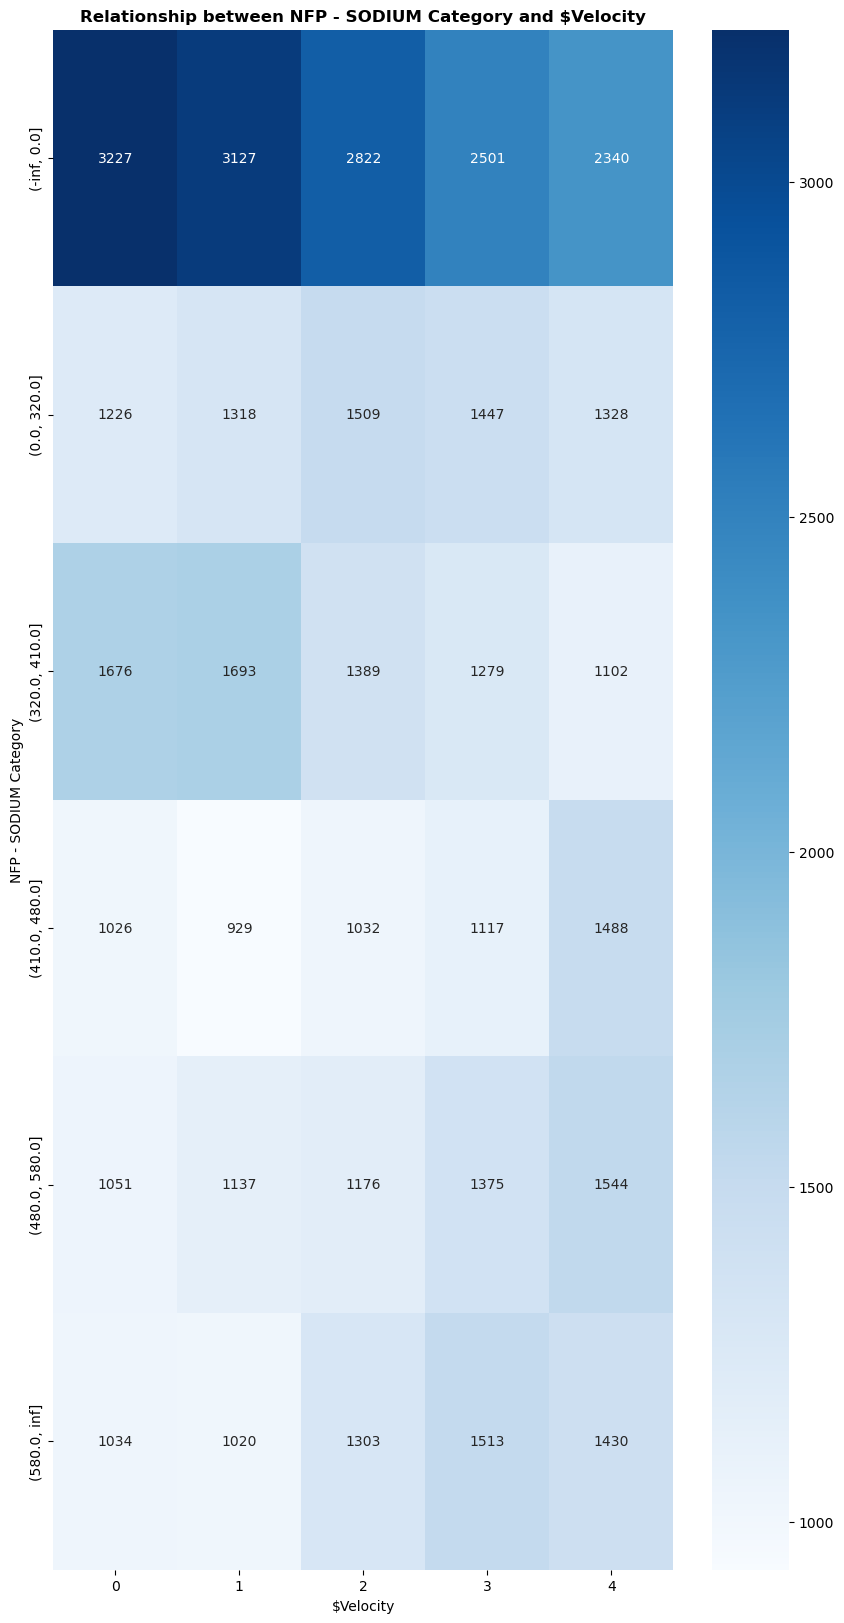

In [258]:
Heatmap_crosstab(X3,'NFP - SODIUM Category',y_cat)

In [287]:
#X4[NFP_cat] = X4[NFP_cat].astype(str)

In [259]:
len(NFP_cat)==len(col_to_keep_NFP)

True

In [260]:
NFP_cat

['NFP - SUGARS Category',
 'NFP - CHOLESTEROL Category',
 'NFP - IRON PCT DV Category',
 'NFP - TOTAL CARBOHYDRATE Category',
 'NFP - SERVINGS PER CONTAINER VALUE Category',
 'NFP - SODIUM Category',
 'NFP - CALORIES Category',
 'NFP - TOTAL FAT Category',
 'NFP RANGES - CALORIE VALUE Category',
 'NFP - PROTEIN Category']

In [261]:
col_to_keep_NFP

['NFP - SUGARS',
 'NFP - CHOLESTEROL',
 'NFP - IRON PCT DV',
 'NFP - TOTAL CARBOHYDRATE',
 'NFP - SERVINGS PER CONTAINER VALUE',
 'NFP - SODIUM',
 'NFP - CALORIES',
 'NFP - TOTAL FAT',
 'NFP RANGES - CALORIE VALUE',
 'NFP - PROTEIN']

In [262]:
# If using numeric then drop col_to_drop_cat,  if using cat for NFP then drop col_to_drop_num
col_to_drop_num = col_to_drop+[col_to_keep_NFP]
col_to_drop_cat = col_to_drop+[NFP_cat]

## Check others

In [263]:
#Method 1:
X4=X3.copy()
#Method 2:
#X3=X5.copy()

In [264]:
X4.columns

Index(['Subcategory', 'Brand', 'ANIMAL TYPE', 'BRAND POSITION',
       'CERTIFIED NON-GMO PROJECT VERIFIED',
       'CERTIFIED PALEO FOUNDATION - KETO',
       'CERTIFIED PALEO FOUNDATION - PALEO',
       'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
       'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
       'CERTIFIED PLANT BASED FOODS ASSOCIATION',
       ...
       'NFP - SUGARS Category', 'NFP - CHOLESTEROL Category',
       'NFP - IRON PCT DV Category', 'NFP - TOTAL CARBOHYDRATE Category',
       'NFP - SERVINGS PER CONTAINER VALUE Category', 'NFP - SODIUM Category',
       'NFP - CALORIES Category', 'NFP - TOTAL FAT Category',
       'NFP RANGES - CALORIE VALUE Category', 'NFP - PROTEIN Category'],
      dtype='object', length=181)

In [265]:
X4.shape

(46159, 181)

2) Unit of Measure

In [275]:
X4['SIZE'] = X4['SIZE'].astype('float')

In [266]:
#only 9 has unit of 'count'
X4['UNIT OF MEASURE'].describe()

count     46159
unique        2
top       OUNCE
freq      45833
Name: UNIT OF MEASURE, dtype: object

In [267]:
X4['UNIT OF MEASURE'].unique()

array(['OUNCE', 'COUNT'], dtype=object)

In [268]:
X4[X4['UNIT OF MEASURE']=='COUNT']['SIZE'].unique()

array(['1.0', '24.0', '5.0', '8.0', '15.0'], dtype=object)

In [276]:
X4['SIZE'].describe()

count    46159.000000
mean         4.077353
std          4.266289
min          0.070000
25%          1.800000
50%          2.850000
75%          5.000000
max        160.000000
Name: SIZE, dtype: float64

(array([2.3000e+03, 9.8720e+03, 1.3336e+04, 5.6760e+03, 3.1820e+03,
        1.7660e+03, 1.5480e+03, 1.6120e+03, 1.9640e+03, 2.3800e+02,
        2.2270e+03, 7.8000e+01, 5.0200e+02, 3.8000e+01, 4.4600e+02,
        5.6900e+02, 2.7600e+02, 1.9000e+01, 6.7000e+01, 8.0000e+00,
        1.0000e+02, 0.0000e+00, 1.0000e+01, 6.0000e+00, 1.3400e+02,
        0.0000e+00, 2.6000e+01, 2.4000e+01, 3.2000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.5000e+01, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.2000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

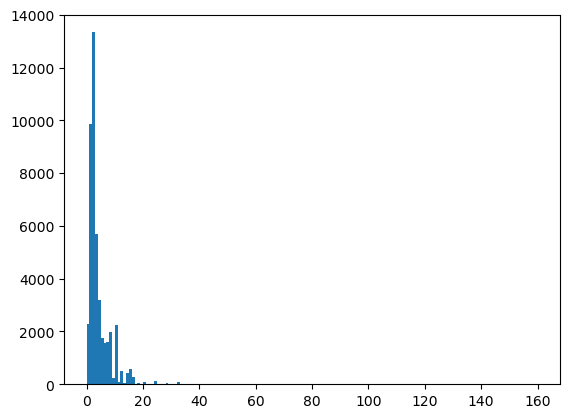

In [277]:
#data_plot = X4[(X4['SIZE']<40)]['SIZE']
data_plot = X4['SIZE']
bins = np.arange(0, max(data_plot) + 1, 1)
plt.hist(x=data_plot,bins=bins)

In [278]:
counter = pd.DataFrame(X4[X4['UNIT OF MEASURE']=='OUNCE']['SIZE'].value_counts())
counter[counter['count']>5].sort_values(by='count',ascending=False)

count
SIZE        
1.00    4420
3.00    3686
2.50    3319
2.00    3030
4.00    2839
...      ...
6.70       7
0.98       7
18.00      7
8.75       6
6.16       6

[111 rows x 1 columns]

In [279]:
np.sort(X4[X4['UNIT OF MEASURE']=='OUNCE']['SIZE'].unique())

array([7.000e-02, 1.000e-01, 2.500e-01, 2.800e-01, 3.200e-01, 4.000e-01,
       4.400e-01, 5.000e-01, 6.800e-01, 7.000e-01, 7.500e-01, 8.000e-01,
       8.400e-01, 8.500e-01, 8.700e-01, 9.000e-01, 9.200e-01, 9.400e-01,
       9.700e-01, 9.800e-01, 1.000e+00, 1.100e+00, 1.120e+00, 1.150e+00,
       1.200e+00, 1.250e+00, 1.280e+00, 1.300e+00, 1.350e+00, 1.400e+00,
       1.440e+00, 1.500e+00, 1.580e+00, 1.600e+00, 1.700e+00, 1.750e+00,
       1.760e+00, 1.800e+00, 1.840e+00, 1.900e+00, 1.940e+00, 2.000e+00,
       2.100e+00, 2.120e+00, 2.200e+00, 2.250e+00, 2.300e+00, 2.400e+00,
       2.470e+00, 2.500e+00, 2.600e+00, 2.650e+00, 2.700e+00, 2.750e+00,
       2.800e+00, 2.850e+00, 3.000e+00, 3.130e+00, 3.150e+00, 3.200e+00,
       3.250e+00, 3.500e+00, 3.650e+00, 3.750e+00, 3.920e+00, 4.000e+00,
       4.100e+00, 4.150e+00, 4.200e+00, 4.250e+00, 4.400e+00, 4.500e+00,
       4.600e+00, 4.800e+00, 5.000e+00, 5.200e+00, 5.300e+00, 5.500e+00,
       5.600e+00, 5.750e+00, 5.820e+00, 5.850e+00, 

In [280]:
og_data.loc[X4[X4['UNIT OF MEASURE']=='COUNT'].index][['Description','SIZE']]

Description  SIZE
392                       No Mans Land Hot Beef Jerky   1.0
653                     Johnsons Smokehouse Trail Mix   1.0
684                       Stoneridge Honey Bbq Sticks   1.0
1120       Maneas Meats Old Fashion Meat Sticks 24 Ct  24.0
1732                      No Mans Land Hot Beef Jerky   1.0
...                                               ...   ...
104289  1st Phorm Seasoned Bbq Protein Meat Stck 2 Oz  15.0
104349  1st Phorm Jalapeno Heat Prtein Meat Stck 2 Oz   1.0
104810      Stoneridge Jalapeno & Cheddar Stick Combo   1.0
104862                    No Mans Land Hot Beef Jerky   1.0
105149  Cloverdale Tangy Snackers Summer Sausage Stix   1.0

[326 rows x 2 columns]

In [302]:
# Chomps
# 1.15oz - 1ct = 1.15oz
# 0.5oz - 6ct = 3oz
# 1.15oz - 6ct = 6.9oz
# 1.15oz - 8ct = 9.2oz
# 1.15oz - 10ct = 11.5oz
# 0.5oz - 24ct = 12oz
# 1.15oz - 12ct = 13.8oz
# 1.15oz - 24ct = 27.6oz

In [281]:
count_size = list(X4[X4['UNIT OF MEASURE']=='COUNT']['SIZE'].unique())

In [282]:
count_size

[1.0, 24.0, 5.0, 8.0, 15.0]

In [283]:
for i in count_size:
    count_ind = X4[(X4['UNIT OF MEASURE']=='COUNT')&(X4['SIZE']==i)].index
    X4.loc[count_ind, 'SIZE'] = i*1.15

In [303]:
# First replace count with oz size 
# Replace 1 count with 1oz; 15ct with 30oz

# count15_ind = X4[(X4['UNIT OF MEASURE']=='COUNT')&(X4['SIZE']==15)].index
# X4.loc[count15_ind, 'SIZE'] = 30

# count8_ind = X4[(X4['UNIT OF MEASURE']=='COUNT')&(X4['SIZE']==8)].index
# X4.loc[count8_ind, 'SIZE'] = 16

In [284]:
X4[X4['UNIT OF MEASURE']=='COUNT']['SIZE'].unique()

array([ 1.15, 27.6 ,  5.75,  9.2 , 17.25])

In [285]:
X4[X4['UNIT OF MEASURE']=='OUNCE']['SIZE'].describe()

count    45833.000000
mean         4.095881
std          4.270839
min          0.070000
25%          1.900000
50%          2.850000
75%          5.000000
max        160.000000
Name: SIZE, dtype: float64

In [750]:
min_size = min(X4['SIZE'])

0.07

In [751]:
max_size = max(X4['SIZE'])

160.0

In [771]:
def size_eng(df):
    s0 = min(df['SIZE'])
    s1 = 2 #singles
    s2 = 3 #5/6pt or bag 
    s3 = 7 #larger bag 
    s4 = 12 #bulk size
    s5 = 20 #muti packs 
    s6 = max(df['SIZE']) #muti packs
    sizes = [s0,s1,s2,s3,s4,s5,s6]
    labels=[str((sizes[i-1]+sizes[i])/2)+'oz' for i in range(1,len(sizes))]
    df['SIZE Category'] = pd.cut(df['SIZE'], bins=[float('-inf'), s1, s2, s3, s4, s5, float('inf')])
    return df

In [773]:
X4[X4['SIZE Category'].isnull()]['SIZE']

Series([], Name: SIZE, dtype: float64)

In [772]:
X4 = size_eng(X4)

In [774]:
X4['SIZE Category'].unique()

[(2.0, 3.0], (3.0, 7.0], (12.0, 20.0], (-inf, 2.0], (7.0, 12.0], (20.0, inf]]
Categories (6, interval[float64, right]): [(-inf, 2.0] < (2.0, 3.0] < (3.0, 7.0] < (7.0, 12.0] < (12.0, 20.0] < (20.0, inf]]

In [289]:
# If using numeric then drop col_to_drop_cat,  if using cat for NFP then drop col_to_drop_num

col_to_drop_num.append(['SIZE'])
col_to_drop_cat.append(['SIZE Category'])

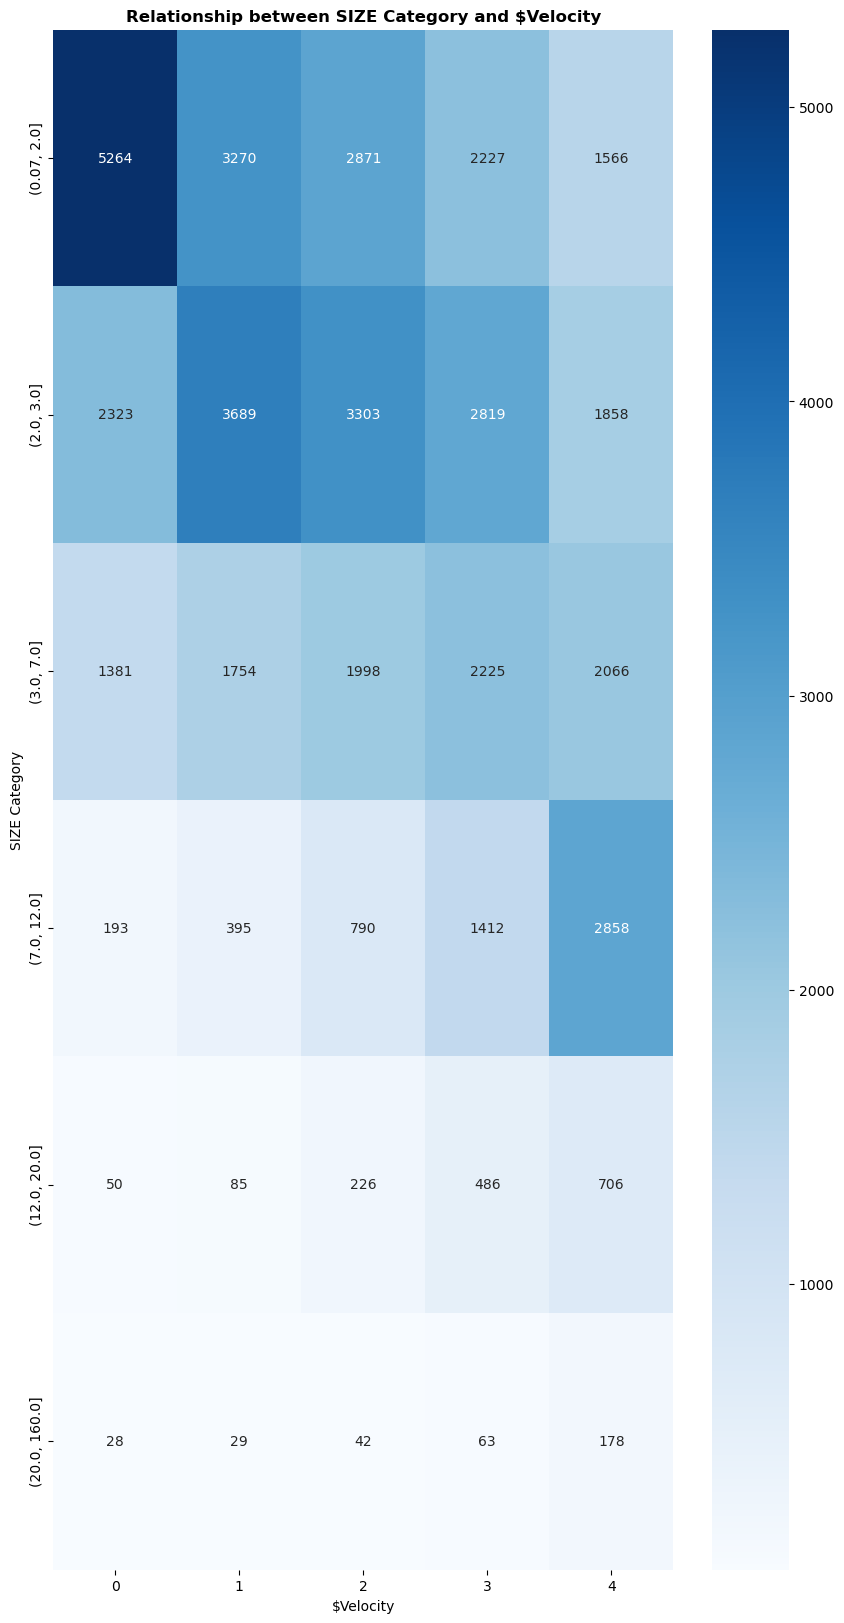

In [290]:
Heatmap_crosstab(X4,'SIZE Category',y_cat)

In [291]:

col_to_drop_num.append(['UNIT OF MEASURE'])
col_to_drop_cat.append(['UNIT OF MEASURE'])

### Final: Drop above columns

In [292]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 1 to 105156
Columns: 182 entries, Subcategory to SIZE Category
dtypes: category(11), float64(21), object(150)
memory usage: 62.1+ MB


In [293]:
X4[X4.columns].select_dtypes(include=['number']).columns

Index(['NFP - CALORIES', 'NFP - CHOLESTEROL', 'NFP - CHOLESTEROL PCT DV',
       'NFP - IRON PCT DV', 'NFP - PROTEIN', 'NFP - SATURATED FAT',
       'NFP - SATURATED FAT PCT DV', 'NFP - SERVINGS PER CONTAINER VALUE',
       'NFP - SODIUM', 'NFP - SODIUM PCT DV', 'NFP - SUGARS',
       'NFP - TOTAL CARBOHYDRATE', 'NFP - TOTAL CARBOHYDRATES PCT DV',
       'NFP - TOTAL FAT', 'NFP - TOTAL FAT PCT DV',
       'NFP RANGES - CALORIE VALUE', 'NFP RANGES - PROTEIN VALUE',
       'NFP RANGES - SATURATED FAT VALUE', 'NFP RANGES - SODIUM VALUE',
       'NFP RANGES - SUGAR VALUE', 'SIZE'],
      dtype='object')

In [294]:
flattened_col_to_drop_num = [item for sublist in col_to_drop_num for item in sublist]
flattened_col_to_drop_num

['CERTIFIED NON-GMO PROJECT VERIFIED',
 'CERTIFIED PALEO FOUNDATION - KETO',
 'CERTIFIED PALEO FOUNDATION - PALEO',
 'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
 'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
 'CERTIFIED PLANT BASED FOODS ASSOCIATION',
 'DIET - PLANT BASED DIET',
 'DIET - VEGAN DIET',
 'DIET - VEGETARIAN DIET',
 'DIET - PESCATARIAN DIET',
 'INGREDIENT - WHOLE BEET',
 'INGREDIENT - SODIUM METABISULFITE',
 'INGREDIENT - WHOLE BLUEBERRY',
 'INGREDIENT - STEVIA',
 'INGREDIENT - ALMOND',
 'INGREDIENT - HEMP SEED',
 'INGREDIENT - COLOR YELLOW NO 5',
 'INGREDIENT - COLLAGEN',
 'INGREDIENT - WHOLE PEA',
 'INGREDIENT - COCOA',
 'INGREDIENT - BLACKSTRAP MOLASSES',
 'INGREDIENT - EGG ALLERGEN',
 'INGREDIENT - MONKFRUIT',
 'INGREDIENT - POPPY SEED',
 'INGREDIENT - WHOLE BANANA',
 'INGREDIENT - PEANUT ALLERGEN',
 'INGREDIENT - WHOLE SWEET POTATO',
 'INGREDIENT - COLOR BLUE NO 1',
 'INGREDIENT - ACACIA FIBER',
 'INGREDIENT - SUCRALOSE',
 'INGREDIENT - ARTIFICIAL SWEETENERS',
 'INGRE

In [295]:
flattened_col_to_drop_cat = [item for sublist in col_to_drop_cat for item in sublist]
flattened_col_to_drop_cat

['CERTIFIED NON-GMO PROJECT VERIFIED',
 'CERTIFIED PALEO FOUNDATION - KETO',
 'CERTIFIED PALEO FOUNDATION - PALEO',
 'CERTIFIED PALEO FOUNDATION - PALEO FRIENDLY',
 'CERTIFIED PALEO FOUNDATION - PALEO VEGAN',
 'CERTIFIED PLANT BASED FOODS ASSOCIATION',
 'DIET - PLANT BASED DIET',
 'DIET - VEGAN DIET',
 'DIET - VEGETARIAN DIET',
 'DIET - PESCATARIAN DIET',
 'INGREDIENT - WHOLE BEET',
 'INGREDIENT - SODIUM METABISULFITE',
 'INGREDIENT - WHOLE BLUEBERRY',
 'INGREDIENT - STEVIA',
 'INGREDIENT - ALMOND',
 'INGREDIENT - HEMP SEED',
 'INGREDIENT - COLOR YELLOW NO 5',
 'INGREDIENT - COLLAGEN',
 'INGREDIENT - WHOLE PEA',
 'INGREDIENT - COCOA',
 'INGREDIENT - BLACKSTRAP MOLASSES',
 'INGREDIENT - EGG ALLERGEN',
 'INGREDIENT - MONKFRUIT',
 'INGREDIENT - POPPY SEED',
 'INGREDIENT - WHOLE BANANA',
 'INGREDIENT - PEANUT ALLERGEN',
 'INGREDIENT - WHOLE SWEET POTATO',
 'INGREDIENT - COLOR BLUE NO 1',
 'INGREDIENT - ACACIA FIBER',
 'INGREDIENT - SUCRALOSE',
 'INGREDIENT - ARTIFICIAL SWEETENERS',
 'INGRE

In [296]:
len(flattened_col_to_drop_cat)

132

In [297]:
len(flattened_col_to_drop_num)

132

In [775]:
X5_cat = X4.copy()
X5_num = X4.copy()

In [299]:
X4.shape

(46159, 182)

In [776]:
X5_cat.drop(flattened_col_to_drop_num,axis=1,inplace=True)

In [301]:
X5_cat.shape

(46159, 51)

In [777]:
X5_num.drop(flattened_col_to_drop_cat,axis=1,inplace=True)

In [303]:
X5_num.shape

(46159, 51)

## Using X5_cat

In [778]:
categorize(X5_cat.columns)

{'Subcategory': ['Subcategory'],
 'Brand': ['Brand'],
 'ANIMAL': ['ANIMAL TYPE'],
 'BRAND': ['BRAND POSITION'],
 'DIET': ['DIET - FODMAP DIET',
  'DIET - KETO DIET',
  'DIET - KETO HIGH FAT',
  'DIET - PALEO DIET',
  'DIET - WHOLE 30 FRIENDLY',
  'DIET - VEGAN/VEGETARIAN/PESCATARIAN'],
 'EATING': ['EATING OCCASION'],
 'FAIR': ['FAIR TRADE'],
 'FLAVOR': ['FLAVOR'],
 'FUNCTIONAL': ['FUNCTIONAL INGREDIENT'],
 'INGREDIENT': ['INGREDIENT - ANIMAL-DERIVED',
  'INGREDIENT - BEEF AND DERIVATIVES',
  'INGREDIENT - CELERY',
  'INGREDIENT - CEREAL GRAIN',
  'INGREDIENT - CORN',
  'INGREDIENT - CORN SYRUP',
  'INGREDIENT - FLAVORINGS',
  'INGREDIENT - GELATIN',
  'INGREDIENT - GLUTEN',
  'INGREDIENT - GRAIN',
  'INGREDIENT - MAJOR 9 ALLERGEN FREE',
  'INGREDIENT - NATURAL SWEETENERS',
  'INGREDIENT - NIGHTSHADES',
  'INGREDIENT - PORK AND DERIVATIVES',
  'INGREDIENT - RICE',
  'INGREDIENT - SOY ALLERGEN',
  'INGREDIENT - VITAL CLEAN',
  'INGREDIENT - YEAST'],
 'INTERNATIONAL': ['INTERNATIONAL'],
 

In [305]:
X5_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 1 to 105156
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Subcategory                                  46159 non-null  object  
 1   Brand                                        46159 non-null  object  
 2   ANIMAL TYPE                                  46159 non-null  object  
 3   BRAND POSITION                               46159 non-null  object  
 4   DIET - FODMAP DIET                           46159 non-null  object  
 5   DIET - KETO DIET                             46159 non-null  object  
 6   DIET - KETO HIGH FAT                         46159 non-null  object  
 7   DIET - PALEO DIET                            46159 non-null  object  
 8   DIET - WHOLE 30 FRIENDLY                     46159 non-null  object  
 9   EATING OCCASION                              46159 non-null  obje

In [779]:
eng_atrribute_cat = X5_cat.columns

In [307]:
eng_atrribute_cat

Index(['Subcategory', 'Brand', 'ANIMAL TYPE', 'BRAND POSITION',
       'DIET - FODMAP DIET', 'DIET - KETO DIET', 'DIET - KETO HIGH FAT',
       'DIET - PALEO DIET', 'DIET - WHOLE 30 FRIENDLY', 'EATING OCCASION',
       'FAIR TRADE', 'FLAVOR', 'FUNCTIONAL INGREDIENT',
       'INGREDIENT - ANIMAL-DERIVED', 'INGREDIENT - BEEF AND DERIVATIVES',
       'INGREDIENT - CELERY', 'INGREDIENT - CEREAL GRAIN', 'INGREDIENT - CORN',
       'INGREDIENT - CORN SYRUP', 'INGREDIENT - FLAVORINGS',
       'INGREDIENT - GELATIN', 'INGREDIENT - GLUTEN', 'INGREDIENT - GRAIN',
       'INGREDIENT - MAJOR 9 ALLERGEN FREE', 'INGREDIENT - NATURAL SWEETENERS',
       'INGREDIENT - NIGHTSHADES', 'INGREDIENT - PORK AND DERIVATIVES',
       'INGREDIENT - RICE', 'INGREDIENT - SOY ALLERGEN',
       'INGREDIENT - VITAL CLEAN', 'INGREDIENT - YEAST', 'INTERNATIONAL',
       'LABELED GRASS FED', 'LABELED NITRATE FREE', 'PALEO',
       'POSITIONING GROUP', 'PRODUCT TYPE', 'RAW', 'STORAGE',
       'DIET - VEGAN/VEGETARIAN/PE

In [780]:
#col that contain categorical values
obj_col = X5_cat[eng_atrribute_cat].select_dtypes(include=['object']).columns
#col that contain numerical values
num_col = X5_cat[eng_atrribute_cat].select_dtypes(include=['number']).columns

In [309]:
num_col

Index([], dtype='object')

In [310]:
association_matrix_all = mutual_info_matrix(obj_col,X5_cat)

In [311]:
create_unique_correlated_pairs(association_matrix_all)

[('DIET - VEGAN/VEGETARIAN/PESCATARIAN', 'INGREDIENT - ANIMAL-DERIVED')]

In [314]:
# decreasing correlation threshold to 0.85
association_matrix_all = pd.DataFrame(index=obj_col, columns=obj_col)
for col1 in obj_col:
    for col2 in obj_col:
        association_matrix_all.loc[col1, col2] = normalized_mutual_info_score(X5_cat[col1], X5_cat[col2])
        
        
highly_correlated = (association_matrix_all > 0.85) & (association_matrix_all < 1.0)
correlated_pairs = []

# Get the pairs of correlated columns
for col in highly_correlated.columns:
    correlated_columns = highly_correlated[col][highly_correlated[col]].index.tolist()
    for correlated_col in correlated_columns:
        if correlated_col != col:
            correlated_pairs.append((col, correlated_col))
            
            
# Create a set of frozensets to store unique pairs
unique_pairs = set()

# Iterate through the list and add unique pairs to the set
for tup in correlated_pairs:
    unique_pairs.add(frozenset(tup))
unique_correlated_pairs = [tuple(pair) for pair in unique_pairs]
unique_correlated_pairs

[('INGREDIENT - MAJOR 9 ALLERGEN FREE', 'INGREDIENT - SOY ALLERGEN'),
 ('DIET - WHOLE 30 FRIENDLY', 'INGREDIENT - NATURAL SWEETENERS'),
 ('DIET - VEGAN/VEGETARIAN/PESCATARIAN', 'INGREDIENT - ANIMAL-DERIVED'),
 ('DIET - WHOLE 30 FRIENDLY', 'DIET - PALEO DIET')]

In [315]:
all_N = Unknown_N_per(X5_cat,eng_atrribute_cat).set_index('Column Name')

In [316]:
# Drop the columns with more missing values
columns_to_drop = []
for pair in unique_correlated_pairs:
    first = pair[0]
    second = pair[1]
    missing1=all_N.loc[first]['N/Unknown Percentage']
    missing2=all_N.loc[second]['N/Unknown Percentage']
    if missing2>missing1 and second not in columns_to_drop:
        columns_to_drop.append(second)
    elif missing1>missing2 and first not in columns_to_drop:
        columns_to_drop.append(first)
    elif missing1==missing2 and (first or second) not in columns_to_drop:
        if len(first)>=len(second):
            columns_to_drop.append(first)
        else: 
            columns_to_drop.append(second)
    else:
        continue 
columns_to_drop

['INGREDIENT - SOY ALLERGEN',
 'DIET - WHOLE 30 FRIENDLY',
 'DIET - VEGAN/VEGETARIAN/PESCATARIAN',
 'DIET - PALEO DIET']

In [781]:
columns_to_drop

['INGREDIENT - SOY ALLERGEN',
 'DIET - WHOLE 30 FRIENDLY',
 'DIET - VEGAN/VEGETARIAN/PESCATARIAN',
 'DIET - PALEO DIET']

In [782]:
X5_cat.drop(columns_to_drop,axis=1,inplace=True)

In [783]:
X5_num.drop(columns_to_drop,axis=1,inplace=True)

In [784]:
# Check if index are the sane between X and y
((X5_cat.index==y_cat.index)==False).sum()

0

In [785]:
((X5_num.index==y_cat.index)==False).sum()

0

In [786]:
eng_atrribute_cat=X5_cat.columns

In [787]:
eng_atrribute_num=X5_num.columns

In [788]:
#col that contain categorical values
obj_col = X5_num[eng_atrribute_num].select_dtypes(include=['object']).columns
#col that contain numerical values
num_col = X5_num[eng_atrribute_num].select_dtypes(include=['number']).columns

In [789]:
X5_cat.shape

(46159, 47)

In [790]:
X5_num.shape

(46159, 47)

In [326]:
num_col

Index(['NFP - CALORIES', 'NFP - CHOLESTEROL', 'NFP - IRON PCT DV',
       'NFP - PROTEIN', 'NFP - SERVINGS PER CONTAINER VALUE', 'NFP - SODIUM',
       'NFP - SUGARS', 'NFP - TOTAL CARBOHYDRATE', 'NFP - TOTAL FAT',
       'NFP RANGES - CALORIE VALUE', 'SIZE'],
      dtype='object')

In [495]:
# X5_cat.drop('EATING OCCASION',axis=1,inplace=True)
# X5_num.drop('EATING OCCASION',axis=1,inplace=True)

## Check Graph

In [327]:
len(eng_atrribute_cat)

47

In [328]:
col_cat = categorize(eng_atrribute_cat)

In [329]:
col_cat.keys()

dict_keys(['Subcategory', 'Brand', 'ANIMAL', 'BRAND', 'DIET', 'EATING', 'FAIR', 'FLAVOR', 'FUNCTIONAL', 'INGREDIENT', 'INTERNATIONAL', 'LABELED', 'PALEO', 'POSITIONING', 'PRODUCT', 'RAW', 'STORAGE', 'NFP', 'SIZE'])

In [330]:
lst = dict()
for j in col_cat:
    val = col_cat.get(j)
    for i in val:
        v = X5_cat[i].unique()
        key = i
        if key in lst:
            lst[key].append(v)

        else: 
            lst[key]= [v]
lst

{'Subcategory': [array(['SS JERKY', 'SS MEAT SNACKS OTHER', 'SS PLANT BASED MEAT SNACKS'],
        dtype=object)],
 'Brand': [array(['OBERTO', 'DEARBORN', 'DIETZ & WATSON', 'IOWA SMOKEHOUSE',
         'PEARSON RANCH', 'TILLAMOOK COUNTRY SMOKER', 'BRIDGFORD',
         'VERMONT SMOKE & CURE', 'EPIC', 'OLD WISCONSIN', 'JACK LINKS',
         'COUNTRY ARCHER', 'ELLYS', 'AUFSCHNITT', 'DAKOTA PURE BISON',
         'OLD TRAPPER', 'TAYLORS SAUSAGE', 'CATTLEMANS CUT',
         'MIGHTY SPARK FOOD CO', 'THE NEW PRIMAL',
         'R-C RANCH TEXAS CRAFT MEATS', 'THINK JERKY',
         'WYOMING GOURMET BEEF', 'DARTAGNAN', 'BEYOND MEAT', 'CHEFS CUT',
         'STAFFORDS', 'DUKES MEATS', 'UP NORTH SPECIALTY MEATS',
         'STOLTZFUS', 'GOLDEN FLAKE', 'MATADOR BY JACK LINKS',
         'BAVARIAN MEAT PRODUCTS', 'RIGHTEOUS FELON', 'MINGUA BROTHERS',
         'HERO JERKY', 'SWEETWOOD SMOKEHOUSE', 'EAT THE CHANGE',
         'KALAHARI BILTONG', 'OSTRIM', 'SLIM JIM', 'PRIMAL',
         'AMISH COUNTRY SNACKS

In [528]:
example_attributes = pd.DataFrame({
    'Subcategory':['SS MEAT SNACKS OTHER', 'SS JERKY', 'SS PLANT BASED MEAT SNACKS'],
    'Brand':['OLD WISCONSIN', 'JACK LINKS', 'SLIM JIM'],
    'ANIMAL TYPE':['MEAT - CHICKEN', 'MEAT - BEEF','PLANT BASED - BEEF'],
    'BRAND POSITION':['SPECIALTY GOURMET', 'CONVENTIONAL','SPECIALTY NATURAL'],
    'DIET':['DIET - FODMAP DIET' ,'DIET - KETO DIET','PALEO/WHOLE 30 FRIENDLY'],
    'FLAVOR':['PLAIN/UNFLAVORED', 'CHILI','PIZZA'],
    'SIZE':['(0.07, 2.0]',"(2.0, 3.0]",'(3.0, 7.0]'],
    'INGREDIENT':['ANIMAL-DERIVED', 'CEREAL GRAIN','GLUTEN'],
    'LABEL':['LABELED ANTIBIOTIC FREE','LABELED GRASS FED','LABELED NO ADDED HORMONES'],
    'INTERNATIONAL':['EUROPE - ITALY','UNITED STATES - AMISH / PENNSYLVANIA DUTCH','ASIA - CHINA'],
    'PRODUCT TYPE':['SS MEAT SNACK - BAR', 'SS MEAT SNACK - JERKY','SS MEAT SNACK - STICK'],
    'STORAGE':['SHELF STABLE', 'UNKNOWN', 'REFRIGERATED'],
    'NFP Value':['TOTAL CARBOHYDRATE','CHOLESTEROL','PROTEIN']
})

In [522]:
# pip install dataframe_image

In [530]:
import dataframe_image as dfi
export_df=example_attributes[['Brand','ANIMAL TYPE','DIET','FLAVOR','SIZE','INGREDIENT','LABEL','NFP Value']]
df_styled = export_df.style.background_gradient()
df_styled


In [531]:
dfi.export(df_styled,"example.png")

In [791]:
high_sample_col=[]
for i in X5_cat.columns:
    num_value = len(X5_cat[i].unique())
    sample_size = list(X5_cat[i].value_counts())
    counter=0
    for j in sample_size:
        if j>20:
            counter+=1
        else:
            continue
    if counter>(num_value/2):
        high_sample_col.append(i)

In [792]:
#high_sample_col_num = [item.rstrip(' Category') for item in high_sample_col]
high_sample_col_num = [item.rstrip(' Category') if not item.endswith('Subcategory') else item for item in high_sample_col]

In [793]:
high_sample_col.append('Brand')
high_sample_col_num.append('Brand')

In [794]:
X5_cat_highsample = X5_cat[high_sample_col]
X5_num_highsample = X5_num[high_sample_col_num]

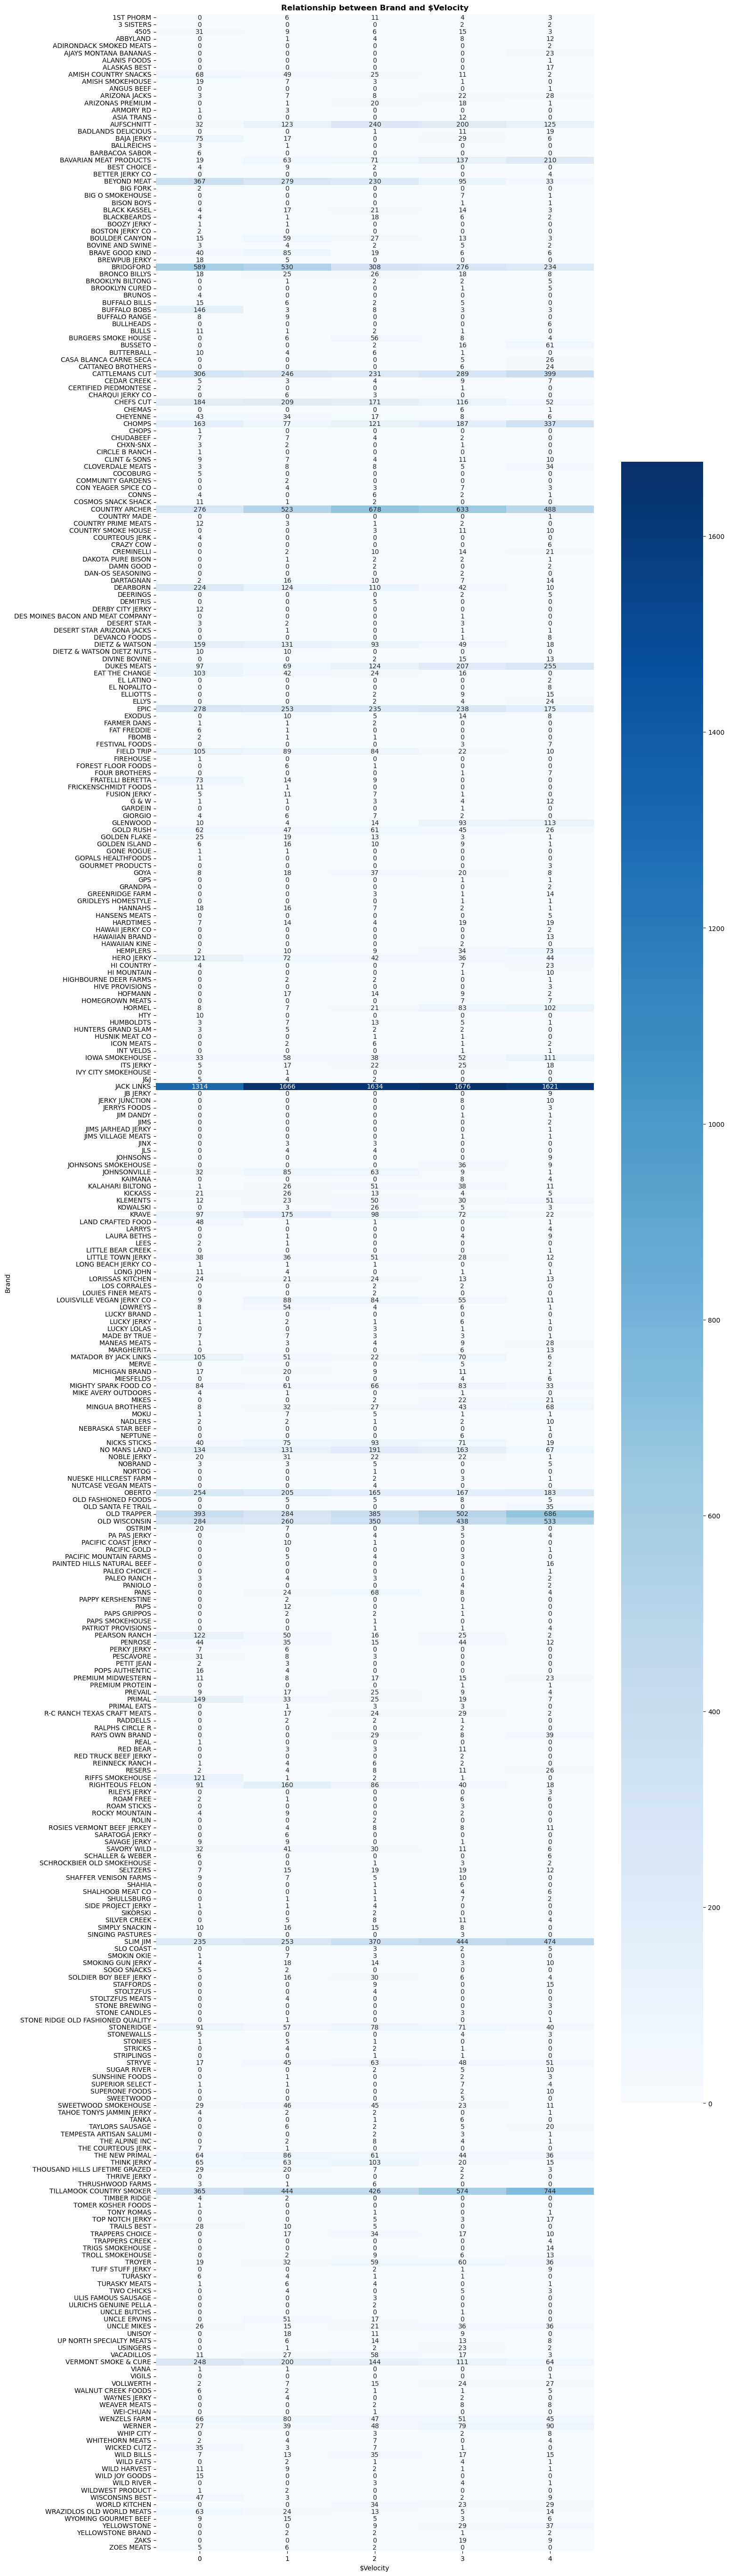

In [339]:
Heatmap_crosstab(X5_cat,'Brand',y_cat,size=(15,70))

In [1299]:
X5_cat_highsample.drop('NFP - SERVINGS PER CONTAINER VALUE Category',axis=1,inplace=True)
X5_num_highsample.drop('NFP - SERVINGS PER CONTAINER VALUE',axis=1,inplace=True)

C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\358518780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5_cat_highsample.drop('NFP - SERVINGS PER CONTAINER VALUE Category',axis=1,inplace=True)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\358518780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5_num_highsample.drop('NFP - SERVINGS PER CONTAINER VALUE',axis=1,inplace=True)


In [1300]:
#col that contain categorical values
eng_atrribute_num = X5_num_highsample.columns
eng_atrribute_cat = X5_cat_highsample.columns
obj_col = X5_num_highsample[eng_atrribute_num].select_dtypes(include=['object']).columns
#col that contain numerical values
num_col = X5_num_highsample[eng_atrribute_num].select_dtypes(include=['number']).columns

In [1301]:
sum(X5_num_highsample["Brand"].isnull())

0

In [1302]:
eng_atrribute_cat

Index(['Subcategory', 'ANIMAL TYPE', 'BRAND POSITION', 'DIET - FODMAP DIET',
       'DIET - KETO DIET', 'DIET - KETO HIGH FAT', 'FAIR TRADE', 'FLAVOR',
       'FUNCTIONAL INGREDIENT', 'INGREDIENT - ANIMAL-DERIVED',
       'INGREDIENT - BEEF AND DERIVATIVES', 'INGREDIENT - CELERY',
       'INGREDIENT - CEREAL GRAIN', 'INGREDIENT - CORN',
       'INGREDIENT - CORN SYRUP', 'INGREDIENT - FLAVORINGS',
       'INGREDIENT - GELATIN', 'INGREDIENT - GLUTEN', 'INGREDIENT - GRAIN',
       'INGREDIENT - MAJOR 9 ALLERGEN FREE', 'INGREDIENT - NATURAL SWEETENERS',
       'INGREDIENT - NIGHTSHADES', 'INGREDIENT - PORK AND DERIVATIVES',
       'INGREDIENT - RICE', 'INGREDIENT - VITAL CLEAN', 'INGREDIENT - YEAST',
       'INTERNATIONAL', 'LABELED GRASS FED', 'LABELED NITRATE FREE', 'PALEO',
       'POSITIONING GROUP', 'PRODUCT TYPE', 'RAW', 'STORAGE',
       'NFP - SUGARS Category', 'NFP - CHOLESTEROL Category',
       'NFP - IRON PCT DV Category', 'NFP - TOTAL CARBOHYDRATE Category',
       'NFP - SODI

In [797]:
X5_num_highsample['SIZE'].corr(X5_num_highsample['NFP - SERVINGS PER CONTAINER VALUE'])

0.42016914340577316

# Cleaning on testing data

In [798]:
atrribute_select_test = eng_atrribute_num.copy()

In [400]:
all_col = filters+ list(atrribute_select_test) +Attr


In [552]:
test_select = test_og_data[all_col].copy()

In [553]:
test_select.loc[:,obj_col] = test_select[obj_col].fillna("UNKNOWN")
test_select.loc[:,obj_col] = test_select[obj_col].astype('str')

In [554]:
def filetr_data(df):
    
    private_df = df[df['Brand'].str.startswith('PRIVATE LABEL')]
    private_brands = list(private_df['Brand'].unique())
    df2 = df[~df['Brand'].isin(private_brands)]


    Channel= 'CONVENTIONAL|FOOD' #'Channel/Outlet'
    Geography= 'RMA' # 'Geography Level'
    ACV_Threshold = 0.5 # 'Max % ACV'


    # Filter on 
    df3 = df2[(df2['Channel/Outlet']==Channel)
                            &(df2['Geography Level']==Geography)
                            &(df2['Max % ACV']>ACV_Threshold)]

    return df3


In [555]:
test_select_filter = filetr_data(test_select)

In [556]:
test_select_filter['Channel/Outlet'].unique()

array(['CONVENTIONAL|FOOD'], dtype=object)

In [557]:
test_select_filter['Geography Level'].unique()

array(['RMA'], dtype=object)

In [558]:
num_col

Index(['NFP - SUGARS', 'NFP - CHOLESTEROL', 'NFP - IRON PCT DV',
       'NFP - TOTAL CARBOHYDRATE', 'NFP - SERVINGS PER CONTAINER VALUE',
       'NFP - SODIUM', 'NFP - CALORIES', 'NFP - TOTAL FAT',
       'NFP RANGES - CALORIE VALUE', 'NFP - PROTEIN', 'SIZE'],
      dtype='object')

In [559]:
test_attr = prodcut_Att(test_select_filter.columns)
test_cat = categorize(test_attr)

In [560]:
NFP_test = test_cat.get('NFP')
labeled_test =  test_cat.get('LABELED')

In [561]:
# Label, PALEO, RAW, FUNCTIONAL need re-naming 
re_name_key = ['RAW','FAIR','FUNCTIONAL','PALEO','LABELED']

def clean_name(df):    
    # Certified columns
#     df[certified] = df[certified].applymap(lambda x: 'Y' if str(x).startswith('CERTIFIED') else 
#                      ('N' if str(x).startswith('NOT CERTIFIED')
#                       else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
#                            else str(x))))
    
    df.loc[:,labeled_test] = df[labeled_test].applymap(lambda x: 'Y' if str(x).startswith('LABELED') else 
                     ('N' if str(x).startswith('NOT LABELED')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))))
                                       
    df.loc[:,'PALEO']=df['PALEO'].map(lambda x: 'Y' if str(x).startswith('PALEO') else 
                     ('N' if str(x).startswith('NOT PALEO')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))))
                                       
    df.loc[:,'FUNCTIONAL INGREDIENT']=df['FUNCTIONAL INGREDIENT'].map(
    lambda x: "UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).startswith('UNKNOWN'))
                           else str(x))
    
    df.loc[:,'RAW']=df['RAW'].map(lambda x: 'Y' if str(x).startswith('RAW POSITIONED') else 
                     ('N' if str(x).startswith('NOT')
                      else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).endswith('UNKNOWN'))
                           else str(x))))

    df.loc[:,'FAIR TRADE']=df['FAIR TRADE'].map(lambda x: 'Y' if str(x).startswith('FAIR-TRADE CLAIM') else 
                 ('N' if str(x).startswith('NOT')
                  else ("UNKNOWN" if (str(x).startswith('SUBCATEGORY NOT CODED')) or (str(x).endswith('UNKNOWN'))
                       else str(x))))
    return df

In [562]:
test_select1 = clean_name(test_select_filter)

In [584]:
def data_eng_NFP(df):
    df[NFP_test] = df[NFP_test].astype('str')
    df[NFP_test] = df[NFP_test].applymap(extract_numeric) 
    df[NFP_test] = df[NFP_test].fillna(-1)
    
    
    cat_name = []
    for column in NFP_test:
        new_name = column+" Category"
        cat_name.append(new_name)
        bin_edges = bins_copy.get(column)
        df[new_name] = pd.cut(df[column], bins=bin_edges,duplicates='drop')
    return (df,cat_name)
  

In [585]:
test_select2 = data_eng_NFP(test_select1)[0]

In [586]:
NFP_cat = data_eng_NFP(test_select1)[1]

In [587]:
test_select2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51194 entries, 3232 to 108329
Data columns (total 89 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Channel/Outlet                               51194 non-null  object  
 1   Geography Level                              51194 non-null  object  
 2   Geography                                    51194 non-null  object  
 3   Time Period                                  51194 non-null  object  
 4   Time Period End Date                         51194 non-null  object  
 5   Product Universe                             51194 non-null  object  
 6   Product Level                                51194 non-null  object  
 7   UPC                                          51194 non-null  object  
 8   Subcategory                                  51194 non-null  object  
 9   ANIMAL TYPE                                  51194 non-null  o

In [749]:
test_select3[test_select3['SIZE Category'].isnull()][['SIZE',"SIZE Category"]]

SIZE SIZE Category
35765  0.07           NaN
43376  0.07           NaN
59746  0.07           NaN
69909  0.07           NaN
92006  0.07           NaN

In [799]:
test_select3 = size_eng(test_select2)

In [800]:
X5_cat['SIZE Category'].unique()

[(2.0, 3.0], (3.0, 7.0], (12.0, 20.0], (-inf, 2.0], (7.0, 12.0], (20.0, inf]]
Categories (6, interval[float64, right]): [(-inf, 2.0] < (2.0, 3.0] < (3.0, 7.0] < (7.0, 12.0] < (12.0, 20.0] < (20.0, inf]]

In [801]:
test_select3['SIZE Category'].unique()

[(-inf, 2.0], (7.0, 12.0], (3.0, 7.0], (2.0, 3.0], (12.0, 20.0], (20.0, inf]]
Categories (6, interval[float64, right]): [(-inf, 2.0] < (2.0, 3.0] < (3.0, 7.0] < (7.0, 12.0] < (12.0, 20.0] < (20.0, inf]]

In [802]:
test_select3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51194 entries, 3232 to 108329
Data columns (total 89 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Channel/Outlet                               51194 non-null  object  
 1   Geography Level                              51194 non-null  object  
 2   Geography                                    51194 non-null  object  
 3   Time Period                                  51194 non-null  object  
 4   Time Period End Date                         51194 non-null  object  
 5   Product Universe                             51194 non-null  object  
 6   Product Level                                51194 non-null  object  
 7   UPC                                          51194 non-null  object  
 8   Subcategory                                  51194 non-null  object  
 9   ANIMAL TYPE                                  51194 non-null  o

In [ ]:
def create_target_var(df,sws="Dollars Velocity"):
    df['Week Store Selling']=df['# of Stores Selling']*df['Number of Weeks Selling']
    # Dollars Velocity 
    df["Dollars Velocity"] = df["Dollars"]/(df['Week Store Selling'])

    df['ACV Week Store Selling']=df['# of Stores']*df['Max % ACV']*df['Number of Weeks Selling']/100
    df['ACV Dollars Velocity']=df["Dollars"]/(df['ACV Week Store Selling'])
    
    
    df['$Velocity'] = pd.cut(df[sws], bins=bins_y, labels=[0,1,2,3,4])
 
    return df

In [1413]:
def create_target_var2(df,sws="Dollars Velocity"):
    df['Week Store Selling']=df['# of Stores Selling']*df['Number of Weeks Selling']
    # Dollars Velocity 
    df["Dollars Velocity"] = df["Dollars"]/(df['Week Store Selling'])

    df['ACV Week Store Selling']=df['# of Stores']*df['Max % ACV']*df['Number of Weeks Selling']/100
    df['ACV Dollars Velocity']=df["Dollars"]/(df['ACV Week Store Selling'])
    
    y = df[sws]
    Q1 = np.percentile(y, 20)
    Q2 = np.percentile(y, 40)
    Q3 = np.percentile(y, 60)
    Q4 = np.percentile(y, 80)
    bins_y_new= [float('-inf'), Q1,Q2,Q3,Q4, float('inf')]
    
    df['$Velocity'] = pd.cut(df[sws], bins=bins_y_new, labels=[0,1,2,3,4])
 
    return df

In [1414]:
test_select4 = create_target_var(test_select3,sws="Dollars Velocity")

In [1416]:
test_select5 = test_select4.copy()

In [1417]:
test_select5.drop(filters,axis=1,inplace=True)
test_select5.drop(Attr,axis=1,inplace=True)
test_select5.drop(['Week Store Selling','ACV Week Store Selling'],axis=1,inplace=True)

In [1418]:
test_select5.columns

Index(['Subcategory', 'ANIMAL TYPE', 'BRAND POSITION', 'DIET - FODMAP DIET',
       'DIET - KETO DIET', 'DIET - KETO HIGH FAT', 'FAIR TRADE', 'FLAVOR',
       'FUNCTIONAL INGREDIENT', 'INGREDIENT - ANIMAL-DERIVED',
       'INGREDIENT - BEEF AND DERIVATIVES', 'INGREDIENT - CELERY',
       'INGREDIENT - CEREAL GRAIN', 'INGREDIENT - CORN',
       'INGREDIENT - CORN SYRUP', 'INGREDIENT - FLAVORINGS',
       'INGREDIENT - GELATIN', 'INGREDIENT - GLUTEN', 'INGREDIENT - GRAIN',
       'INGREDIENT - MAJOR 9 ALLERGEN FREE', 'INGREDIENT - NATURAL SWEETENERS',
       'INGREDIENT - NIGHTSHADES', 'INGREDIENT - PORK AND DERIVATIVES',
       'INGREDIENT - RICE', 'INGREDIENT - VITAL CLEAN', 'INGREDIENT - YEAST',
       'INTERNATIONAL', 'LABELED GRASS FED', 'LABELED NITRATE FREE', 'PALEO',
       'POSITIONING GROUP', 'PRODUCT TYPE', 'RAW', 'STORAGE', 'NFP - SUGARS',
       'NFP - CHOLESTEROL', 'NFP - IRON PCT DV', 'NFP - TOTAL CARBOHYDRATE',
       'NFP - SERVINGS PER CONTAINER VALUE', 'NFP - SODIUM', 

In [1419]:
test_select_cat = test_select5.drop(NFP_test+['SIZE'],axis=1)
test_select_num = test_select5.drop(NFP_cat+['SIZE Category'],axis=1)

In [1425]:
X_testing_cat = test_select_cat.drop(['Dollars Velocity','$Velocity','ACV Dollars Velocity'],axis=1)
X_testing_num = test_select_num.drop(['Dollars Velocity','$Velocity','ACV Dollars Velocity'],axis=1)

y_testing_cat = test_select_cat['$Velocity']
y_testing_num = test_select_cat['Dollars Velocity']

In [1426]:
X_testing_cat.drop(['NFP - SERVINGS PER CONTAINER VALUE Category'],axis=1,inplace=True)
X_testing_num.drop(['NFP - SERVINGS PER CONTAINER VALUE'],axis=1,inplace=True)

In [1427]:
select_atrribute_num = prodcut_Att(X_testing_num.columns)
obj_col_test = X_testing_num[select_atrribute_num].select_dtypes(include=['object']).columns
#col that contain numerical values
num_col_test = X_testing_num[select_atrribute_num].select_dtypes(include=['number']).columns

In [1428]:
select_atrribute_cat = prodcut_Att(X_testing_cat.columns)

In [1429]:
X_testing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51194 entries, 3232 to 108329
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Subcategory                          51194 non-null  object  
 1   ANIMAL TYPE                          51194 non-null  object  
 2   BRAND POSITION                       51194 non-null  object  
 3   DIET - FODMAP DIET                   51194 non-null  object  
 4   DIET - KETO DIET                     51194 non-null  object  
 5   DIET - KETO HIGH FAT                 51194 non-null  object  
 6   FAIR TRADE                           51194 non-null  object  
 7   FLAVOR                               51194 non-null  object  
 8   FUNCTIONAL INGREDIENT                51194 non-null  object  
 9   INGREDIENT - ANIMAL-DERIVED          51194 non-null  object  
 10  INGREDIENT - BEEF AND DERIVATIVES    51194 non-null  object  
 11  INGREDIENT - CEL

## Sping test and train 

In [597]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import pandas as pd


In [1331]:
X5_num_highsample.shape

(46159, 45)

In [1332]:
y_fit.shape

(46159,)

In [1333]:
X5_cat_highsample.shape

(46159, 45)

In [812]:
y_fit = y_cat.astype('int')
y_testing_cat = y_testing_cat.astype('int')

In [813]:
test_size=0.2

In [1430]:
# numerical is still numerical, y is categorical
X_train, X_test,y_train,y_test = train_test_split(X5_num_highsample,y_fit,test_size=test_size, random_state=42)

In [1431]:
print(f'X_train shape{X_train.shape}, y_train shape is{y_train.shape}, X_test shape{X_test.shape}, y_test.shape{y_test.shape}')

X_train shape(36927, 45), y_train shape is(36927,), X_test shape(9232, 45), y_test.shape(9232,)


In [1432]:
# numerical is still numericall, y is numeical
X_train_num, X_test_num,y_train_num,y_test_num = train_test_split(X5_num_highsample,y_num,test_size=test_size, random_state=42)

In [1433]:
# X is all categorical, y is categorical
X_train_cat, X_test_cat,y_train_cat,y_test_cat = train_test_split(X5_cat_highsample,y_fit,test_size=test_size, random_state=42)

In [1434]:
X_train_cat = X_train_cat.astype('str')
X_test_cat = X_test_cat.astype('str')

In [1435]:
y_train_num.info()

<class 'pandas.core.series.Series'>
Index: 36927 entries, 15833 to 35862
Series name: Dollars Velocity
Non-Null Count  Dtype  
--------------  -----  
36927 non-null  float64
dtypes: float64(1)
memory usage: 577.0 KB


In [599]:
# X_train, X_test,y_train,y_test = X5_num_highsample,X_testing_num,y_fit,y_testing_cat

In [600]:
# print(f'X_train shape{X_train.shape}, y_train shape is{y_train.shape}, X_test shape{X_test.shape}, y_test.shape{y_test.shape}')

X_train shape(46159, 46), y_train shape is(46159,), X_test shape(51194, 46), y_test.shape(51194,)


## Comparing Encoding Methods and Models

In [828]:
# Identify categorical and numerical features
categorical_features = obj_col
numerical_features = num_col

In [946]:
# Define classification models
models_class = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=0)),
    ('SVM', SVC(random_state=42)),
    ('Gradient',GradientBoostingClassifier())
]


# Define encoding methods
encoding_methods = [
    ('Ordinal Encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('One-Hot Encoding', OneHotEncoder(handle_unknown='ignore')),
    ("Target Encoding", TargetEncoder(target_type="continuous"))]

In [947]:
# Fitting on X containing numerical and categorical, y is categorical 


# Evaluate models with different encoding methods
results = []


for model_name, model in models_class:
    for encoding_name, categorical_transformer in encoding_methods:
        
        preprocessor = ColumnTransformer(transformers=[
        ('no','passthrough',numerical_features),
        ('cat', categorical_transformer, categorical_features)])
        
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        # Cross-validate the pipeline
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=8,n_jobs=-1, scoring='accuracy')
        mean_cv_score = cv_scores.mean()
        std_cv_score = cv_scores.std()
        
        #Fit the pipeline on the entire training set
        pipeline.fit(X_train, y_train)
        Train_accuracy = pipeline.score(X_train, y_train)
        
        # Evaluate on the test set
        test_predictions = pipeline.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)

        results.append({
            'Model': model_name,
            'Encoding': encoding_name,
            'Train Accuracy':Train_accuracy,
            'CV Accuracy': mean_cv_score,
            'CV Standard Deviation':std_cv_score,
            'Test Accuracy': test_accuracy
        })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


C:\Users\LorraineLin\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


            Model          Encoding  Train Accuracy  CV Accuracy  \
0   Decision Tree  Ordinal Encoding        0.539984     0.494083   
1   Decision Tree  One-Hot Encoding        0.539984     0.493839   
2   Decision Tree   Target Encoding        0.490237     0.455737   
3   Random Forest  Ordinal Encoding        0.539957     0.495112   
4   Random Forest  One-Hot Encoding        0.539957     0.494977   
5   Random Forest   Target Encoding        0.525117     0.486148   
6             SVM  Ordinal Encoding        0.303220     0.295123   
7             SVM  One-Hot Encoding        0.289734     0.286105   
8             SVM   Target Encoding        0.287649     0.285482   
9        Gradient  Ordinal Encoding        0.445880     0.429117   
10       Gradient  One-Hot Encoding        0.441736     0.428467   
11       Gradient   Target Encoding        0.451160     0.434939   

    CV Standard Deviation  Test Accuracy  
0                0.007249       0.488843  
1                0.007643    

In [954]:
results_df

Model          Encoding  Train Accuracy  CV Accuracy  \
0   Decision Tree  Ordinal Encoding        0.539984     0.494083   
1   Decision Tree  One-Hot Encoding        0.539984     0.493839   
2   Decision Tree   Target Encoding        0.490237     0.455737   
3   Random Forest  Ordinal Encoding        0.539957     0.495112   
4   Random Forest  One-Hot Encoding        0.539957     0.494977   
5   Random Forest   Target Encoding        0.525117     0.486148   
6             SVM  Ordinal Encoding        0.303220     0.295123   
7             SVM  One-Hot Encoding        0.289734     0.286105   
8             SVM   Target Encoding        0.287649     0.285482   
9        Gradient  Ordinal Encoding        0.445880     0.429117   
10       Gradient  One-Hot Encoding        0.441736     0.428467   
11       Gradient   Target Encoding        0.451160     0.434939   

    CV Standard Deviation  Test Accuracy  
0                0.007249       0.488843  
1                0.007643       0.489385  
2                0.007411       0.455806  
3                0.006987       0.489601  
4                0.007591       0.489168  
5                0.009641       0.480394  
6                0.006250       0.300368  
7                0.004728       0.283579  
8                0.004178       0.282821  
9                0.004736       0.425152  
10               0.004121       0.427751  
11               0.006306       0.433059

In [955]:
dfi.export(results_df,"model comparison.png")

In [ ]:
# Fitting on X containing only categorical, y is categorical 

# Evaluate models with different encoding methods
# results_cat = []


# for model_name, model in models_class:
#     for encoding_name, categorical_transformer in encoding_methods:
        
#         preprocessor = ColumnTransformer(transformers=[
#         ('cat', categorical_transformer, eng_atrribute_cat)])
        
#         pipeline = Pipeline([
#             ('preprocessor', preprocessor),
#             ('classifier', model)
#         ])

#         # Cross-validate the pipeline
#         cv_scores = cross_val_score(pipeline, X_train_cat, y_train_cat, cv=8,n_jobs=-1, scoring='accuracy')
#         mean_cv_score = cv_scores.mean()
#         std_cv_score = cv_scores.std()
        

#         # Fit the pipeline on the entire training set
#         pipeline.fit(X_train_cat, y_train_cat)
#         Train_accuracy = pipeline.score(X_train_cat, y_train_cat)

#         # Evaluate on the test set
#         test_predictions = pipeline.predict(X_test_cat)
#         test_accuracy = accuracy_score(y_test_cat, test_predictions)

#         results_cat.append({
#             'Model': model_name,
#             'Encoding': encoding_name,
#             'Train Accuracy':Train_accuracy,
#             'CV Accuracy': mean_cv_score,
#             'CV Standard Deviation':std_cv_score,
#             'Test Accuracy': test_accuracy
#         })

# # Display the results
# results_df_cat = pd.DataFrame(results_cat)
# print(results_df_cat)


In [ ]:
# models_regr = [
#     ('Linear Regression', LinearRegression()),
#     ('Random Forest', RandomForestRegressor(random_state=0)),
#     ('Gradient',GradientBoostingRegressor(random_state=0))
# ]

In [ ]:
# # Evaluate models with different encoding methods
# results_cat = []


# for model_name, model in models_regr:
#     for encoding_name, categorical_transformer in encoding_methods:
        
#         preprocessor = ColumnTransformer(transformers=[
#         ('no','passthrough',numerical_features),
#         ('cat', categorical_transformer, categorical_features)])
        
#         pipeline = Pipeline([
#             ('preprocessor', preprocessor),
#             ('Regressor', model)
#         ])

#         # Cross-validate the pipeline
#         cv_scores = cross_val_score(pipeline, X_train_num, y_train_num, cv=10,n_jobs=-1, 
#                                     scoring='neg_root_mean_squared_error')
#         mean_cv_score = -cv_scores.mean()
#         std_cv_score = cv_scores.std()
        
#         # Fit the pipeline on the entire training set
#         pipeline.fit(X_train_num, y_train_num)
#         Train_accuracy = pipeline.score(X_train_num, y_train_num)
#         # Evaluate on the test set
#         test_predictions = pipeline.predict(X_test_num)
#         test_accuracy = np.sqrt(mean_squared_error(y_test_num, test_predictions))

#         results_cat.append({
#             'Model': model_name,
#             'Encoding': encoding_name,
#             'Train Accuracy':Train_accuracy,
#             'CV Accuracy': mean_cv_score,
#             'CV Standard Deviation':std_cv_score,
#             'Test Accuracy': test_accuracy
#         })

# # Display the results
# results_df_cat = pd.DataFrame(results_cat)
# print(results_df_cat)

# One-Hot Encoding 

In [1312]:
def OneHotEncoding(X_to_encode,X_test_to_encode):
    encoder = OneHotEncoder(sparse=False, max_categories=50,handle_unknown='ignore')  # 'sparse=False' returns a dense array, 'drop' parameter drops the first category

    # Fit and transform the encoder on the categorical column
    encoded_data = encoder.fit_transform(X_to_encode)
    test_data = encoder.transform(X_test_to_encode)
    
    categories = encoder.get_feature_names_out()
    X_train_encoded  = pd.DataFrame(encoded_data, columns=categories)
    original_index = X_to_encode.index
    X_train_encoded.index = original_index
    
    X_test_encoded  = pd.DataFrame(test_data, columns=categories)
    original_test_index = X_test_to_encode.index
    X_test_encoded.index = original_test_index
    
    # Drop columns with UNKNOWN
    col_unknwon = list(X_train_encoded.filter(regex='UNKNOWN$', axis=1).columns)
    X_train_encoded.drop(col_unknwon,axis=1,inplace=True)
    X_test_encoded.drop(col_unknwon,axis=1,inplace=True)

    return (X_train_encoded,X_test_encoded)

In [1313]:
X_encode = X_train[obj_col]
X_numerical = X_train[num_col]

X_test_en = X_test[obj_col]
X_test_num = X_test[num_col]

In [1334]:
obj_col

Index(['Subcategory', 'ANIMAL TYPE', 'BRAND POSITION', 'DIET - FODMAP DIET',
       'DIET - KETO DIET', 'DIET - KETO HIGH FAT', 'FAIR TRADE', 'FLAVOR',
       'FUNCTIONAL INGREDIENT', 'INGREDIENT - ANIMAL-DERIVED',
       'INGREDIENT - BEEF AND DERIVATIVES', 'INGREDIENT - CELERY',
       'INGREDIENT - CEREAL GRAIN', 'INGREDIENT - CORN',
       'INGREDIENT - CORN SYRUP', 'INGREDIENT - FLAVORINGS',
       'INGREDIENT - GELATIN', 'INGREDIENT - GLUTEN', 'INGREDIENT - GRAIN',
       'INGREDIENT - MAJOR 9 ALLERGEN FREE', 'INGREDIENT - NATURAL SWEETENERS',
       'INGREDIENT - NIGHTSHADES', 'INGREDIENT - PORK AND DERIVATIVES',
       'INGREDIENT - RICE', 'INGREDIENT - VITAL CLEAN', 'INGREDIENT - YEAST',
       'INTERNATIONAL', 'LABELED GRASS FED', 'LABELED NITRATE FREE', 'PALEO',
       'POSITIONING GROUP', 'PRODUCT TYPE', 'RAW', 'STORAGE', 'Brand'],
      dtype='object')

In [1314]:
len(obj_col)

35

In [1315]:
sum((X_encode.index==X_numerical.index)==False)

0

In [1316]:
sum((X_test_en.index==X_test_num.index)==False)

0

In [1317]:
X_train_encoded_clean = (OneHotEncoding(X_encode,X_test_en))[0]
X_test_encoded_clean = (OneHotEncoding(X_encode,X_test_en))[1]             

C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1318]:
X_train_encoded_clean.shape

(36927, 217)

In [ ]:
# Create an instance of the OneHotEncoder
# encoder = OneHotEncoder(sparse=False, max_categories=50,handle_unknown='ignore')  # 'sparse=False' returns a dense array, 'drop' parameter drops the first category

# # Fit and transform the encoder on the categorical column

# encoded_data = encoder.fit_transform(X_encode)
# test_data = encoder.transform(X_test_en)

# # create encoded dataframe for X_train_obj
# categories = encoder.get_feature_names_out()
# X_train_encoded  = pd.DataFrame(encoded_data, columns=categories)
# original_index = X_train.index
# X_train_encoded.index = original_index

# # create encoded dataframe for X_test_obj
# X_test_encoded  = pd.DataFrame(test_data, columns=categories)
# original_test_index = X_test.index
# X_test_encoded.index = original_test_index



In [1319]:
print(f'{sum((X_train_encoded_clean.index==y_train.index)==False)}')
print(f'{sum((X_test_encoded_clean.index==y_test.index)==False)}')

0
0


### Drop one columns (if unknown is one of the value, drop unknown)

In [836]:
cat_encode = categorize(X_encode.columns)

In [837]:
lst = dict()
for j in cat_encode:
    val = cat_encode.get(j)
    for i in val:
        v = X_encode[i].unique()
        key = i
        if key in lst:
            lst[key].append(v)

        else: 
            lst[key]= [v]
lst

{'Subcategory': [array(['SS JERKY', 'SS MEAT SNACKS OTHER', 'SS PLANT BASED MEAT SNACKS'],
        dtype=object)],
 'ANIMAL TYPE': [array(['MEAT - BEEF', 'UNKNOWN', 'SEAFOOD - SALMON', 'MEAT - COMBINATION',
         'MEAT - PORK', 'MEAT - TURKEY', 'MEAT - CHICKEN',
         'PLANT BASED - BEEF', 'MEAT - VENISON/ELK',
         'PLANT BASED - NON SPECIFIC', 'MEAT - BUFFALO/BISON',
         'PLANT BASED - OTHER MEAT TYPE', 'SEAFOOD - TUNA', 'MEAT - DUCK',
         'PLANT BASED - PORK', 'PET - BEEF', 'MEAT - BOAR', 'MEAT - OTHER',
         'SEAFOOD - OTHER & UNSPECIFIC', 'SEAFOOD - POLLOCK',
         'SEAFOOD - SQUID'], dtype=object)],
 'BRAND POSITION': [array(['CONVENTIONAL', 'NATURAL - STANDARDS', 'SPECIALTY CONVENTIONAL',
         'SPECIALTY NATURAL', 'SPECIALTY GOURMET', 'NATURALLY PERCEIVED',
         'CONVENTIONAL NATURAL PERCEIVED'], dtype=object)],
 'DIET - FODMAP DIET': [array(['Y', 'UNKNOWN', 'N'], dtype=object)],
 'DIET - KETO DIET': [array(['Y', 'UNKNOWN', 'N'], dtype=object)]

In [838]:
key_with_unknown=[]
for key, lst_value in lst.items():
    lst_value2= lst_value[0]
    for value in lst_value2:
        
        if value == 'UNKNOWN' and key not in key_with_unknown:
            key_with_unknown.append(key)
        else:
            continue 

In [839]:
key_with_unknown

['ANIMAL TYPE',
 'DIET - FODMAP DIET',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'FAIR TRADE',
 'FLAVOR',
 'FUNCTIONAL INGREDIENT',
 'INGREDIENT - ANIMAL-DERIVED',
 'INGREDIENT - BEEF AND DERIVATIVES',
 'INGREDIENT - CELERY',
 'INGREDIENT - CEREAL GRAIN',
 'INGREDIENT - CORN',
 'INGREDIENT - CORN SYRUP',
 'INGREDIENT - FLAVORINGS',
 'INGREDIENT - GELATIN',
 'INGREDIENT - GLUTEN',
 'INGREDIENT - GRAIN',
 'INGREDIENT - MAJOR 9 ALLERGEN FREE',
 'INGREDIENT - NATURAL SWEETENERS',
 'INGREDIENT - NIGHTSHADES',
 'INGREDIENT - PORK AND DERIVATIVES',
 'INGREDIENT - RICE',
 'INGREDIENT - VITAL CLEAN',
 'INGREDIENT - YEAST',
 'INTERNATIONAL',
 'LABELED GRASS FED',
 'LABELED NITRATE FREE',
 'PALEO',
 'PRODUCT TYPE',
 'RAW',
 'STORAGE']

In [840]:
set(X_encode.columns)-set(key_with_unknown)

{'BRAND POSITION', 'Brand', 'POSITIONING GROUP', 'Subcategory'}

In [841]:
# col_unknwon = list(X_train_encoded.filter(regex='UNKNOWN$', axis=1).columns)
# key_known = list(set(X_encode.columns) - set(key_with_unknown))

# X_train_encoded_clean=X_train_encoded.copy()
# X_train_encoded_clean.drop(col_unknwon,axis=1,inplace=True)
# X_test_encoded_clean=X_test_encoded.copy()
# X_test_encoded_clean.drop(col_unknwon,axis=1,inplace=True)

In [1320]:
X_train_combined = pd.concat([X_train_encoded_clean, X_numerical], axis=1)
X_test_combined = pd.concat([X_test_encoded_clean, X_test_num], axis=1)

In [1321]:
X_train_encoded_cat = (OneHotEncoding(X_train_cat,X_test_cat))[0]
X_test_encoded_cat = (OneHotEncoding(X_train_cat,X_test_cat))[1]

C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Ordinal Encoding

In [844]:
def OrdinalEncoding(X_to_encode,X_test_to_encode):
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # 'sparse=False' returns a dense array, 'drop' parameter drops the first category

    # Fit and transform the encoder on the categorical column
    encoded_data = encoder.fit_transform(X_to_encode)
    test_data = encoder.transform(X_test_to_encode)
    
    categories = encoder.get_feature_names_out()
    X_train_encoded  = pd.DataFrame(encoded_data, columns=categories)
    original_index = X_to_encode.index
    X_train_encoded.index = original_index
    
    X_test_encoded  = pd.DataFrame(test_data, columns=categories)
    original_test_index = X_test_to_encode.index
    X_test_encoded.index = original_test_index
    
    # Drop columns with UNKNOWN
    col_unknwon = list(X_train_encoded.filter(regex='UNKNOWN$', axis=1).columns)
    X_train_encoded.drop(col_unknwon,axis=1,inplace=True)
    X_test_encoded.drop(col_unknwon,axis=1,inplace=True)

    return (X_train_encoded,X_test_encoded)

In [ ]:
# # Create an instance of the OneHotEncoder
# or_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # 'sparse=False' returns a dense array, 'drop' parameter drops the first category

# # Fit and transform the encoder on the categorical column

# or_data = or_encoder.fit_transform(X_encode)
# or_test_data = or_encoder.transform(X_test_en)
# # create encoded dataframe for X_train_obj
# or_categories = or_encoder.get_feature_names_out()
# X_train_ore  = pd.DataFrame(or_data, columns=or_categories)
# original_index = X_train.index
# X_train_ore.index = original_index


# create encoded dataframe for X_test_obj

# X_test_ore  = pd.DataFrame(or_test_data, columns=or_categories)
# original_test_index = X_test.index
# X_test_ore.index = original_test_index


In [1322]:
X_train_ore = OrdinalEncoding(X_encode,X_test_en)[0]
X_test_ore = OrdinalEncoding(X_encode,X_test_en)[1]

In [1323]:
sum(X_train_ore.index!=y_train.index)

0

In [847]:
sum(X_test_ore.index!=y_test.index)

0

In [1324]:
X_train_combined_ore = pd.concat([X_train_ore, X_numerical], axis=1)
X_test_combined_ore = pd.concat([X_test_ore, X_test_num], axis=1)

In [1325]:
X_train_ore_cat = OrdinalEncoding(X_train_cat,X_test_cat)[0]
X_test_ore_cat = OrdinalEncoding(X_train_cat,X_test_cat)[1]

# Feature Selection

1. Unsupervised - Removing feature with low variance 
2. Supervised - Mutual information gain 
3. Suprvised - Wrapper - RFE (if dataset not too big)
4. Supervisd - Filters - ANOVA / kendall rank

In [1336]:
X_selection = X_train_ore_cat.copy()

## 1) Variance Threshold

In [ ]:
create_hist(X_selection)

In [643]:
# Get the overview of variance of the variables
X_selection.var(axis=0).describe()

count       46.000000
mean      1888.887848
std      10658.341423
min          0.134088
25%          0.501542
50%          0.687592
75%         17.116707
max      72011.703739
dtype: float64

In [702]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Initialize the VarianceThreshold with a threshold value (e.g., 5)
threshold = 0.5
variance_threshold = VarianceThreshold(threshold=threshold)

# Fit and transform the dataset to select features
selected_features = variance_threshold.fit_transform(X_selection)

# Get the indices of the selected features
selected_feature_indices = variance_threshold.get_support()

# Create a DataFrame with the selected features
selected_df = X_selection.loc[:, selected_feature_indices]

print(f'Before Varaince threshold selection, the shape is {X_selection.shape}, after is {selected_df.shape}')

Before Varaince threshold selection, the shape is (36927, 46), after is (36927, 35)


In [703]:
filtered_df = X_selection.loc[:, ~selected_feature_indices]

In [704]:
#selected_df.columns
low_var_col = list(filtered_df.columns)

## 2) Supervised - Filter Method - Mutual information gain 

- Use select K with mutual info as a selector to select top 50 features 


In [647]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression,f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std


In [705]:
# Assuming X contains your feature matrix and y contains the target variable
selector = SelectKBest(score_func=mutual_info_classif, k=25)  # Select top 30 features
X_new = selector.fit_transform(X_selection, y_train)

In [706]:
selected_features_mask = selector.get_support()
# Print the names or indices of the selected features
selected_feature_indices = [i for i, is_selected in enumerate(selected_features_mask) if is_selected]
selected_feature_names_MI = [X_selection.columns[i] for i in selected_feature_indices]

selected_feature_names_MI

['Subcategory',
 'ANIMAL TYPE',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'FLAVOR',
 'FUNCTIONAL INGREDIENT',
 'INGREDIENT - ANIMAL-DERIVED',
 'INGREDIENT - CELERY',
 'INGREDIENT - CEREAL GRAIN',
 'INGREDIENT - CORN',
 'INGREDIENT - VITAL CLEAN',
 'INTERNATIONAL',
 'PALEO',
 'POSITIONING GROUP',
 'PRODUCT TYPE',
 'STORAGE',
 'NFP - SUGARS Category',
 'NFP - CHOLESTEROL Category',
 'NFP - SERVINGS PER CONTAINER VALUE Category',
 'NFP - SODIUM Category',
 'NFP - CALORIES Category',
 'NFP - TOTAL FAT Category',
 'NFP - PROTEIN Category',
 'SIZE Category',
 'Brand']

In [707]:
low_mutual_info = list(set(X_selection.columns)-set(selected_feature_names_MI))

## 3) Supervised - Wrapper Method -  RFE

Selection from one-hot encoding method

In [651]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

In [708]:
# RFE method using decision tree regressor 
model = RandomForestClassifier()
rfe = RFECV(model, step=1)  

pipeline_RFE = Pipeline(steps=[('s',rfe)])


In [709]:
pipeline_RFE.fit(X_selection, y_train)

selected_features_mask = rfe.get_support()

# Print the names or indices of the selected features
selected_feature_indices = [i for i, is_selected in enumerate(selected_features_mask) if is_selected]
selected_feature_names_RFECV = [X_selection.columns[i] for i in selected_feature_indices]

selected_feature_names_RFECV

['Subcategory',
 'ANIMAL TYPE',
 'BRAND POSITION',
 'DIET - FODMAP DIET',
 'DIET - KETO DIET',
 'DIET - KETO HIGH FAT',
 'FAIR TRADE',
 'FLAVOR',
 'FUNCTIONAL INGREDIENT',
 'INGREDIENT - ANIMAL-DERIVED',
 'INGREDIENT - BEEF AND DERIVATIVES',
 'INGREDIENT - CELERY',
 'INGREDIENT - CEREAL GRAIN',
 'INGREDIENT - CORN',
 'INGREDIENT - CORN SYRUP',
 'INGREDIENT - FLAVORINGS',
 'INGREDIENT - GELATIN',
 'INGREDIENT - GLUTEN',
 'INGREDIENT - GRAIN',
 'INGREDIENT - MAJOR 9 ALLERGEN FREE',
 'INGREDIENT - NATURAL SWEETENERS',
 'INGREDIENT - NIGHTSHADES',
 'INGREDIENT - PORK AND DERIVATIVES',
 'INGREDIENT - RICE',
 'INGREDIENT - VITAL CLEAN',
 'INGREDIENT - YEAST',
 'INTERNATIONAL',
 'LABELED GRASS FED',
 'LABELED NITRATE FREE',
 'PALEO',
 'POSITIONING GROUP',
 'PRODUCT TYPE',
 'RAW',
 'STORAGE',
 'NFP - SUGARS Category',
 'NFP - CHOLESTEROL Category',
 'NFP - IRON PCT DV Category',
 'NFP - TOTAL CARBOHYDRATE Category',
 'NFP - SERVINGS PER CONTAINER VALUE Category',
 'NFP - SODIUM Category',
 'NF

In [710]:
filter_RFECV = list(set(X_selection.columns)-set(selected_feature_names_RFECV))

In [611]:
len(selected_feature_names_RFECV)

38

In [612]:
(rfe.estimator_.feature_importances_).shape

(38,)

In [613]:
len(selected_feature_names_RFECV)

38

In [711]:
# Get the feature importance scores
#feature_names = [f"{i}" for i in (X_selection.columns)]
feature_importance_scores = rfe.estimator_.feature_importances_
feature_ranking = rfe.ranking_
rfe_r =dict()
# Print the results
for feature, rank, importance in zip(selected_feature_names_RFECV, feature_ranking, feature_importance_scores):
    rfe_r[feature] = importance

dict(sorted(rfe_r.items(), key=lambda item: item[1],reverse=True))

{'Brand': 0.13546883412708685,
 'SIZE Category': 0.11977057911185084,
 'FLAVOR': 0.11709479793695067,
 'NFP - SERVINGS PER CONTAINER VALUE Category': 0.06523921124802554,
 'ANIMAL TYPE': 0.04172466827314266,
 'BRAND POSITION': 0.03474847974520246,
 'PRODUCT TYPE': 0.025525611679799286,
 'NFP - SODIUM Category': 0.02297676129367787,
 'NFP - TOTAL CARBOHYDRATE Category': 0.02280519018854053,
 'NFP - CHOLESTEROL Category': 0.022385202329379107,
 'NFP - PROTEIN Category': 0.02116124919393627,
 'POSITIONING GROUP': 0.020542253845595354,
 'NFP - IRON PCT DV Category': 0.0203540829262255,
 'LABELED NITRATE FREE': 0.020067552936007288,
 'NFP - CALORIES Category': 0.01979434902454373,
 'NFP - SUGARS Category': 0.01944131645458929,
 'NFP - TOTAL FAT Category': 0.018528370523744078,
 'INTERNATIONAL': 0.015233393470272529,
 'Subcategory': 0.015168818785846869,
 'LABELED GRASS FED': 0.01439193276641449,
 'FAIR TRADE': 0.014296611674462363,
 'PALEO': 0.01366451619809435,
 'STORAGE': 0.01256855182426

In [712]:
rfe2 = RFE(model, n_features_to_select=25)  # Select top 5 features
X_new_RFE = rfe2.fit_transform(X_selection, y_train)


In [713]:
selected_features_mask = rfe2.get_support()
# Print the names or indices of the selected features
selected_feature_indices = [i for i, is_selected in enumerate(selected_features_mask) if is_selected]
selected_feature_names_RFE = [X_selection.columns[i] for i in selected_feature_indices]

selected_feature_names_RFE

['Subcategory',
 'ANIMAL TYPE',
 'BRAND POSITION',
 'FAIR TRADE',
 'FLAVOR',
 'INGREDIENT - CORN',
 'INGREDIENT - NIGHTSHADES',
 'INTERNATIONAL',
 'LABELED GRASS FED',
 'LABELED NITRATE FREE',
 'PALEO',
 'POSITIONING GROUP',
 'PRODUCT TYPE',
 'STORAGE',
 'NFP - SUGARS Category',
 'NFP - CHOLESTEROL Category',
 'NFP - IRON PCT DV Category',
 'NFP - TOTAL CARBOHYDRATE Category',
 'NFP - SERVINGS PER CONTAINER VALUE Category',
 'NFP - SODIUM Category',
 'NFP - CALORIES Category',
 'NFP - TOTAL FAT Category',
 'NFP - PROTEIN Category',
 'SIZE Category',
 'Brand']

In [1337]:
X_selection.shape

(36927, 45)

In [1338]:
feature_names = [f"{i}" for i in (X_selection.columns)]
forest = RandomForestClassifier(
                                oob_score=True,
                                random_state = 42)
forest.fit(X_selection, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [1339]:
forest.score(X_selection, y_train)

0.538603190077721

In [1340]:
forest.score(X_test_ore_cat, y_test)

0.4886265164644714

Text(0, 0.5, 'Features')

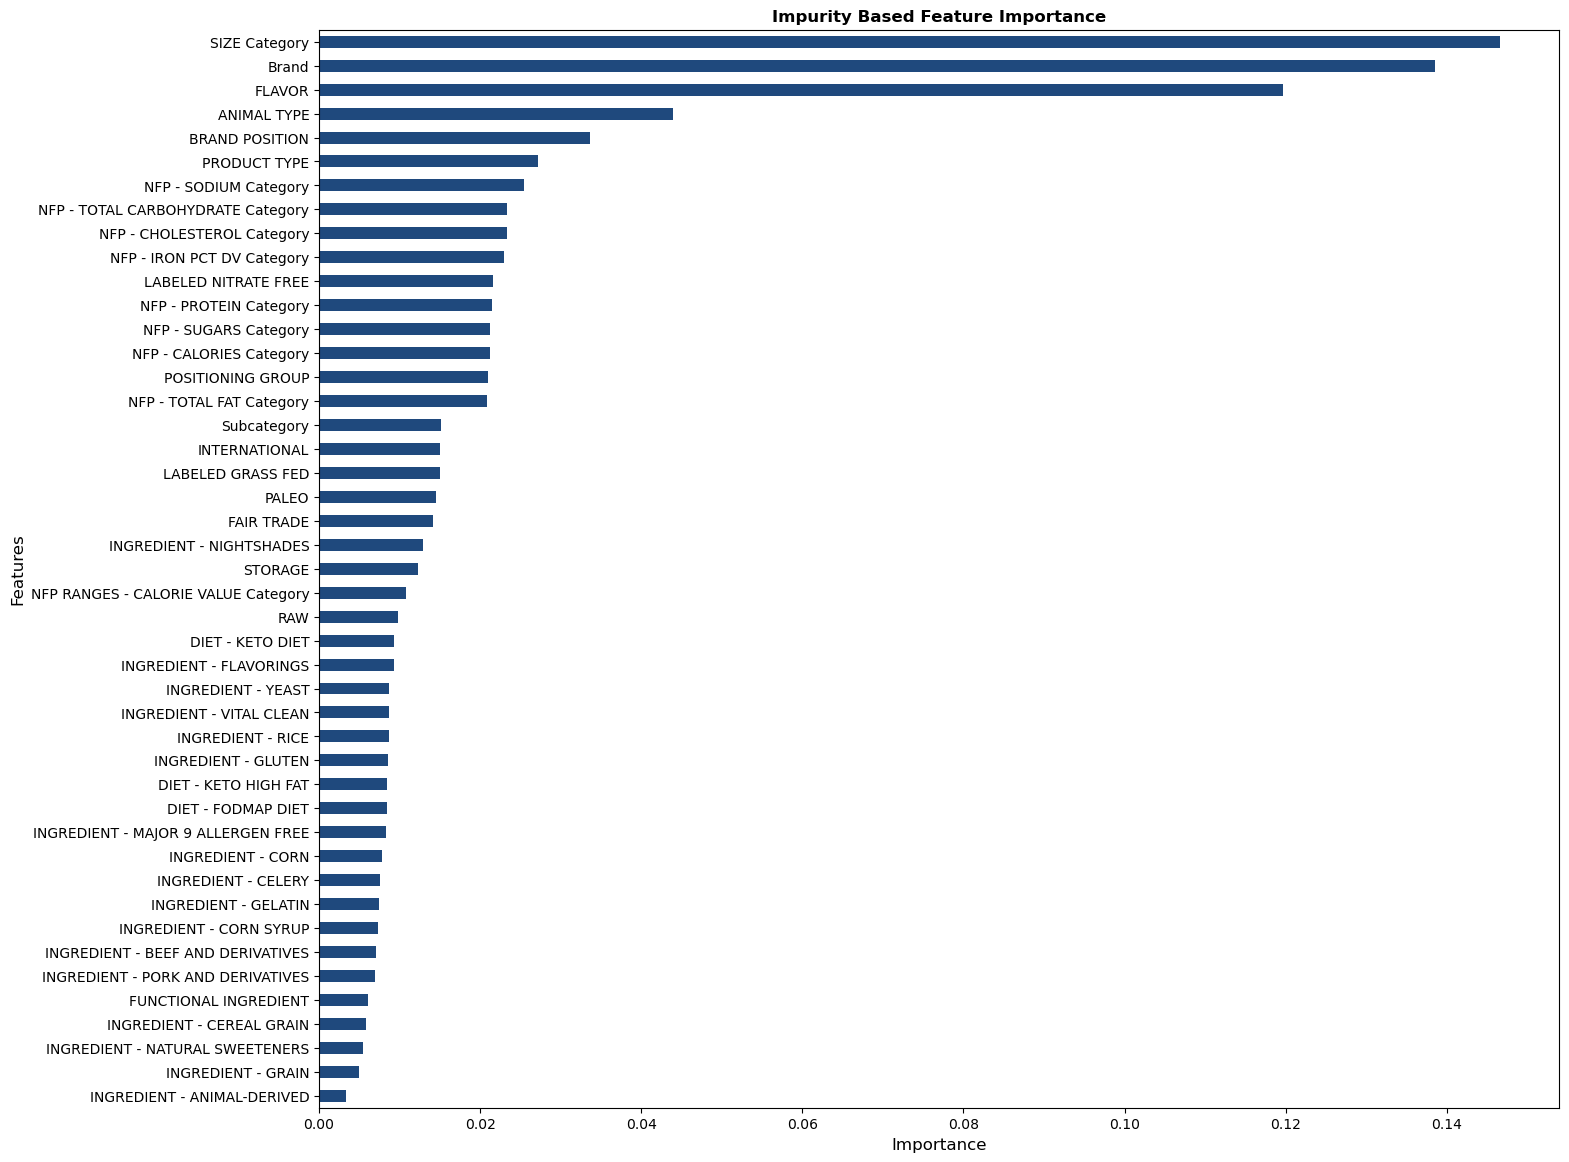

In [1343]:
feat_importances = pd.Series(forest.feature_importances_, index = X_selection.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(16, 14))
feat_importances.plot(kind = 'barh',color=darkblue)
plt. grid(False)
# Add title and labels
plt.title('Impurity Based Feature Importance', fontsize=12, fontweight=600)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

Text(0, 0.5, 'Features')

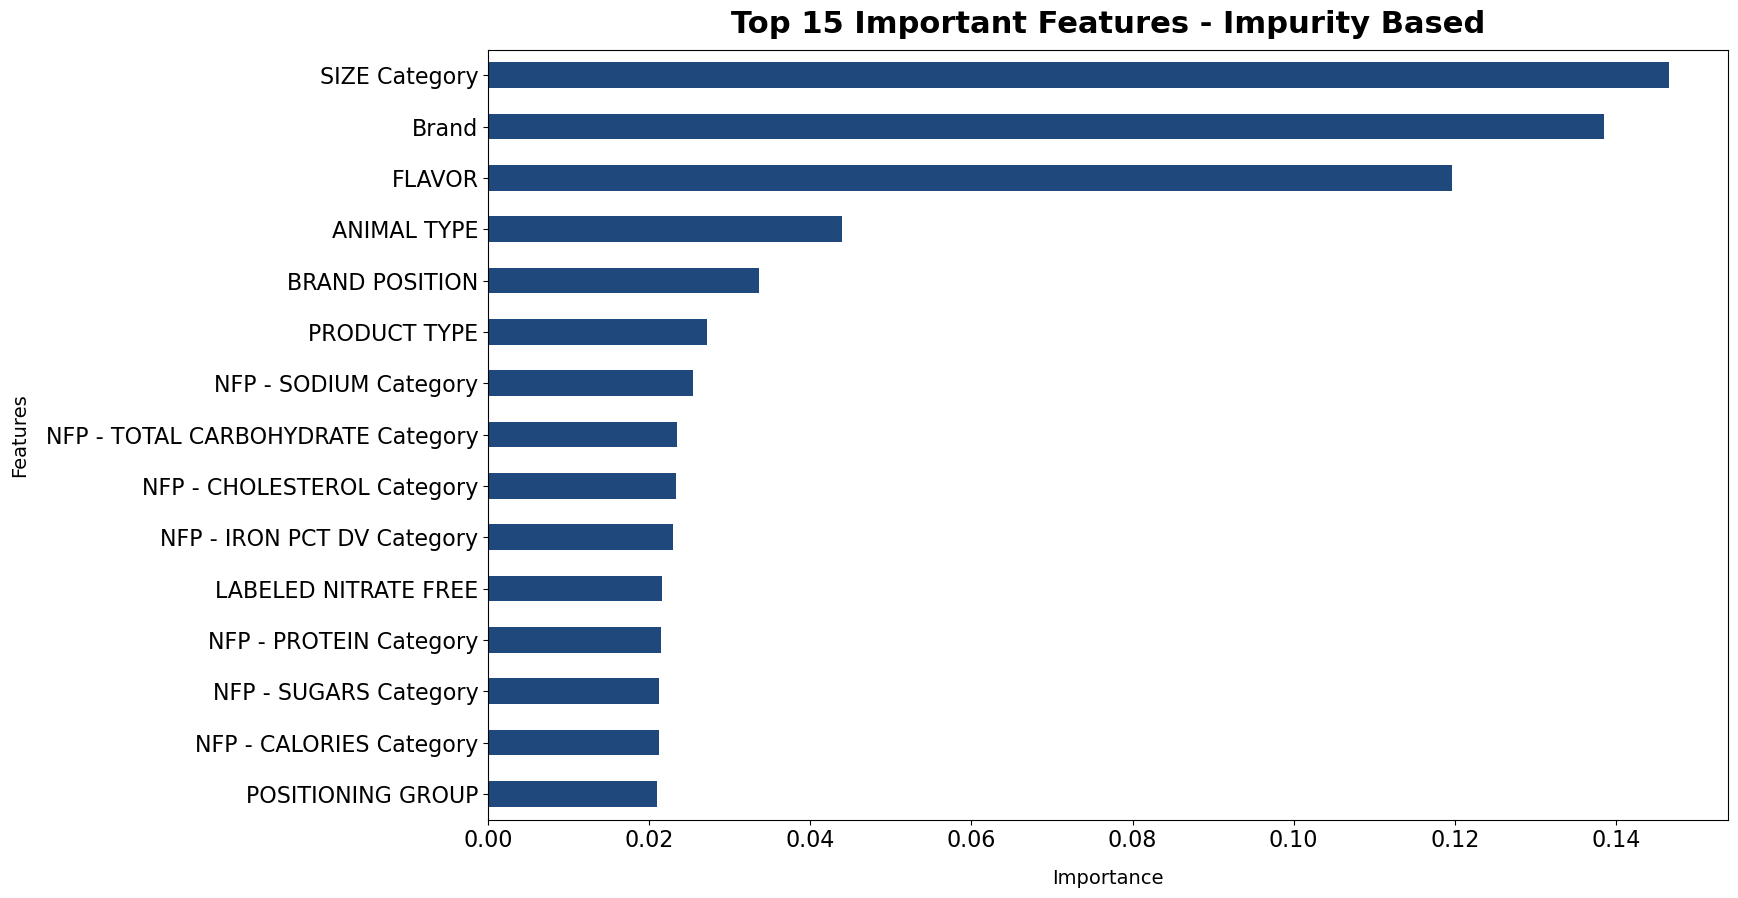

In [1344]:
fig, ax = plt.subplots(figsize=(16, 10))
feat_importances.tail(15).plot(kind = 'barh',color=darkblue)

# Add title and labels
plt.title('Top 15 Important Features - Impurity Based', fontsize=22, fontweight=550,pad=12)
plt.xticks(fontsize=16)  # Adjust the font size for x-axis
plt.yticks(fontsize=16)
plt.xlabel('Importance',fontsize=14,labelpad=12)
plt.ylabel('Features',   fontsize=14,labelpad=12)

In [1345]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    forest, X_test_ore_cat, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [1346]:
forest_importances_p = pd.Series(result.importances_mean, index=X_selection.columns).sort_values(ascending = True)

Text(0, 0.5, 'Features')

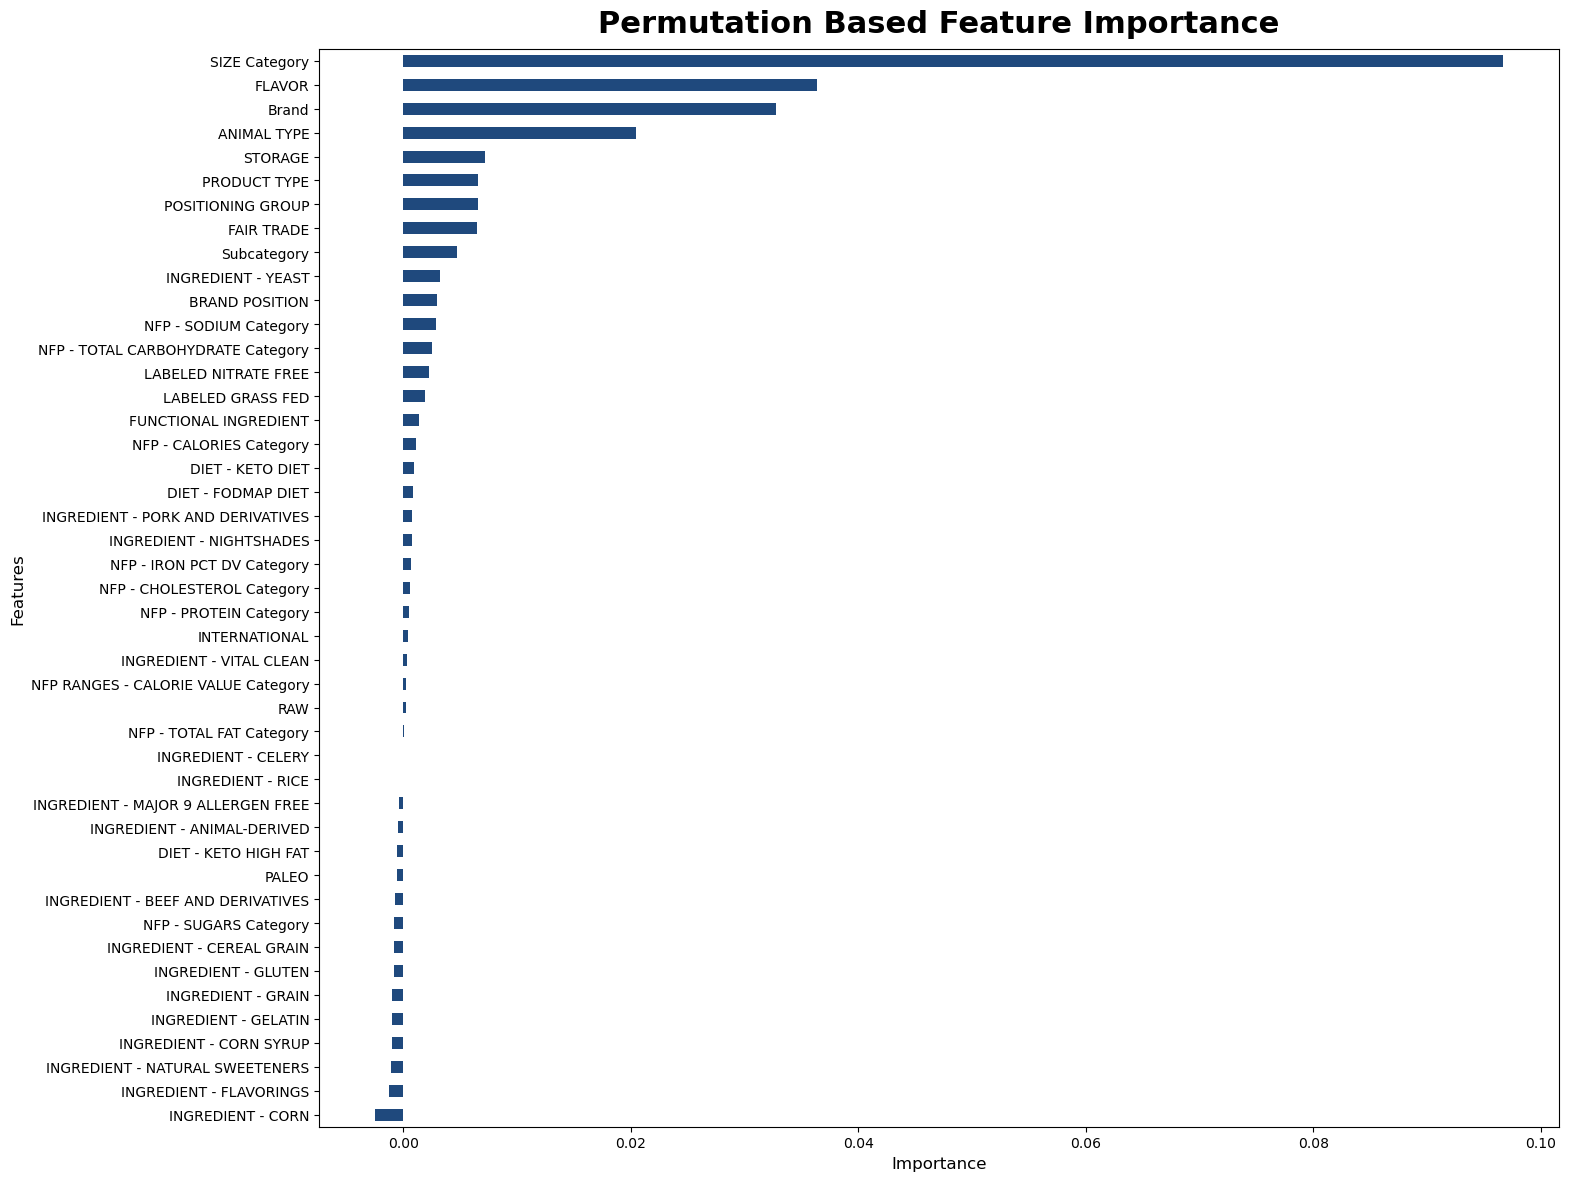

In [1347]:
fig, ax = plt.subplots(figsize=(16, 14))
forest_importances_p.plot(kind = 'barh',color=darkblue)

# Add title and labels
plt.title('Permutation Based Feature Importance', fontsize=22, fontweight=550,pad=12)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features',  fontsize=12)


Text(0, 0.5, 'Features')

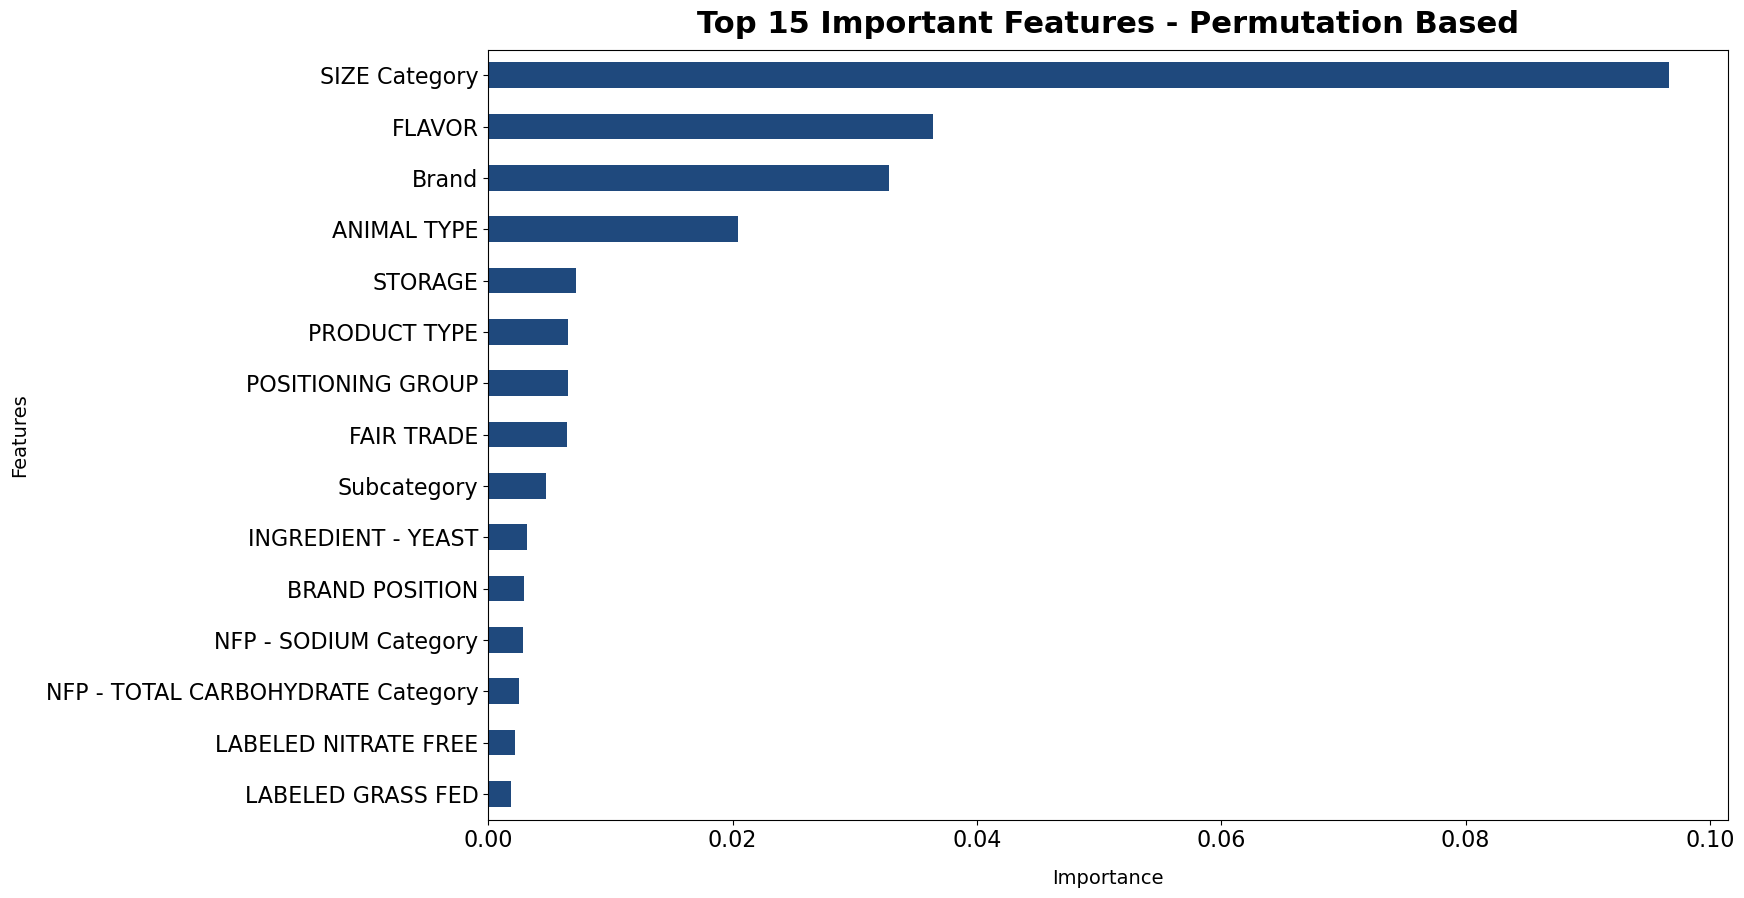

In [1348]:
fig, ax = plt.subplots(figsize=(16, 10))
forest_importances_p.tail(15).plot(kind = 'barh',color=darkblue)

# Add title and labels
plt.title('Top 15 Important Features - Permutation Based', fontsize=22, fontweight=550,pad=12)

plt.xticks(fontsize=16)  # Adjust the font size for x-axis
plt.yticks(fontsize=16)
plt.xlabel('Importance', fontsize=14,labelpad=12)
plt.ylabel('Features',  fontsize=14,labelpad=12)


In [1350]:
impurity15 = list(feat_importances.tail(15).index)
permutation15 = list(forest_importances_p.tail(15).index)

In [1351]:
impurity15

['POSITIONING GROUP',
 'NFP - CALORIES Category',
 'NFP - SUGARS Category',
 'NFP - PROTEIN Category',
 'LABELED NITRATE FREE',
 'NFP - IRON PCT DV Category',
 'NFP - CHOLESTEROL Category',
 'NFP - TOTAL CARBOHYDRATE Category',
 'NFP - SODIUM Category',
 'PRODUCT TYPE',
 'BRAND POSITION',
 'ANIMAL TYPE',
 'FLAVOR',
 'Brand',
 'SIZE Category']

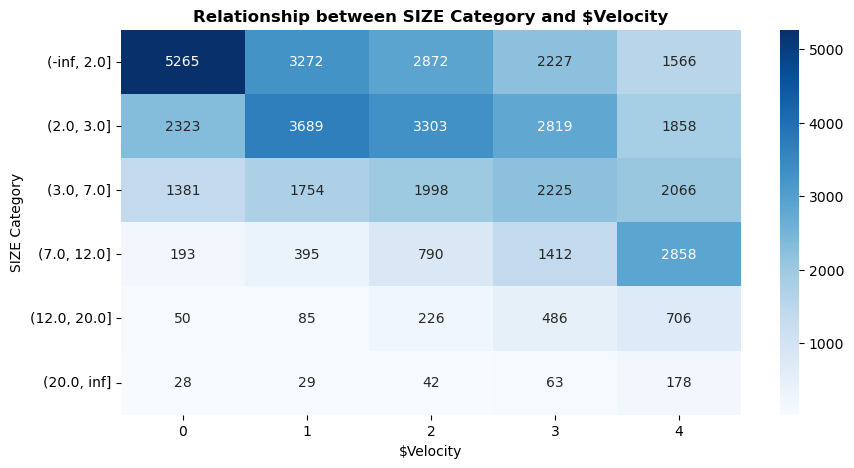

In [864]:
Heatmap_crosstab(X5_cat,'SIZE Category',y_cat,size=(10,5))

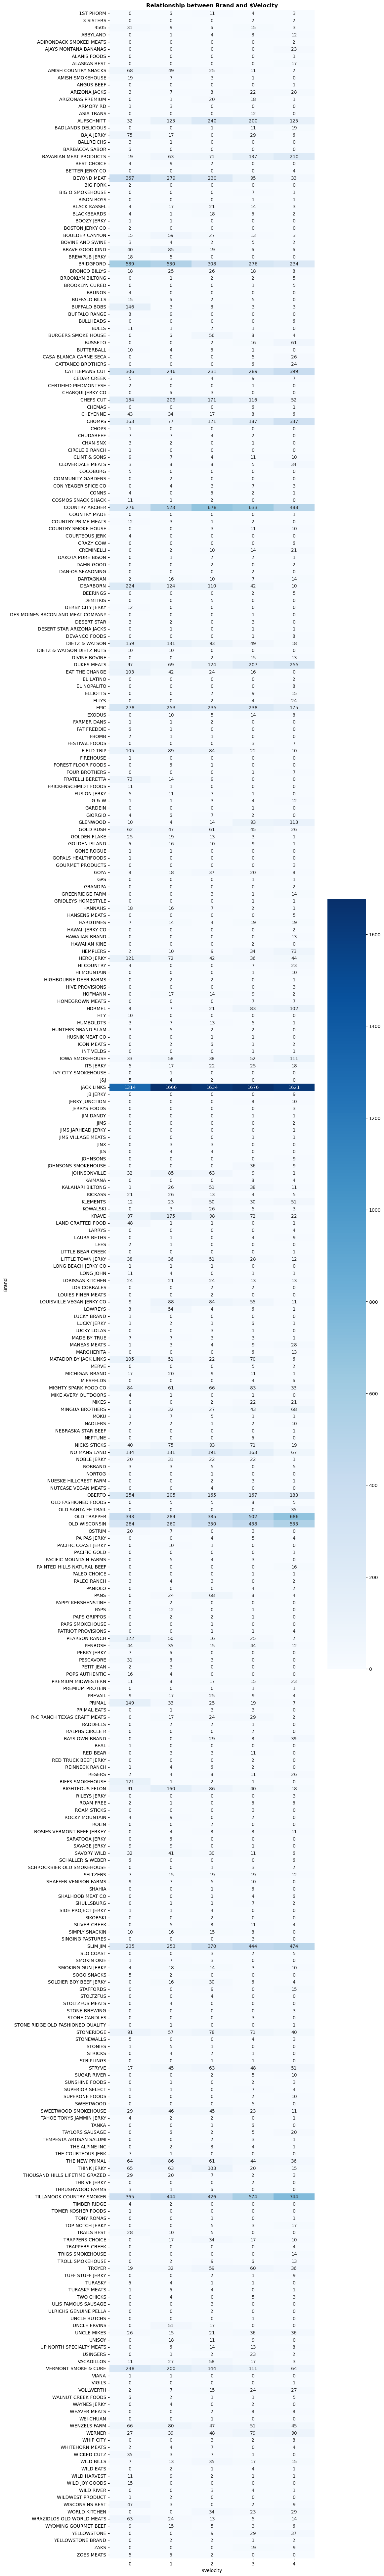

In [663]:
Heatmap_crosstab(X5_cat,'Brand',y_cat,size=(10,100))

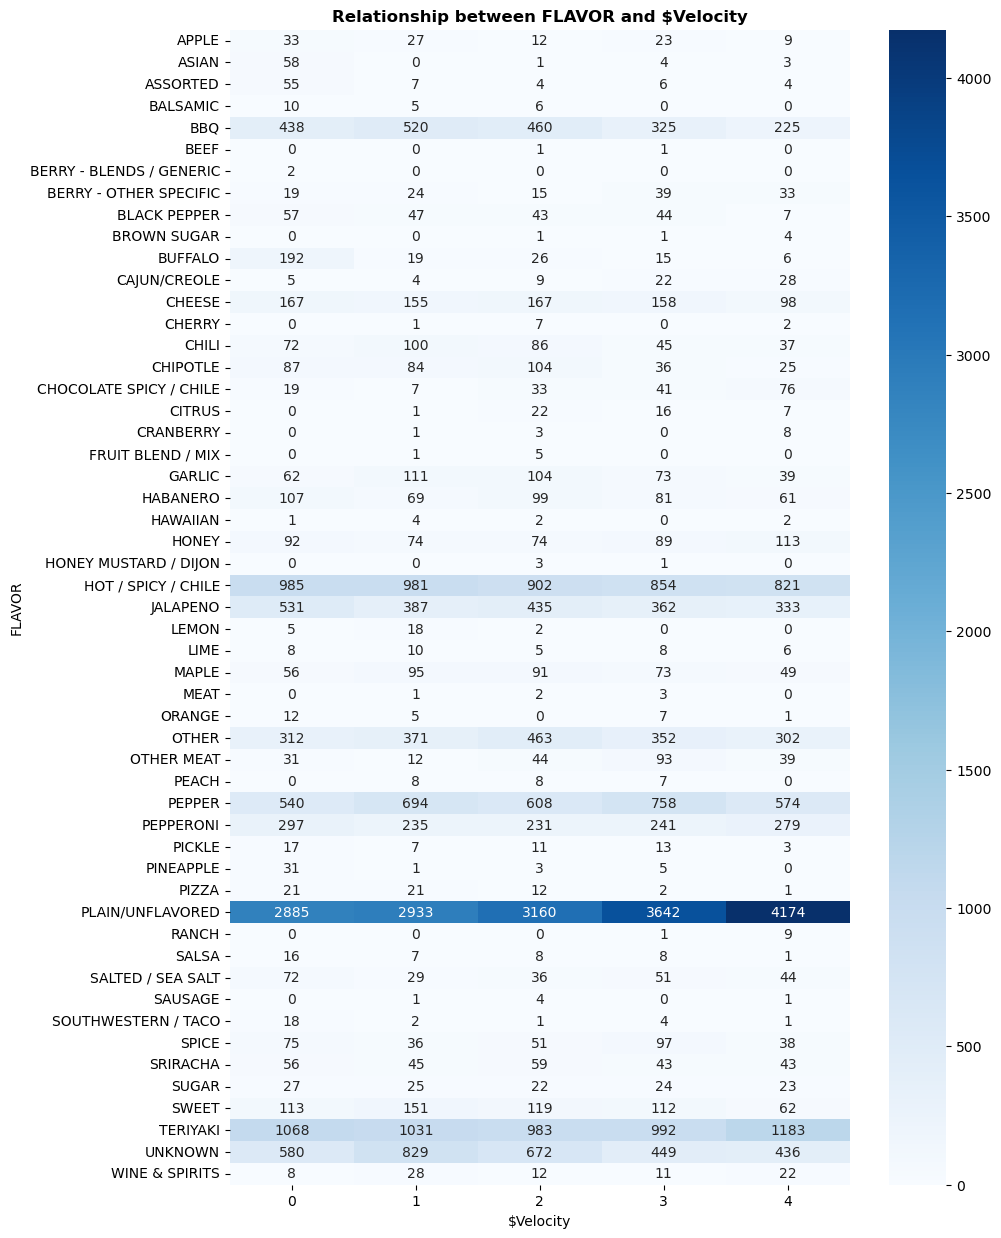

In [664]:
Heatmap_crosstab(X5_cat,'FLAVOR',y_cat,size=(10,15))

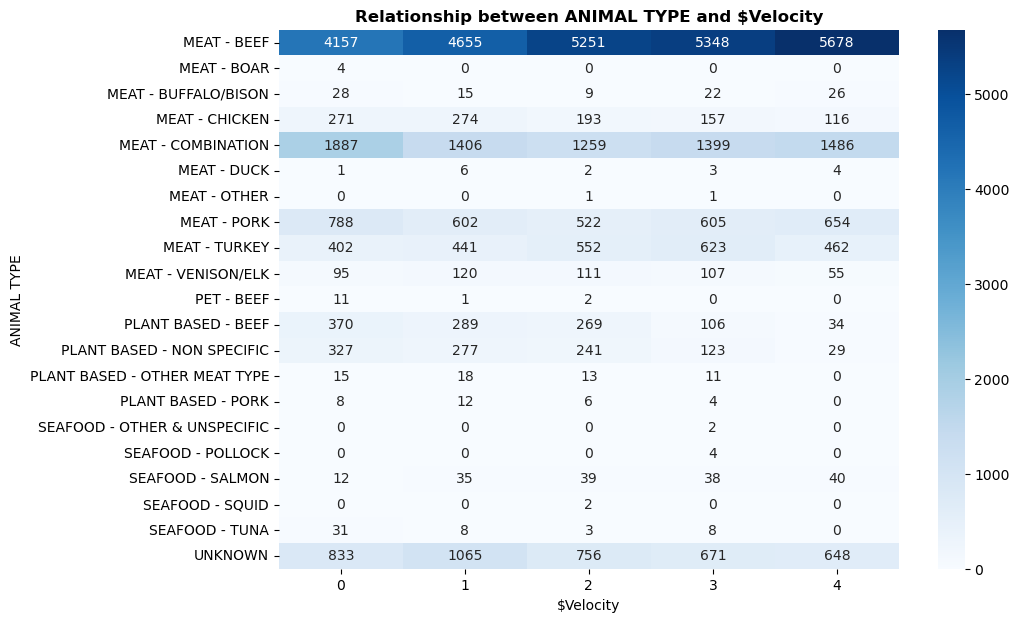

In [665]:
Heatmap_crosstab(X5_cat,'ANIMAL TYPE',y_cat,size=(10,7))

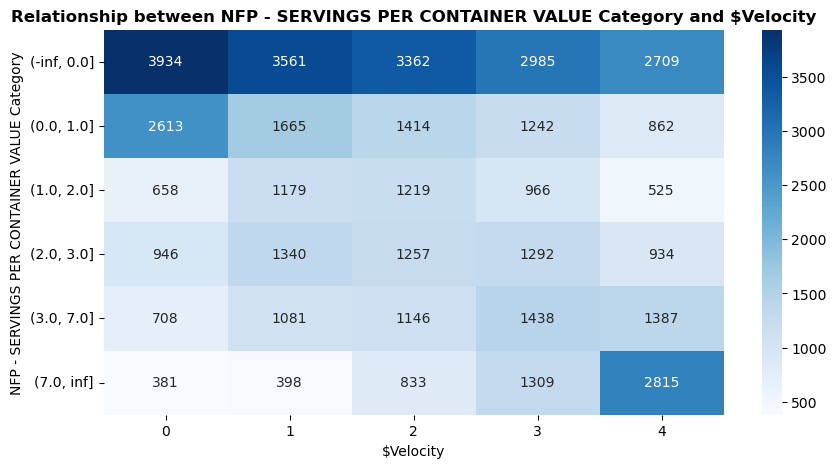

In [666]:
Heatmap_crosstab(X5_cat,'NFP - SERVINGS PER CONTAINER VALUE Category',y_cat,size=(10,5))

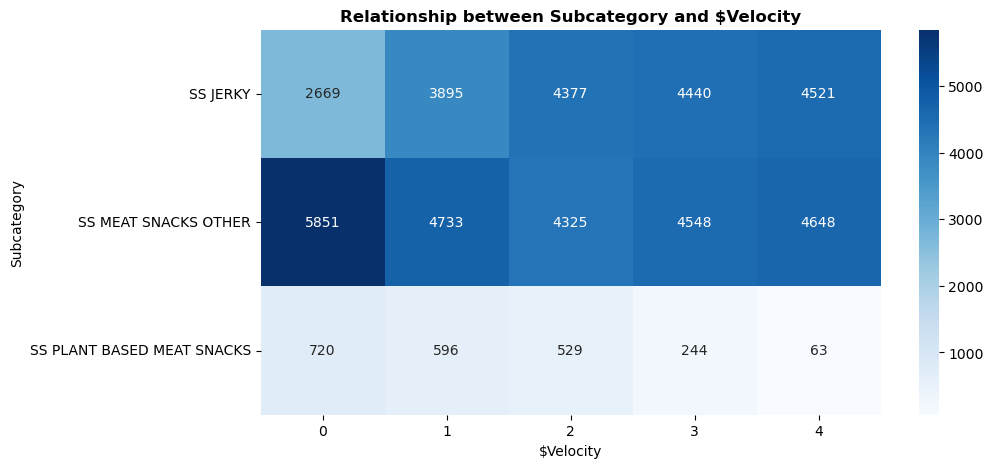

In [695]:
Heatmap_crosstab(X5_cat,'Subcategory',y_cat,size=(10,5))

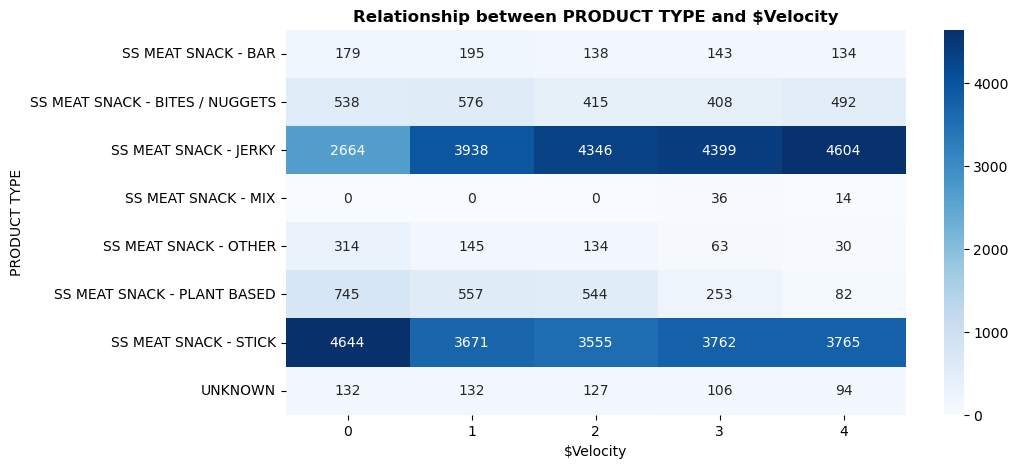

In [749]:
Heatmap_crosstab(X5_cat,'PRODUCT TYPE',y_cat,size=(10,5))

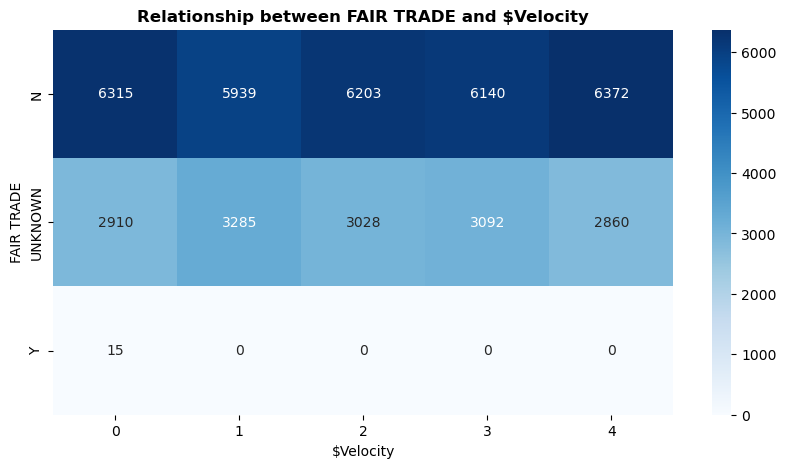

In [696]:
Heatmap_crosstab(X5_cat,'FAIR TRADE',y_cat,size=(10,5))

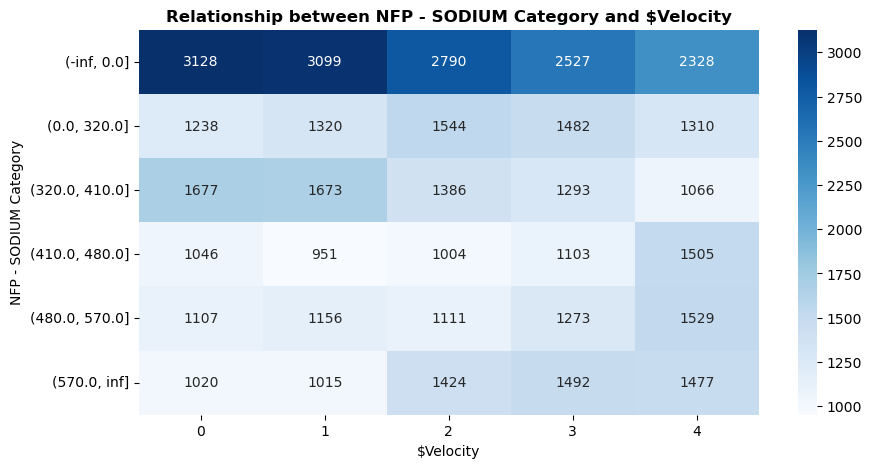

In [751]:
Heatmap_crosstab(X5_cat,'NFP - SODIUM Category',y_cat,size=(10,5))

In [ ]:
# importances = forest.feature_importances_
# forest_importances = pd.Series(importances, index=feature_names)
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# fig, ax = plt.subplots(figsize=(10, 10))
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [714]:
# Get the feature importance scores
feature_importance_scores = rfe2.estimator_.feature_importances_
feature_ranking = rfe2.ranking_
r =dict()
# Print the results
for feature, rank, importance in zip(selected_feature_names_RFE, feature_ranking, feature_importance_scores):
    r[feature] = importance

dict(sorted(r.items(), key=lambda item: item[1],reverse=True))

{'Brand': 0.15003451610567836,
 'FLAVOR': 0.12630657296326994,
 'SIZE Category': 0.12475555227193366,
 'NFP - SERVINGS PER CONTAINER VALUE Category': 0.07452117507113289,
 'ANIMAL TYPE': 0.04888656872944886,
 'BRAND POSITION': 0.03868366991554918,
 'NFP - SODIUM Category': 0.03192184076439094,
 'NFP - TOTAL CARBOHYDRATE Category': 0.03151554414931693,
 'NFP - CHOLESTEROL Category': 0.030127179636449786,
 'PRODUCT TYPE': 0.02942738180266875,
 'NFP - CALORIES Category': 0.028231688166844012,
 'NFP - PROTEIN Category': 0.027441812627364847,
 'NFP - TOTAL FAT Category': 0.026859751666260697,
 'NFP - SUGARS Category': 0.026676558866940217,
 'NFP - IRON PCT DV Category': 0.026387667539016578,
 'POSITIONING GROUP': 0.02465514499352468,
 'LABELED NITRATE FREE': 0.023215802020956498,
 'PALEO': 0.017681854603890525,
 'LABELED GRASS FED': 0.017523921882698305,
 'Subcategory': 0.01674778279641405,
 'INTERNATIONAL': 0.01661505061789076,
 'INGREDIENT - NIGHTSHADES': 0.016402068885276275,
 'FAIR TRAD

In [723]:
len(feature_importance_scores)

25

In [715]:
filter_RFE = list(set(X_selection.columns)-set(selected_feature_names_RFE))

## 4) One-way ANOVA Test 

In [716]:
# First perform one way ANOVA test to see what product variabes are important for the model 
testing = {'Product Attributes':[], 'f_statistic':[], 'p_value': []}
testing = pd.DataFrame(testing)

f_statistic = pd.DataFrame()
p_value =  pd.DataFrame()
for att in X_selection.columns:
    ANOVA = f_oneway(*[y_train[X_selection[att] == char] for char in X_selection[att].unique()])
    row ={'Product Attributes':[att],'f_statistic':[ANOVA[0]], 'p_value':[ANOVA[1]]}
    row =pd.DataFrame(row)
    testing =pd.concat([testing,row])
#     f_statistic [att] = ANOVA[0]
#     p_value [att] = ANOVA[1]


In [717]:
testing.sort_values(by='p_value',inplace=True)

In [727]:
testing

Product Attributes  f_statistic        p_value
0                                        Brand    20.524025   0.000000e+00
0  NFP - SERVINGS PER CONTAINER VALUE Category   729.713762   0.000000e+00
0                                SIZE Category  1063.704064   0.000000e+00
0                                 PRODUCT TYPE   159.020121  4.685954e-232
0                                  Subcategory   445.184323  1.904800e-191
0                                       FLAVOR    19.753460  2.094520e-171
0                                  ANIMAL TYPE    46.378789  2.036269e-163
0                  INGREDIENT - ANIMAL-DERIVED   364.151116  4.079323e-157
0                   NFP - IRON PCT DV Category   195.297413  1.584023e-125
0             NFP - CALORIES FROM FAT Category   111.158516  7.463662e-117
0                          INGREDIENT - GLUTEN   265.192736  5.822628e-115
0                        NFP - SODIUM Category   102.271962  2.047172e-107
0                        FUNCTIONAL INGREDIENT    43.397354  6.210768e-103
0                      NFP - CALORIES Category    82.589424   1.748127e-86
0            INGREDIENT - BEEF AND DERIVATIVES   181.510143   4.088256e-79
0                   NFP - CHOLESTEROL Category    92.663265   1.730258e-78
0                      LABELED ANTIBIOTIC FREE   177.211255   2.870663e-77
0                            INGREDIENT - CORN   175.470488   1.606234e-76
0                     INGREDIENT - NIGHTSHADES   172.922428   1.997975e-75
0                                      STORAGE   167.938172   2.770663e-73
0                               BRAND POSITION    59.133678   3.705643e-73
0                     NFP - TOTAL FAT Category    69.750405   8.155241e-73
0                          INGREDIENT - CELERY   164.557365   7.868021e-72
0                       NFP - PROTEIN Category    67.957096   6.625797e-71
0                           INGREDIENT - GRAIN   137.811135   2.533418e-60
0                    INGREDIENT - CEREAL GRAIN   137.811135   2.533418e-60
0                            LABELED GRASS FED   136.025776   1.487817e-59
0                    LABELED NO ADDED HORMONES   132.722815   3.936874e-58
0                         INGREDIENT - GELATIN   129.031928   1.531713e-56
0                            INGREDIENT - RICE   128.902063   1.742326e-56
0                      INGREDIENT - FLAVORINGS   125.009062   8.291447e-55
0                             DIET - KETO DIET   124.405023   1.509898e-54
0                      INGREDIENT - CORN SYRUP   121.308789   3.261797e-53
0                           INGREDIENT - YEAST   119.546838   1.874949e-52
0            NFP - TOTAL CARBOHYDRATE Category    48.937497   1.190000e-50
0                    INGREDIENT - SOY ALLERGEN   114.691767   2.324421e-50
0              INGREDIENT - NATURAL SWEETENERS   109.765225   3.098103e-48
0           INGREDIENT - MAJOR 9 ALLERGEN FREE   106.139919   1.135207e-46
0                     INGREDIENT - VITAL CLEAN   104.034884   9.190948e-46
0          NFP RANGES - CALORIE VALUE Category    68.838401   2.285104e-44
0            INGREDIENT - PORK AND DERIVATIVES    93.728398   2.583021e-41
0                      PALEO/WHOLE 30 FRIENDLY    91.579641   2.187709e-40
0                           DIET - FODMAP DIET    91.231306   3.093264e-40
0                         DIET - KETO HIGH FAT    87.313222   1.522825e-38
0                                        PALEO    34.730386   8.570494e-16
0                         LABELED NITRATE FREE    18.671132   7.869040e-09
0                        NFP - SUGARS Category     8.510400   4.609725e-08

In [728]:
set(testing[:40]['Product Attributes'])

{'ANIMAL TYPE',
 'BRAND POSITION',
 'Brand',
 'DIET - KETO DIET',
 'FLAVOR',
 'FUNCTIONAL INGREDIENT',
 'INGREDIENT - ANIMAL-DERIVED',
 'INGREDIENT - BEEF AND DERIVATIVES',
 'INGREDIENT - CELERY',
 'INGREDIENT - CEREAL GRAIN',
 'INGREDIENT - CORN',
 'INGREDIENT - CORN SYRUP',
 'INGREDIENT - FLAVORINGS',
 'INGREDIENT - GELATIN',
 'INGREDIENT - GLUTEN',
 'INGREDIENT - GRAIN',
 'INGREDIENT - MAJOR 9 ALLERGEN FREE',
 'INGREDIENT - NATURAL SWEETENERS',
 'INGREDIENT - NIGHTSHADES',
 'INGREDIENT - RICE',
 'INGREDIENT - SOY ALLERGEN',
 'INGREDIENT - VITAL CLEAN',
 'INGREDIENT - YEAST',
 'LABELED ANTIBIOTIC FREE',
 'LABELED GRASS FED',
 'LABELED NO ADDED HORMONES',
 'NFP - CALORIES Category',
 'NFP - CALORIES FROM FAT Category',
 'NFP - CHOLESTEROL Category',
 'NFP - IRON PCT DV Category',
 'NFP - PROTEIN Category',
 'NFP - SERVINGS PER CONTAINER VALUE Category',
 'NFP - SODIUM Category',
 'NFP - TOTAL CARBOHYDRATE Category',
 'NFP - TOTAL FAT Category',
 'NFP RANGES - CALORIE VALUE Category',


In [718]:
dollar_sig = testing[testing["p_value"]<0.05]
dollar_no_sig = testing[testing["p_value"]>=0.05]
print(f'Numebr of attributes in total {len(X_selection.columns)}')
print(f'Number of attributes stastically significant to EQ Unit Velocity is {len(dollar_sig)}')

Numebr of attributes in total 46
Number of attributes stastically significant to EQ Unit Velocity is 46


In [719]:
filter_anova = dollar_no_sig.copy()

In [735]:
filter_anova

Empty DataFrame
Columns: [Product Attributes, f_statistic, p_value]
Index: []

## Comapring results

In [720]:
from collections import Counter
combined_list = low_var_col + low_mutual_info + filter_RFECV + filter_RFE 

# Use Counter to count occurrences
element_counts = Counter(combined_list)
count_results=dict()
# Print the result
for element, count in element_counts.items():
    count_results[element]=count
    #print(f"{element}: {count} times")
dict(sorted(count_results.items(), key=lambda item: item[1],reverse=True))

{'INGREDIENT - BEEF AND DERIVATIVES': 3,
 'INGREDIENT - GELATIN': 3,
 'INGREDIENT - NATURAL SWEETENERS': 3,
 'INGREDIENT - YEAST': 3,
 'RAW': 3,
 'FAIR TRADE': 2,
 'INGREDIENT - ANIMAL-DERIVED': 2,
 'LABELED GRASS FED': 2,
 'DIET - FODMAP DIET': 2,
 'INGREDIENT - FLAVORINGS': 2,
 'INGREDIENT - CORN SYRUP': 2,
 'INGREDIENT - RICE': 2,
 'INGREDIENT - GLUTEN': 2,
 'INGREDIENT - GRAIN': 2,
 'INGREDIENT - MAJOR 9 ALLERGEN FREE': 2,
 'INGREDIENT - PORK AND DERIVATIVES': 2,
 'NFP RANGES - CALORIE VALUE Category': 2,
 'Subcategory': 1,
 'PALEO': 1,
 'STORAGE': 1,
 'LABELED NITRATE FREE': 1,
 'NFP - IRON PCT DV Category': 1,
 'INGREDIENT - NIGHTSHADES': 1,
 'NFP - TOTAL CARBOHYDRATE Category': 1,
 'BRAND POSITION': 1,
 'DIET - KETO DIET': 1,
 'DIET - KETO HIGH FAT': 1,
 'INGREDIENT - CEREAL GRAIN': 1,
 'FUNCTIONAL INGREDIENT': 1,
 'INGREDIENT - VITAL CLEAN': 1,
 'INGREDIENT - CELERY': 1}

# readme
- numerical columsn used after categorize or before?

## Modelling

- select feature
- using RandomForest classifier with one_hot encoding

In [754]:
len(X_train_ore_cat.columns)

47

In [753]:
len(selected_feature_names_RFECV)

38

In [755]:
len(selected_feature_names_RFE)

25

In [ ]:
# use X_train_encoded_cat and y_cat 

In [1352]:
# selected_feature_names_RFECV
filter_col = impurity15.copy()

X_train_selected = X_train_ore_cat[filter_col]
X_test_selected = X_test_ore_cat[filter_col]
# X_train_selected = X_train_encoded_cat
# X_test_selected = X_test_encoded_cat
# X_train_selected = df_size
# X_test_selected = df_size_test

In [757]:
X_train_selected.shape

(32251, 25)

In [758]:
X_test_selected.shape

(13823, 25)

In [949]:
X_learning = pd.concat([X_train_selected,X_test_selected])

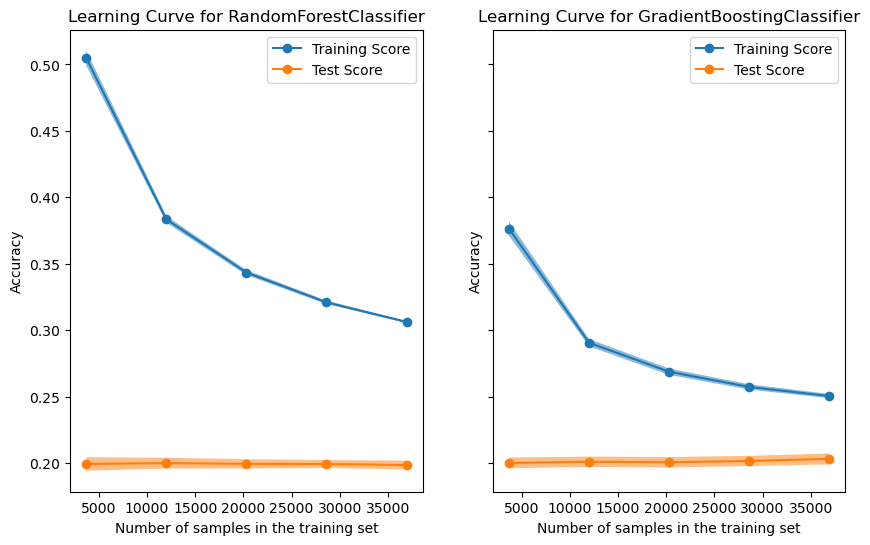

In [950]:
X_learning = pd.concat([X_train_selected,X_test_selected])
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

random = RandomForestClassifier()
gradient = GradientBoostingClassifier()
common_params = {
    "X": X_learning,
    "y": y_fit,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([random, gradient]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

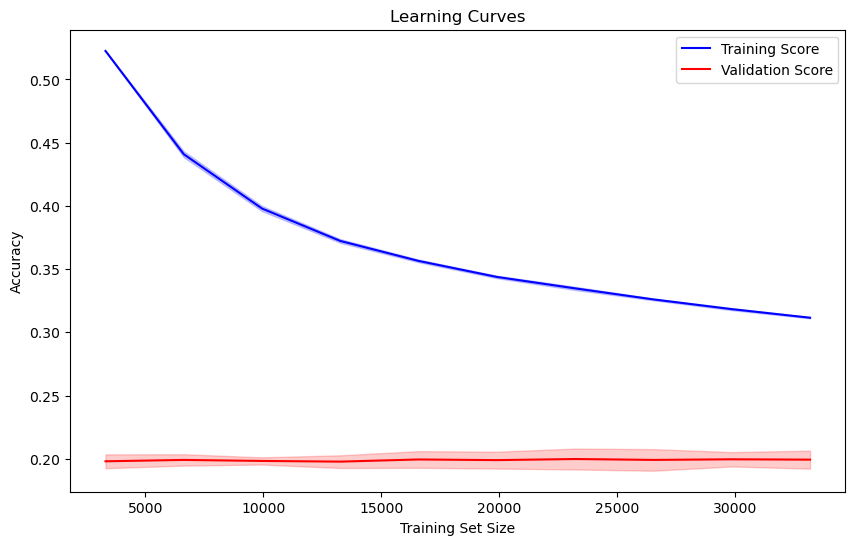

In [760]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Assume X, y are your features and labels

# Split the data into training and validation sets
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_learning, y_fit, test_size=0.2, random_state=42)

# Create a Decision Tree classifier (you can replace this with your chosen model)
model = RandomForestClassifier()

# Define training sizes (e.g., 10%, 20%, ..., 100%)
train_sizes, train_scores, val_scores = learning_curve(model, X_train_l, y_train_l, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [951]:
from sklearn.naive_bayes import GaussianNB
models_class = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(random_state=42)),
    ('Gradient',GradientBoostingClassifier()),
    ('Gaussian Baysian', GaussianNB())
]


In [765]:
# Fitting on X containing numerical and categorical, y is categorical 


# Evaluate models with different encoding methods
results = []


for model_name, model in models_class:
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    
    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=10,n_jobs=-1, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    # Fit the pipeline on the entire training set
    pipeline.fit(X_train_selected, y_train)
    
    train_score = pipeline.score(X_train_selected, y_train)
    test_score = pipeline.score(X_test_selected, y_test)
    
    # Evaluate on the test set
    test_predictions = pipeline.predict(X_test_selected)
    test_accuracy = accuracy_score(y_test, test_predictions)
 
    results.append({
        'Model': model_name,
        'Train Accuracy':train_score,
        'Test Accuracy':test_score,
        'CV Accuracy': mean_cv_score,
        'CV Standard Deviation':std_cv_score})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


              Model  Train Accuracy  Test Accuracy  CV Accuracy  \
0     Decision Tree        0.541565       0.487955     0.493566   
1     Random Forest        0.541534       0.487665     0.493969   
2               SVM        0.313944       0.314693     0.307371   
3          Gradient        0.442963       0.418795     0.427336   
4  Gaussian Baysian        0.297665       0.290530     0.295743   

   CV Standard Deviation  
0               0.006492  
1               0.006830  
2               0.007086  
3               0.010015  
4               0.008967  


In [771]:
# All possible dataset 
dataset = dict({'Ordinal encoding on all categorical X':(X_train_ore_cat,X_test_ore_cat), #ordinal encoding 
          'One Hot encoding on all categorical X':(X_train_encoded_cat,X_test_encoded_cat), #onehot encoding
           'Ordinal encoding on categorical/numerical X':(X_train_combined_ore,X_test_combined_ore),
            'One Hot encoding on categorical/numerical X':(X_train_combined,X_test_combined)})

In [775]:
results_dataset = []

for key in dataset:
    forest = RandomForestClassifier(n_estimators = 140,random_state=42,oob_score=True)
    pipeline = Pipeline([
        ('classifier', forest)
    ])
    
    X_train_try = dataset[key][0]
    X_test_try = dataset[key][1]
    
    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_try, y_train, cv=8,n_jobs=-1, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    # Fit the pipeline on the entire training set
    pipeline.fit(X_train_try, y_train)
    
    train_score = pipeline.score(X_train_try, y_train)
    test_score = pipeline.score(X_test_try, y_test)
    
    # Evaluate on the test set
    test_predictions = pipeline.predict(X_test_try)
    test_accuracy = accuracy_score(y_test, test_predictions)
 
    results_dataset.append({
        'Data': key,
        'Train Accuracy':train_score,
        'Test Accuracy':test_score,
        'CV Accuracy': mean_cv_score,
        'CV Standard Deviation':std_cv_score})

# Display the results
results_df_data = pd.DataFrame(results_dataset)
print(results_df_data)

                                          Data  Train Accuracy  Test Accuracy  \
0        Ordinal encoding on all categorical X        0.541689       0.489763   
1        One Hot encoding on all categorical X        0.536852       0.487521   
2  Ordinal encoding on categorical/numerical X        0.543239       0.491066   
3  One Hot encoding on categorical/numerical X        0.541472       0.489980   

   CV Accuracy  CV Standard Deviation  
0     0.491861               0.007959  
1     0.488791               0.007219  
2     0.493380               0.007858  
3     0.491675               0.007230  


C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\LorraineLin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do no

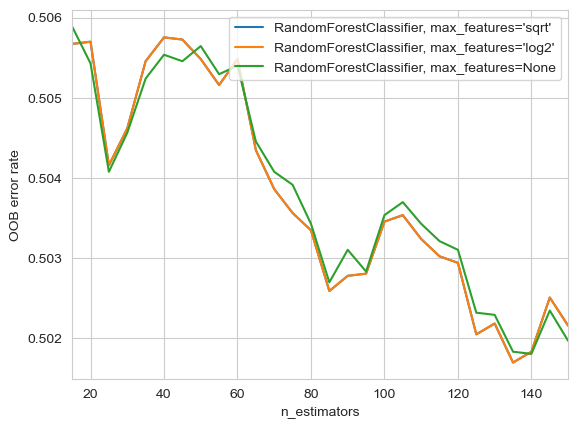

In [1409]:
from collections import OrderedDict

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_selected, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [806]:
forest = RandomForestClassifier(n_estimators = 140,random_state=42,oob_score=True)
forest.fit(X_train_combined_ore, y_train)

RandomForestClassifier(n_estimators=140, oob_score=True, random_state=42)

In [811]:
forest_r = RandomForestRegressor(n_estimators = 140,random_state=42,oob_score=True)
forest_r.fit(X_train_combined_ore, y_train_num)

RandomForestRegressor(n_estimators=140, oob_score=True, random_state=42)

In [812]:
forest_r.score(X_train_combined_ore, y_train_num)


0.5560329603352994

In [813]:
forest_r.score(X_test_combined_ore, y_test_num)

0.5025352783848269

In [820]:
y_train_num.describe()

count    32251.000000
mean         7.210652
std          5.028673
min          0.175000
25%          3.371767
50%          5.719964
75%          9.692291
max         23.024611
Name: Dollars Velocity, dtype: float64

In [816]:
cv_scores = cross_val_score(forest_r, X_train_combined_ore, y_train_num, cv=8,n_jobs=-1, 
                                    scoring='neg_root_mean_squared_error')
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

# Fit the pipeline on the entire training set

# Evaluate on the test set
test_predictions = forest_r.predict(X_test_combined_ore)
test_accuracy = np.sqrt(mean_squared_error(y_test_num, test_predictions))

In [817]:
mean_cv_score

3.5616357517883372

In [819]:
test_accuracy

3.5763164928622944

In [ ]:
cv_scores = cross_val_score(forest, X_train_combined_ore, y_train, cv=8,n_jobs=-1, scoring='accuracy')

In [ ]:
cv_scores

In [808]:
forest.score(X_test_combined_ore, y_test)

0.49106561527888304

In [ ]:
#           Model  CV Accuracy  CV Standard Deviation  Test Accuracy
# 0     Decision Tree     0.394324               0.059074       0.347305
# 1     Random Forest     0.431818               0.061053       0.437126
# 2               SVM     0.271348               0.047997       0.221557
# 3          Gradient     0.422863               0.069747       0.425150
# 4  Gaussian Baysian     0.349457               0.043530       0.347305

In [ ]:
#  Model  CV Accuracy  CV Standard Deviation  Test Accuracy
# 0     Decision Tree     0.361533               0.058298       0.401198
# 1     Random Forest     0.433424               0.046911       0.467066
# 2               SVM     0.416983               0.046339       0.419162
# 3          Gradient     0.407689               0.048245       0.413174
# 4  Gaussian Baysian     0.244414               0.037569       0.215569

# Testing Set

In [827]:
filter_col

['Subcategory',
 'ANIMAL TYPE',
 'BRAND POSITION',
 'FAIR TRADE',
 'FLAVOR',
 'INGREDIENT - CORN',
 'INGREDIENT - NIGHTSHADES',
 'INTERNATIONAL',
 'LABELED GRASS FED',
 'LABELED NITRATE FREE',
 'PALEO',
 'POSITIONING GROUP',
 'PRODUCT TYPE',
 'STORAGE',
 'NFP - SUGARS Category',
 'NFP - CHOLESTEROL Category',
 'NFP - IRON PCT DV Category',
 'NFP - TOTAL CARBOHYDRATE Category',
 'NFP - SERVINGS PER CONTAINER VALUE Category',
 'NFP - SODIUM Category',
 'NFP - CALORIES Category',
 'NFP - TOTAL FAT Category',
 'NFP - PROTEIN Category',
 'SIZE Category',
 'Brand']

In [1436]:
col_to_model = impurity15
X_train_old = X5_cat_highsample[col_to_model].copy()
y_train_old = y_fit.copy()
X_test_new = X_testing_cat[col_to_model].copy()
y_test_new = y_testing_cat.copy()

In [1354]:
import dataframe_image as dfi
example =["SIZE Category", 'Brand','FLAVOR','ANIMAL TYPE','BRAND POSITION','PRODUCT TYPE','NFP - SODIUM Category']
export_example=X_train_old[example].tail(20)
export_example_df = export_example.style.background_gradient()
export_example_df

dfi.export(export_example_df,"example.png")

In [1437]:
# Define classification models
models_class = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)),
    ('Random Forest', RandomForestClassifier(n_estimators=150, max_depth=None,min_samples_split=2, random_state=0))
]


# Define encoding methods
encoding_methods = [
    ('Ordinal Encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))]

In [1438]:
# Fitting on X containing numerical and categorical, y is categorical 


# Evaluate models with different encoding methods
results = []


for model_name, model in models_class:
    for encoding_name, categorical_transformer in encoding_methods:
        
        preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, col_to_model)])
        
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        # Cross-validate the pipeline
#         cv_scores = cross_val_score(pipeline, X_train_old, y_train_old, cv=8,n_jobs=-1, scoring='accuracy')
#         mean_cv_score = cv_scores.mean()
#         std_cv_score = cv_scores.std()
        
        #Fit the pipeline on the entire training set
        pipeline.fit(X_train_old, y_train_old)
        Train_accuracy = pipeline.score(X_train_old, y_train_old)
        
        # Evaluate on the test set
        test_predictions = pipeline.predict(X_test_new)
        test_accuracy = accuracy_score(y_test_new, test_predictions)

        results.append({
            'Model': model_name,
            'Encoding': encoding_name,
            'Train Accuracy':Train_accuracy,
            'Test Accuracy': test_accuracy,
            'Predicted Labels': test_predictions.tolist()
        })

# Display the results
results_df_final = pd.DataFrame(results)
print(results_df_final)


           Model          Encoding  Train Accuracy  Test Accuracy  \
0  Decision Tree  Ordinal Encoding        0.532031       0.469157   
1  Random Forest  Ordinal Encoding        0.532031       0.473083   

                                    Predicted Labels  
0  [0, 4, 2, 2, 4, 0, 2, 0, 4, 0, 1, 4, 0, 2, 1, ...  
1  [0, 4, 2, 2, 4, 0, 2, 0, 4, 0, 1, 4, 2, 0, 1, ...  


In [1439]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

random_model = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_split=2, random_state=0)

# Replace this with your actual columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', oe, col_to_model)
])

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_model)
])

final_pipeline.fit(X_train_old, y_train_old)

# Evaluate on the test set
test_predictions_final = final_pipeline.predict(X_test_new)
test_accuracy = accuracy_score(y_test_new, test_predictions_final)

results_final = [{
    'Model': 'Random Forest',  # Assuming you want to name the model in results
    'Train Accuracy': final_pipeline.score(X_train_old, y_train_old),
    'Test Accuracy': test_accuracy
}]

# Display the results
results_final_df = pd.DataFrame(results_final)
print(results_final_df)

           Model  Train Accuracy  Test Accuracy
0  Random Forest        0.532031       0.473083


In [1440]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, test_predictions_final))

              precision    recall  f1-score   support

           0       0.54      0.67      0.60     10239
           1       0.43      0.34      0.38     10239
           2       0.38      0.27      0.32     10238
           3       0.38      0.29      0.33     10239
           4       0.53      0.79      0.63     10239

    accuracy                           0.47     51194
   macro avg       0.45      0.47      0.45     51194
weighted avg       0.45      0.47      0.45     51194



In [982]:
# pip install yellowbrick

In [1365]:
classes=[0,1,2,3,4]

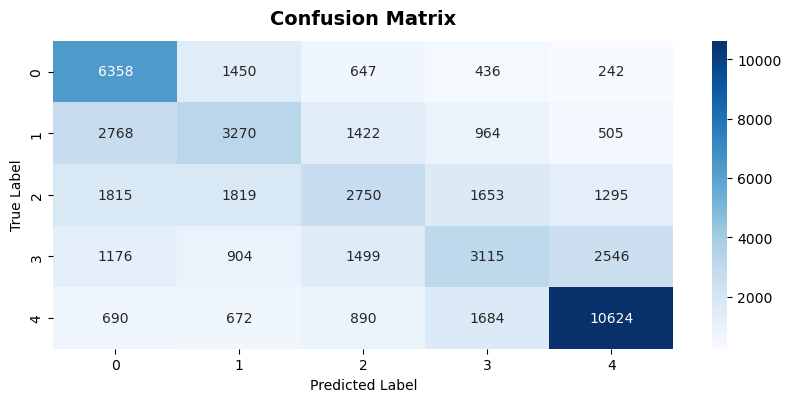

In [1366]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_new, test_predictions_final)

plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix',fontweight=550,fontsize=14,pad=12)
plt.show()

In [1411]:
import yellowbrick
yellowbrick.style.rcmod.reset_orig()

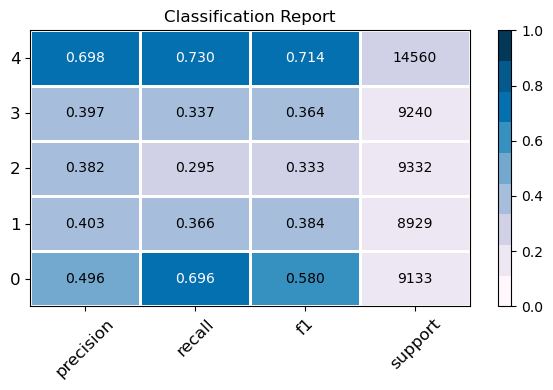

<Axes: title={'center': 'Classification Report'}>

In [1412]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(final_pipeline, classes=classes, support=True,cmap='PuBu',
                                 title="Classification Report",size=(600,400))

visualizer.fit(X_train_old, y_train_old)        # Fit the visualizer and the model
visualizer.score(X_test_new, y_test_new)        # Evaluate the model on the test data
#visualizer.ax.set_title("Classification Report",fontweight=550)
visualizer.ax.tick_params(labelsize=12)  # change size of tick labels
visualizer.ax.title.set_fontsize(16)  # change size of title

visualizer.show()       

In [1092]:
cm

array([[6446, 1492,  627,  405,  163],
       [2922, 3292, 1501,  883,  331],
       [2104, 1821, 2902, 1562,  943],
       [1543,  939, 1579, 3132, 2047],
       [1280,  648,  985, 1733, 9914]], dtype=int64)

In [1373]:
(cm[0][[0,1]].sum()/cm[0].sum())*100

85.49217124712581

In [1374]:
(cm[1][[0,1,2]].sum()/cm[1].sum())*100

83.54798969649457

In [1375]:
(cm[2][[1,2,3]].sum()/cm[2].sum())*100

66.67381054436348

In [1376]:
(cm[3][[2,3,4]].sum()/cm[3].sum())*100

77.48917748917748

In [1377]:
(cm[4][[3,4]].sum()/cm[4].sum())*100

84.53296703296704

In [1094]:
cm[4][[3,4]].sum()

11647

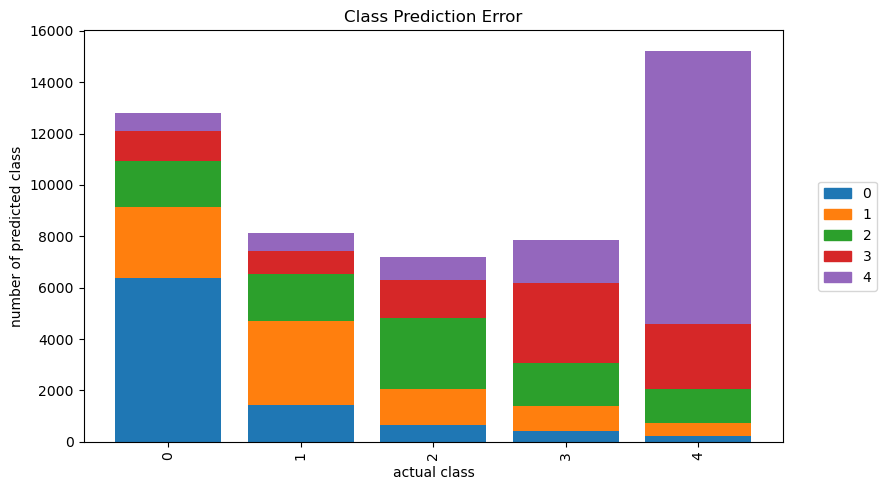

<Axes: title={'center': 'Class Prediction Error'}, xlabel='actual class', ylabel='number of predicted class'>

In [1372]:
from yellowbrick.classifier import ClassPredictionError
plt.figure(figsize=(10,5))
visualizer = ClassPredictionError(
    final_pipeline, classes=classes,title="Class Prediction Error",color='sns_dark')
visualizer.fit(X_train_old, y_train_old)
visualizer.ax.set_title("Class Prediction Error", size=16)
visualizer.score(X_test_new, y_test_new)

#error_rates = 1 - np.diag(cm)/cm.sum(axis=1)

# Customize the display labels to include percentages

visualizer.show()

In [1064]:
error_rates

array([0.29420782, 0.6313137 , 0.689027  , 0.66103896, 0.31909341])

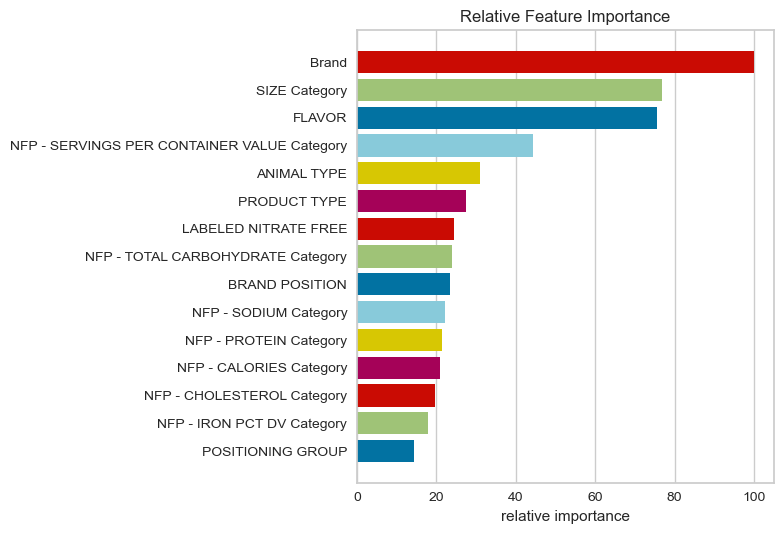

<Axes: title={'center': 'Relative Feature Importance'}, xlabel='relative importance'>

In [1014]:
from yellowbrick.model_selection import FeatureImportances
visualizer = FeatureImportances(random_model, title="Relative Feature Importance")
visualizer.fit(X_train_old, y_train_old)

visualizer.show()


In [919]:
results_final_df

Model  Train Accuracy  Test Accuracy
0  Random Forest        0.532117       0.501738

In [920]:
dfi.export(results_final_df,'result.png')

In [1136]:
comparison_df = pd.DataFrame({
    'Actual': y_test_new,
    'Predicted': test_predictions_final
})

# Add a column indicating whether the prediction is correct
comparison_df['Correct Prediction'] = comparison_df['Actual'] == comparison_df['Predicted']


In [1137]:
test_predictions.shape

(9232,)

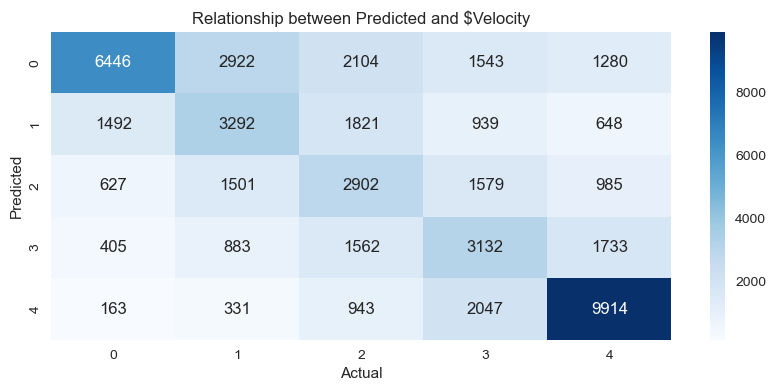

In [1138]:
Heatmap_crosstab(comparison_df,'Predicted',comparison_df['Actual'],size=(10,4))

In [1023]:
top_count = X_test_new.describe().loc['top',:]
top_count

POSITIONING GROUP                              CONVENTIONAL POSITIONING GROUP
LABELED NITRATE FREE                                                        N
NFP - IRON PCT DV Category                                         (0.0, 4.0]
NFP - CALORIES Category                                           (0.0, 70.0]
NFP - PROTEIN Category                                             (0.0, 6.0]
NFP - CHOLESTEROL Category                                        (0.0, 20.0]
NFP - TOTAL CARBOHYDRATE Category                                  (0.0, 1.0]
NFP - SODIUM Category                                            (0.0, 320.0]
PRODUCT TYPE                                            SS MEAT SNACK - JERKY
BRAND POSITION                                                   CONVENTIONAL
ANIMAL TYPE                                                       MEAT - BEEF
NFP - SERVINGS PER CONTAINER VALUE Category                        (0.0, 1.0]
FLAVOR                                                       PLA

In [1297]:
mean(y_test_new[X_test_new['ANIMAL TYPE']=='SEAFOOD - SALMON'])

2.480225988700565

In [1295]:
X_test_new['ANIMAL TYPE'].value_counts()

ANIMAL TYPE
MEAT - BEEF                      28725
MEAT - COMBINATION                8215
UNKNOWN                           4057
MEAT - PORK                       3356
MEAT - TURKEY                     2787
PLANT BASED - BEEF                1141
MEAT - CHICKEN                    1002
PLANT BASED - NON SPECIFIC         959
MEAT - VENISON/ELK                 499
SEAFOOD - SALMON                   177
MEAT - BUFFALO/BISON               111
PLANT BASED - OTHER MEAT TYPE       55
SEAFOOD - TUNA                      50
PLANT BASED - PORK                  30
MEAT - DUCK                         16
SEAFOOD - POLLOCK                    4
MEAT - BOAR                          4
MEAT - OTHER                         3
SEAFOOD - SQUID                      2
SUBCATEGORY NOT CODED                1
Name: count, dtype: int64

In [1251]:
import matplotlib as plt

In [1250]:
import seaborn as sns

In [1378]:
testing_all = pd.concat([X_test_new,y_test_new],axis=1)

In [1379]:
predictions_df = pd.DataFrame({'Predicted $Velocity': test_predictions_final}, index=X_test_new.index)

In [1380]:
testing_all_pred = pd.concat([X_test_new,predictions_df],axis=1)

In [1381]:
for_plot = pd.concat([X_test_new,y_test_new,predictions_df],axis=1)

C:\Users\LorraineLin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1623635556.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 4000x10000 with 0 Axes>

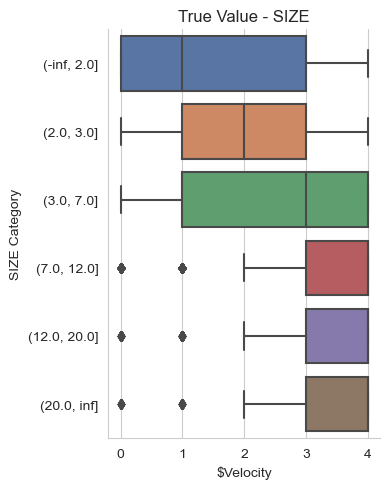

In [1389]:
plt.figure(figsize=(40, 100))
sns.set_style("whitegrid")
sns.catplot(
    data=testing_all,
    x="$Velocity", y="SIZE Category",
    kind="box", orient="h",height=5,aspect=0.8,palette='deep'
).set(title='True Value - SIZE')

plt.tight_layout()
plt.show()

C:\Users\LorraineLin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1820153624.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 4000x10000 with 0 Axes>

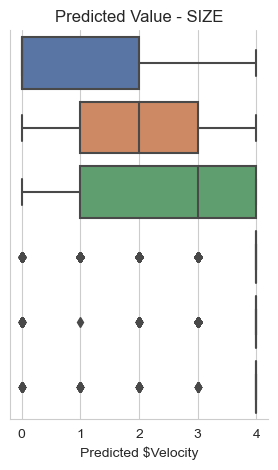

In [1390]:

plt.figure(figsize=(40, 100))
sns.catplot(
    data=testing_all_pred,
    x="Predicted $Velocity", y="SIZE Category",
    kind="box", orient="h",height=4.8,aspect=0.6,palette='deep'
).set(title='Predicted Value - SIZE').set(yticklabels=[]).set(ylabel=None)

plt.tight_layout()
plt.show()

C:\Users\LorraineLin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\2466080222.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 4000x10000 with 0 Axes>

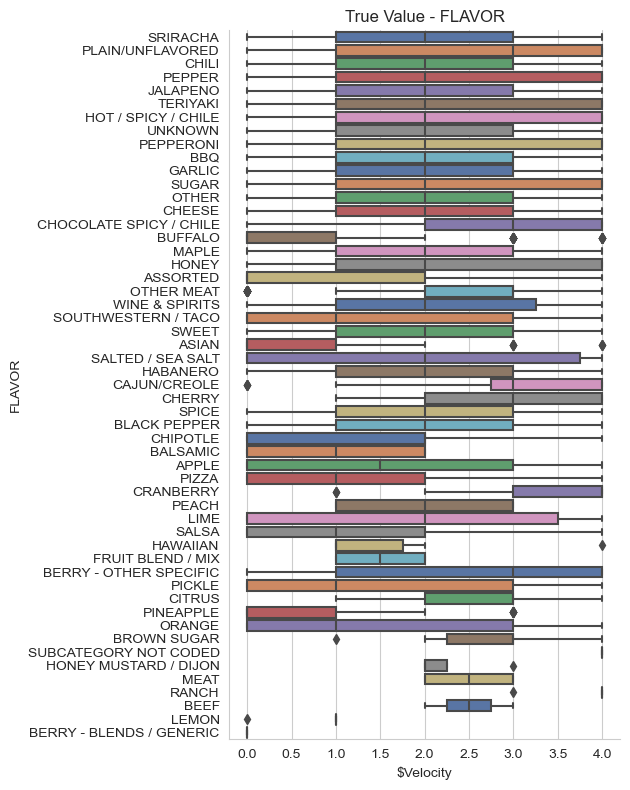

In [1391]:

plt.figure(figsize=(40, 100))
sns.catplot(
    data=testing_all,
    x="$Velocity", y="FLAVOR",
    kind="box", orient="h",height=8,aspect=0.8,palette='deep'
).set(title='True Value - FLAVOR')

plt.tight_layout()
plt.show()

C:\Users\LorraineLin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\LorraineLin\AppData\Local\Temp\ipykernel_15664\1598386227.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 4000x10000 with 0 Axes>

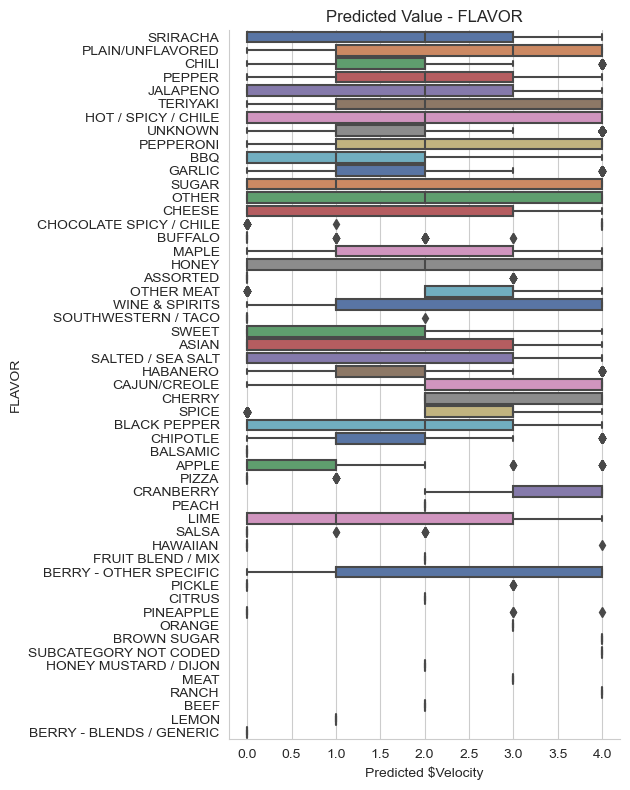

In [1392]:
plt.figure(figsize=(40, 100))
sns.catplot(
    data=testing_all_pred,
    x="Predicted $Velocity", y="FLAVOR",
    kind="box", orient="h",height=8,aspect=0.8,palette='deep'
).set(title='Predicted Value - FLAVOR')

plt.tight_layout()
plt.show()

C:\Users\LorraineLin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


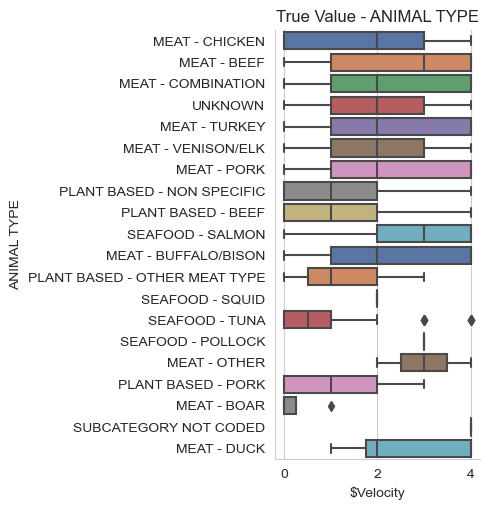

In [1393]:
sns.set_style("whitegrid")

sns.catplot(
    data=testing_all,
    x="$Velocity", y="ANIMAL TYPE",
    kind="box", orient="h",height=5,aspect=1,palette="deep"
).set(title='True Value - ANIMAL TYPE')

C:\Users\LorraineLin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


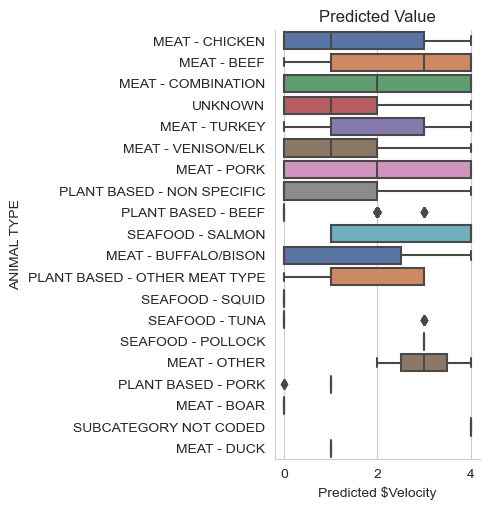

In [1395]:

sns.catplot(
    data=testing_all_pred,
    x="Predicted $Velocity", y="ANIMAL TYPE",
    kind="box", orient="h",height=5,aspect=1,palette="deep"
).set(title='Predicted Value')

In [938]:
dfi.export(prediction_all,'result_predict.png')

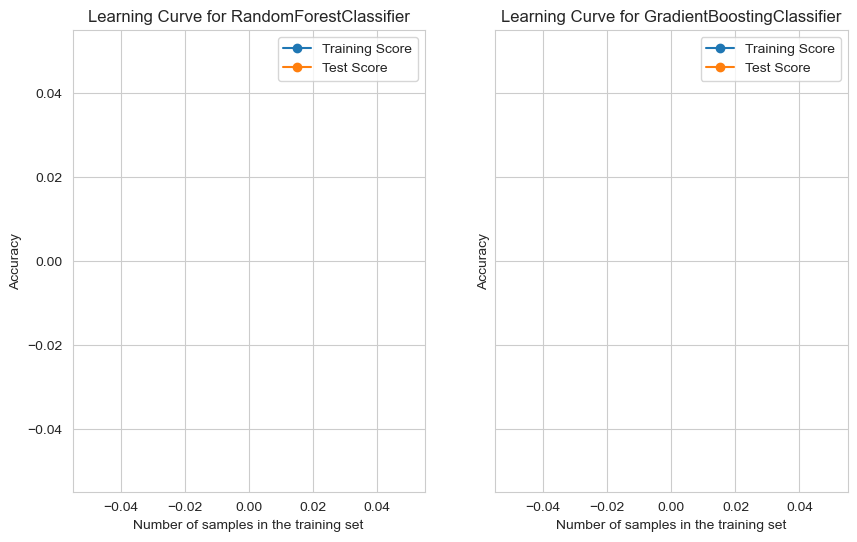

In [1408]:
X_learning = pd.concat([X_train_old,X_test_new],axis=0)
y_learning = pd.concat([y_train_old,y_test_new],axis=0)
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

random = RandomForestClassifier()
gradient = GradientBoostingClassifier()
common_params = {
    "X": X_learning,
    "y": y_learning,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([random, gradient]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [1447]:
chomps = og_data[og_data['Brand']=='CHOMPS']
chomps_food = chomps[(chomps["Channel/Outlet"]=="CONVENTIONAL|FOOD")&
                  (chomps["Geography Level"]=="RMA")]

In [1448]:
chomps_food.groupby('SIZE')['Dollars'].sum()

SIZE
0.50         6775.00
1.15     12003699.81
3.00     27929216.92
9.20     21480544.92
27.60        2632.54
Name: Dollars, dtype: float64

In [1449]:
chomps.groupby('SIZE')['Dollars'].sum()

SIZE
0.50       119801.54
1.15     48566958.92
3.00     32338526.80
9.20     58451941.26
12.00        2120.78
16.00        1821.42
27.60       87862.99
Name: Dollars, dtype: float64

In [1454]:
np.unique(og_data["Geography"])

array(['AC - ALBERTSONSCO ACME - RMA',
       'AC - ALBERTSONSCO ACME DISTRICT 1, 3, & 5 - RMA',
       'AC - ALBERTSONSCO ACME DISTRICT 2, 6, & 8 - RMA',
       'AC - ALBERTSONSCO ACME DISTRICT 4 - RMA',
       'AC - ALBERTSONSCO ACME DISTRICT 7 - RMA',
       'AC - ALBERTSONSCO ALASKA - RMA', 'AC - ALBERTSONSCO AUSTIN - RMA',
       'AC - ALBERTSONSCO BAY AREA - RMA', 'AC - ALBERTSONSCO CORP - RMA',
       'AC - ALBERTSONSCO CORP W/ AK/HI - RMA',
       'AC - ALBERTSONSCO CORP W/ SLC - RMA',
       'AC - ALBERTSONSCO CORP W/ SLC AND AK/HI - RMA',
       'AC - ALBERTSONSCO D.C. - RMA', 'AC - ALBERTSONSCO DALLAS - RMA',
       'AC - ALBERTSONSCO DENVER, CO - RMA',
       'AC - ALBERTSONSCO DENVER, CO AO - RMA',
       'AC - ALBERTSONSCO DENVER, CO DIV - RMA',
       'AC - ALBERTSONSCO EAST WASHINGTON - RMA',
       'AC - ALBERTSONSCO EASTERN - RMA',
       'AC - ALBERTSONSCO EASTERN AO - RMA',
       'AC - ALBERTSONSCO EL PASO, TX - RMA',
       'AC - ALBERTSONSCO HAGGENS DIV - RMA',
 

In [1456]:
chomps_food_us = chomps[(chomps["Geography"]=="TOTAL US - FOOD")]

In [1457]:
chomps_food_us.groupby('SIZE')['Dollars'].sum()

SIZE
0.50        9926.98
1.15     2738727.32
3.00     2024107.05
9.20     1715877.16
27.60        517.99
Name: Dollars, dtype: float64